In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
from prophet import Prophet

# **Model 1**

In [37]:
import pandas as pd
sales_data = pd.read_csv('/content/drive/MyDrive/Sales forecasting/sales_forcasting_20_30.csv')
# Convert 'TRANSACTION_DATE' to datetime format
sales_data['TRANSACTION_DATE'] = pd.to_datetime(sales_data['TRANSACTION_DATE'])
# Remove rows with negative sales values
sales_data = sales_data[sales_data['AMOUNT'] >= 0]
# Aggregate data by day to ensure one entry per day
daily_sales = sales_data.groupby('TRANSACTION_DATE')['AMOUNT'].sum().reset_index()


daily_sales['TRANSACTION_DATE'] = pd.to_datetime(daily_sales['TRANSACTION_DATE'])
daily_sales['Month'] = daily_sales['TRANSACTION_DATE'].dt.to_period('M')
monthly_data = daily_sales.groupby('Month')['AMOUNT'].sum()
monthly_data = monthly_data.reset_index()
monthly_data['Month'] = pd.to_datetime(monthly_data['Month'].astype(str) + '-01')
print(monthly_data)

negative_count = (daily_sales['AMOUNT'] <0).mean() * 100
print(f"Percentage of negative values : {negative_count: .2f}%")

# Generate a continuous date range
date_range = pd.date_range(start=monthly_data['Month'].min(),
                           end=monthly_data['Month'].max(),
                           freq='MS')

missing_dates = pd.date_range(start=monthly_data['Month'].min(),
                              end=monthly_data['Month'].max(), freq='MS').difference(monthly_data['Month'])
print(f"Missing dates before reindexing: {missing_dates}")

# if there is missing value then do interpolation

        Month      AMOUNT
0  2020-01-01   459250.00
1  2020-02-01   449956.00
2  2020-03-01   606968.00
3  2020-04-01  1765946.00
4  2020-05-01  1980428.00
5  2020-06-01  1790336.40
6  2020-07-01  1469764.80
7  2020-08-01  2119409.40
8  2020-09-01  1835163.60
9  2020-10-01  2317348.01
10 2020-11-01  3101114.50
11 2020-12-01  2620364.45
12 2021-01-01  2917960.00
13 2021-02-01  2507670.25
14 2021-03-01  3172181.15
15 2021-04-01  3892369.85
16 2021-05-01  2949675.44
17 2021-06-01  2994190.00
18 2021-07-01  2935938.00
19 2021-08-01  3375666.00
20 2021-09-01  3894346.00
21 2021-10-01  3670942.00
22 2021-11-01  4570961.00
23 2021-12-01  7181412.00
24 2022-01-01  3548826.00
25 2022-02-01  2929017.00
26 2022-03-01  2713061.00
27 2022-04-01  3335970.00
28 2022-05-01  2502842.00
29 2022-06-01  2436982.41
30 2022-07-01  2289036.46
31 2022-08-01  2650238.32
32 2022-09-01  3016362.92
33 2022-10-01  2875187.05
34 2022-11-01  6824868.16
35 2022-12-01  3078805.35
36 2023-01-01  2361582.86
37 2023-02-0

In [38]:
daily_sales

TRANSACTION_DATE     AMOUNT    Month
0          2020-01-02   26294.00  2020-01
1          2020-01-03   19713.00  2020-01
2          2020-01-05   19776.00  2020-01
3          2020-01-06   24111.00  2020-01
4          2020-01-07   16192.00  2020-01
...               ...        ...      ...
1600       2024-12-08  118799.60  2024-12
1601       2024-12-09  347040.80  2024-12
1602       2024-12-10  178465.28  2024-12
1603       2024-12-11  149784.91  2024-12
1604       2024-12-12  150290.71  2024-12

[1605 rows x 3 columns]

In [13]:
monthly_data

Month      AMOUNT
0  2020-01-01   459250.00
1  2020-02-01   449956.00
2  2020-03-01   606968.00
3  2020-04-01  1765946.00
4  2020-05-01  1980428.00
5  2020-06-01  1790336.40
6  2020-07-01  1469764.80
7  2020-08-01  2119409.40
8  2020-09-01  1835163.60
9  2020-10-01  2317348.01
10 2020-11-01  3101114.50
11 2020-12-01  2620364.45
12 2021-01-01  2917960.00
13 2021-02-01  2507670.25
14 2021-03-01  3172181.15
15 2021-04-01  3892369.85
16 2021-05-01  2949675.44
17 2021-06-01  2994190.00
18 2021-07-01  2935938.00
19 2021-08-01  3375666.00
20 2021-09-01  3894346.00
21 2021-10-01  3670942.00
22 2021-11-01  4570961.00
23 2021-12-01  7181412.00
24 2022-01-01  3548826.00
25 2022-02-01  2929017.00
26 2022-03-01  2713061.00
27 2022-04-01  3335970.00
28 2022-05-01  2502842.00
29 2022-06-01  2436982.41
30 2022-07-01  2289036.46
31 2022-08-01  2650238.32
32 2022-09-01  3016362.92
33 2022-10-01  2875187.05
34 2022-11-01  6824868.16
35 2022-12-01  3078805.35
36 2023-01-01  2361582.86
37 2023-02-01  2501363.71
38 2023-03-01  2652579.72
39 2023-04-01  2702270.06
40 2023-05-01  3916674.30
41 2023-06-01  3899447.43
42 2023-07-01  2910458.93
43 2023-08-01  2914996.02
44 2023-09-01  2709695.09
45 2023-10-01  2910246.23
46 2023-11-01  7063842.39
47 2023-12-01  4199593.43
48 2024-01-01  3152239.50
49 2024-02-01  2090690.19
50 2024-03-01  2880320.40
51 2024-04-01  2806823.94
52 2024-05-01  2832391.85
53 2024-06-01  2487718.09
54 2024-07-01  2970854.64
55 2024-08-01  2225606.23
56 2024-09-01  2435212.16
57 2024-10-01  2802942.38
58 2024-11-01  7897510.85
59 2024-12-01  6139564.74

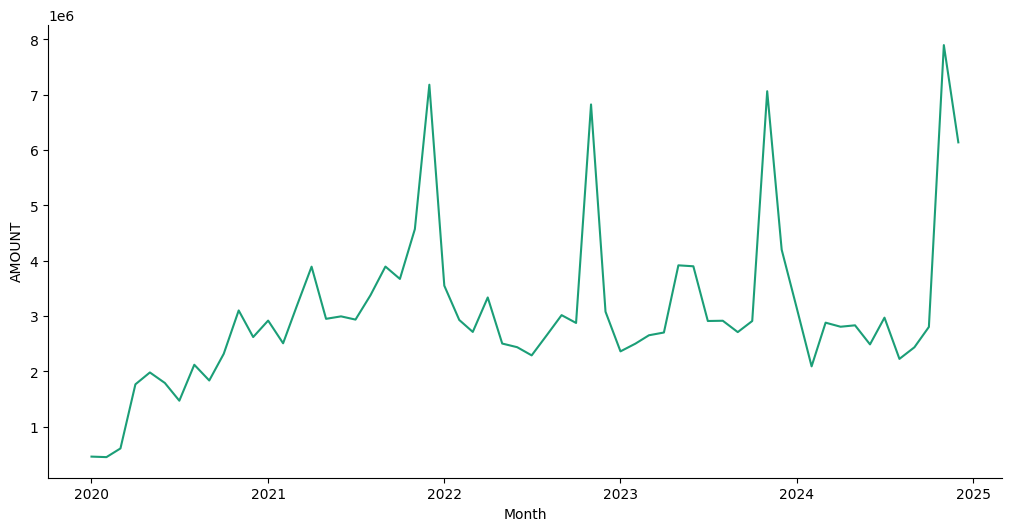

In [14]:
# @title Month vs AMOUNT

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Month']
  ys = series['AMOUNT']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_data.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('AMOUNT')

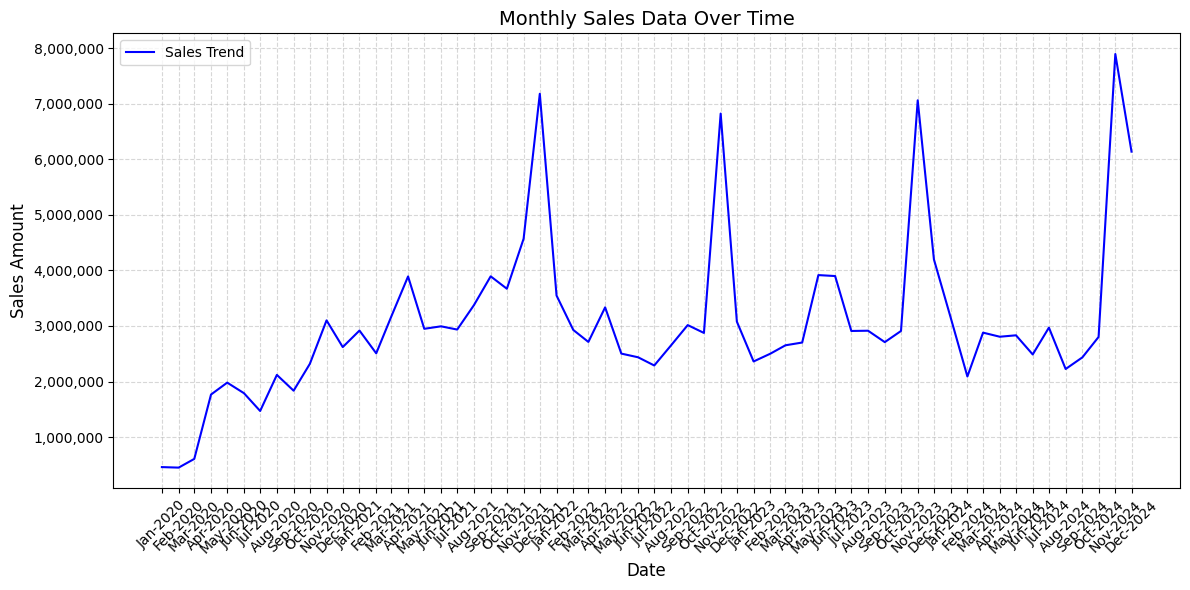

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

# Assuming `monthly_data` is your DataFrame with 'Month' and 'AMOUNT'
monthly_data['Year'] = monthly_data['Month'].dt.year
monthly_data['Month_Num'] = monthly_data['Month'].dt.month

# 1. Entire Data Plot with months in between years on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'], monthly_data['AMOUNT'], label='Sales Trend', color='blue')

# Set x-axis labels with both month and year
plt.title("Monthly Sales Data Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)

# Customize the x-ticks to display both month and year
plt.xticks(monthly_data['Month'], monthly_data['Month'].dt.strftime('%b-%Y'), rotation=45)

# Set the y-axis to display numbers with commas as thousands separators
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


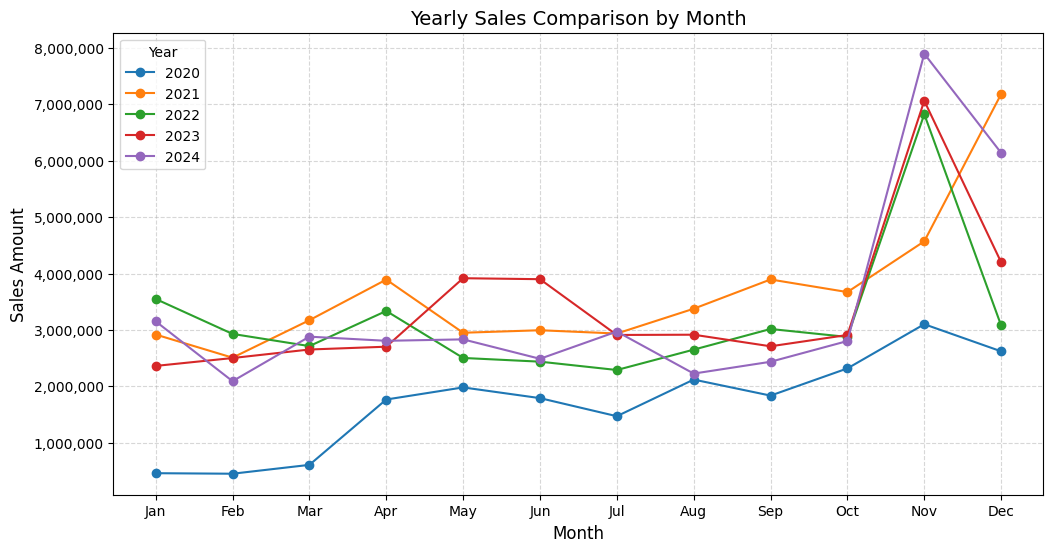

In [16]:
# 2. Yearly Data with Superimposed Lines
# Pivot to get each year as a separate column
pivot_data = monthly_data.pivot(index='Month_Num', columns='Year', values='AMOUNT')

plt.figure(figsize=(12, 6))
for year in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[year], label=f'{year}', marker='o')

plt.title("Yearly Sales Comparison by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Set the y-axis to display numbers with commas as thousands separators
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Year", fontsize=10)
plt.show()

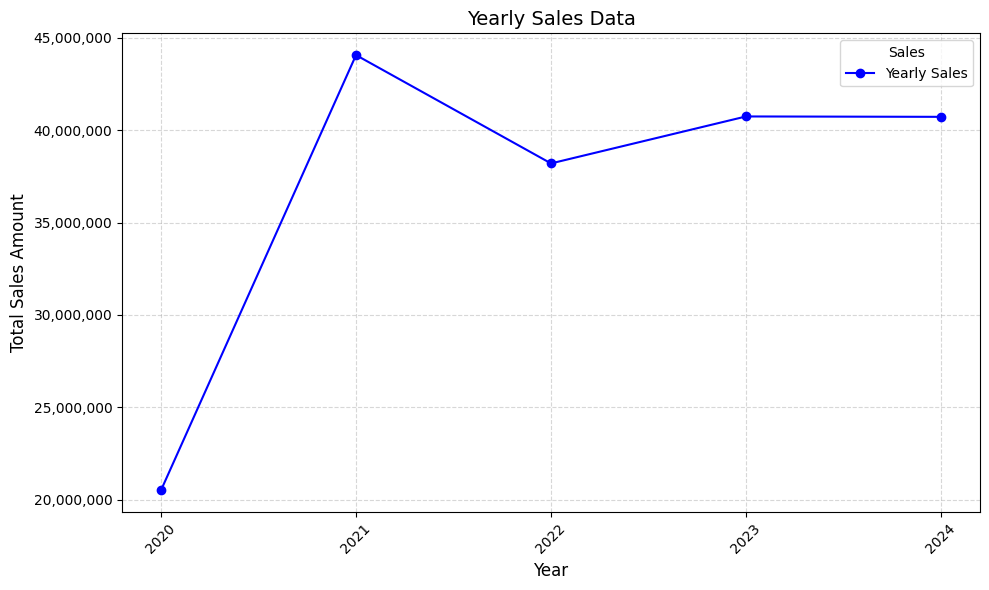

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter

# Assuming `monthly_data` is your DataFrame with 'Month' and 'AMOUNT'
monthly_data['Year'] = monthly_data['Month'].dt.year

# Aggregate the data by year (sum the sales for each year)
yearly_data = monthly_data.groupby('Year')['AMOUNT'].sum().reset_index()

# Plot the yearly sales data
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Year'], yearly_data['AMOUNT'], marker='o', color='b', label='Yearly Sales')

# Customize the plot
plt.title("Yearly Sales Data", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)
plt.xticks(yearly_data['Year'], rotation=45)

# Set the y-axis to display numbers with commas as thousands separators
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Sales", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [18]:
monthly = monthly_data.copy()
monthly.rename(columns={'Month': 'ds', 'AMOUNT': 'y'}, inplace=True)
# Extract the month and add it as a new column
# monthly['month'] = monthly['ds'].dt.month
#monthly['month'] = monthly['ds'].apply(nov_dec)
test_size = 6

actual_y = monthly['y'][-test_size:].values
print(monthly[-test_size:])

           ds           y  Year  Month_Num
54 2024-07-01  2970854.64  2024          7
55 2024-08-01  2225606.23  2024          8
56 2024-09-01  2435212.16  2024          9
57 2024-10-01  2802942.38  2024         10
58 2024-11-01  7897510.85  2024         11
59 2024-12-01  6139564.74  2024         12


In [19]:
monthly

ds           y  Year  Month_Num
0  2020-01-01   459250.00  2020          1
1  2020-02-01   449956.00  2020          2
2  2020-03-01   606968.00  2020          3
3  2020-04-01  1765946.00  2020          4
4  2020-05-01  1980428.00  2020          5
5  2020-06-01  1790336.40  2020          6
6  2020-07-01  1469764.80  2020          7
7  2020-08-01  2119409.40  2020          8
8  2020-09-01  1835163.60  2020          9
9  2020-10-01  2317348.01  2020         10
10 2020-11-01  3101114.50  2020         11
11 2020-12-01  2620364.45  2020         12
12 2021-01-01  2917960.00  2021          1
13 2021-02-01  2507670.25  2021          2
14 2021-03-01  3172181.15  2021          3
15 2021-04-01  3892369.85  2021          4
16 2021-05-01  2949675.44  2021          5
17 2021-06-01  2994190.00  2021          6
18 2021-07-01  2935938.00  2021          7
19 2021-08-01  3375666.00  2021          8
20 2021-09-01  3894346.00  2021          9
21 2021-10-01  3670942.00  2021         10
22 2021-11-01  4570961.00  2021         11
23 2021-12-01  7181412.00  2021         12
24 2022-01-01  3548826.00  2022          1
25 2022-02-01  2929017.00  2022          2
26 2022-03-01  2713061.00  2022          3
27 2022-04-01  3335970.00  2022          4
28 2022-05-01  2502842.00  2022          5
29 2022-06-01  2436982.41  2022          6
30 2022-07-01  2289036.46  2022          7
31 2022-08-01  2650238.32  2022          8
32 2022-09-01  3016362.92  2022          9
33 2022-10-01  2875187.05  2022         10
34 2022-11-01  6824868.16  2022         11
35 2022-12-01  3078805.35  2022         12
36 2023-01-01  2361582.86  2023          1
37 2023-02-01  2501363.71  2023          2
38 2023-03-01  2652579.72  2023          3
39 2023-04-01  2702270.06  2023          4
40 2023-05-01  3916674.30  2023          5
41 2023-06-01  3899447.43  2023          6
42 2023-07-01  2910458.93  2023          7
43 2023-08-01  2914996.02  2023          8
44 2023-09-01  2709695.09  2023          9
45 2023-10-01  2910246.23  2023         10
46 2023-11-01  7063842.39  2023         11
47 2023-12-01  4199593.43  2023         12
48 2024-01-01  3152239.50  2024          1
49 2024-02-01  2090690.19  2024          2
50 2024-03-01  2880320.40  2024          3
51 2024-04-01  2806823.94  2024          4
52 2024-05-01  2832391.85  2024          5
53 2024-06-01  2487718.09  2024          6
54 2024-07-01  2970854.64  2024          7
55 2024-08-01  2225606.23  2024          8
56 2024-09-01  2435212.16  2024          9
57 2024-10-01  2802942.38  2024         10
58 2024-11-01  7897510.85  2024         11
59 2024-12-01  6139564.74  2024         12

- Creating nov growth factor for regressor

In [20]:
monthly['nov_growth_factor']=0
monthly['nov_growth_factor'][34]=1
monthly['nov_growth_factor'][46]=2
monthly['nov_growth_factor'][58]=3
monthly

<ipython-input-20-47e9465304ba>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  monthly['nov_growth_factor'][34]=1
<ipython-input-20-47e9465304ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

ds           y  Year  Month_Num  nov_growth_factor
0  2020-01-01   459250.00  2020          1                  0
1  2020-02-01   449956.00  2020          2                  0
2  2020-03-01   606968.00  2020          3                  0
3  2020-04-01  1765946.00  2020          4                  0
4  2020-05-01  1980428.00  2020          5                  0
5  2020-06-01  1790336.40  2020          6                  0
6  2020-07-01  1469764.80  2020          7                  0
7  2020-08-01  2119409.40  2020          8                  0
8  2020-09-01  1835163.60  2020          9                  0
9  2020-10-01  2317348.01  2020         10                  0
10 2020-11-01  3101114.50  2020         11                  0
11 2020-12-01  2620364.45  2020         12                  0
12 2021-01-01  2917960.00  2021          1                  0
13 2021-02-01  2507670.25  2021          2                  0
14 2021-03-01  3172181.15  2021          3                  0
15 2021-04-01  3892369.85  2021          4                  0
16 2021-05-01  2949675.44  2021          5                  0
17 2021-06-01  2994190.00  2021          6                  0
18 2021-07-01  2935938.00  2021          7                  0
19 2021-08-01  3375666.00  2021          8                  0
20 2021-09-01  3894346.00  2021          9                  0
21 2021-10-01  3670942.00  2021         10                  0
22 2021-11-01  4570961.00  2021         11                  0
23 2021-12-01  7181412.00  2021         12                  0
24 2022-01-01  3548826.00  2022          1                  0
25 2022-02-01  2929017.00  2022          2                  0
26 2022-03-01  2713061.00  2022          3                  0
27 2022-04-01  3335970.00  2022          4                  0
28 2022-05-01  2502842.00  2022          5                  0
29 2022-06-01  2436982.41  2022          6                  0
30 2022-07-01  2289036.46  2022          7                  0
31 2022-08-01  2650238.32  2022          8                  0
32 2022-09-01  3016362.92  2022          9                  0
33 2022-10-01  2875187.05  2022         10                  0
34 2022-11-01  6824868.16  2022         11                  1
35 2022-12-01  3078805.35  2022         12                  0
36 2023-01-01  2361582.86  2023          1                  0
37 2023-02-01  2501363.71  2023          2                  0
38 2023-03-01  2652579.72  2023          3                  0
39 2023-04-01  2702270.06  2023          4                  0
40 2023-05-01  3916674.30  2023          5                  0
41 2023-06-01  3899447.43  2023          6                  0
42 2023-07-01  2910458.93  2023          7                  0
43 2023-08-01  2914996.02  2023          8                  0
44 2023-09-01  2709695.09  2023          9                  0
45 2023-10-01  2910246.23  2023         10                  0
46 2023-11-01  7063842.39  2023         11                  2
47 2023-12-01  4199593.43  2023         12                  0
48 2024-01-01  3152239.50  2024          1                  0
49 2024-02-01  2090690.19  2024          2                  0
50 2024-03-01  2880320.40  2024          3                  0
51 2024-04-01  2806823.94  2024          4                  0
52 2024-05-01  2832391.85  2024          5                  0
53 2024-06-01  2487718.09  2024          6                  0
54 2024-07-01  2970854.64  2024          7                  0
55 2024-08-01  2225606.23  2024          8                  0
56 2024-09-01  2435212.16  2024          9                  0
57 2024-10-01  2802942.38  2024         10                  0
58 2024-11-01  7897510.85  2024         11                  3
59 2024-12-01  6139564.74  2024         12                  0

In [21]:
# Create the holidays dataframe
holidays = pd.DataFrame({
    'holiday': 'nov',
    'ds': pd.to_datetime(['2022-11-01', '2023-11-01', '2024-11-01', '2025-11-01', '2026-11-01']),
    'lower_window': 0,
    'upper_window': 2,

})

In [22]:
processed_data = monthly.copy()
processed_data.dropna(inplace=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet

# Split the data into train and test sets
train_data, test_data = train_test_split(processed_data, test_size=test_size, shuffle=False)

# Define the Prophet model
model = Prophet(
    changepoint_prior_scale=0.2,
    seasonality_prior_scale=20,
    holidays=holidays,  # Holidays without growth factor here
    changepoint_range=0.95,
    changepoints=['2020-11-01', '2021-11-01', '2022-11-01', '2023-11-01'],
)

# Add the growth factor as a custom regressor
model.add_regressor('nov_growth_factor')

# Add monthly and yearly seasonality
model.add_seasonality(name='monthly', period=30.5, fourier_order=40)
model.add_seasonality(name='yearly', period=365.25, fourier_order=8)

# Fit the model
model.fit(train_data)

# Create a dataframe for future dates
duration_months = 6
future_dates = model.make_future_dataframe(periods=duration_months, freq='MS')

# Add the growth factor to future dates
future_dates = future_dates.merge(
    processed_data[['ds', 'nov_growth_factor']],
    on='ds',
    how='left'
)
future_dates['nov_growth_factor'] = future_dates['nov_growth_factor'].fillna(0)  # Fill non-holiday dates with 0

# Generate the forecast
forecast = model.predict(future_dates)

# Evaluate the forecast
predicted_test = forecast.tail(duration_months)
predicted_values = predicted_test['yhat'].values

print(actual_y[:duration_months])
print(predicted_values)

# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(actual_y[:duration_months], predicted_values)
print("MAPE:", mape)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpijwa4rbp/eaj043ig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpijwa4rbp/j43lp3f1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99025', 'data', 'file=/tmp/tmpijwa4rbp/eaj043ig.json', 'init=/tmp/tmpijwa4rbp/j43lp3f1.json', 'output', 'file=/tmp/tmpijwa4rbp/prophet_model_uzpwlqm/prophet_model-20250125073435.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:34:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:35 - cmdstanpy - INFO - Chain [1] d

[2970854.64 2225606.23 2435212.16 2802942.38 7897510.85 6139564.74]
[2918833.77268446 2496137.11170902 2474244.50766034 2615384.22879508
 8108092.4359341  3621043.55110801]
MAPE: 0.10981387212466409


In [24]:
# Combine actual and predicted values for comparison
comparison_test = test_data.copy()
comparison_test['Predicted'] = predicted_test['yhat'].values

In [25]:
# Calculate evaluation metrics for the test set
actual_test = test_data['y']
predicted_test_values = predicted_test['yhat']

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error
# Compute MAPE and RMSE for the test set
adjusted_actual_test = np.where(actual_test == 0, np.nan, actual_test)
mape_test = np.nanmean(np.abs((adjusted_actual_test - predicted_test_values) / adjusted_actual_test)) * 100
# rmse_test = np.sqrt(mean_squared_error(actual_test, predicted_test_values))

# FULL TEST MAPE

In [27]:
print(f"Test MAPE: {mape_test}%")
# print(f"Test RMSE: {rmse_test}")

Test MAPE: 10.981387212466409%


In [28]:
mean_absolute_percentage_error(actual_test, predicted_test_values)*100

10.981387212466409

# TEST MAPE excluding nov dec

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(actual_test[:4], predicted_test_values[:4])*100

5.550181267335185

# TEST MAPE for nov,dec

In [30]:
mean_absolute_percentage_error(actual_test[4:], predicted_test_values[4:])*100

21.84379910272886

# TEST MAPE excluding december

In [31]:
mean_absolute_percentage_error(actual_test[:-1],predicted_test_values[:-1])*100

4.973430981899709

# TEST MAPE for december

In [32]:
mean_absolute_percentage_error(actual_test[-1:],predicted_test_values[-1:])*100

41.02116836529992

- Only december data is an issue

           ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-01-01  2.982713e+04  1.764543e+05  1.387179e+06  2.982713e+04   
1  2020-02-01  1.457996e+05  1.530047e+05  1.334572e+06  1.457996e+05   
2  2020-03-01  2.542900e+05  4.624140e+05  1.636222e+06  2.542900e+05   
3  2020-04-01  3.702625e+05  1.251926e+06  2.403217e+06  3.702625e+05   
4  2020-05-01  4.824940e+05  1.144692e+06  2.281283e+06  4.824940e+05   
5  2020-06-01  5.984665e+05  1.014704e+06  2.216390e+06  5.984665e+05   
6  2020-07-01  7.106979e+05  1.052395e+06  2.281203e+06  7.106979e+05   
7  2020-08-01  8.266704e+05  1.171907e+06  2.406698e+06  8.266704e+05   
8  2020-09-01  9.426429e+05  1.336025e+06  2.522354e+06  9.426429e+05   
9  2020-10-01  1.054874e+06  1.585769e+06  2.734923e+06  1.054874e+06   
10 2020-11-01  1.170847e+06  2.552746e+06  3.714689e+06  1.170847e+06   
11 2020-12-01  1.282970e+06  2.847448e+06  4.019878e+06  1.282970e+06   
12 2021-01-01  1.398831e+06  1.856994e+06  3.057884

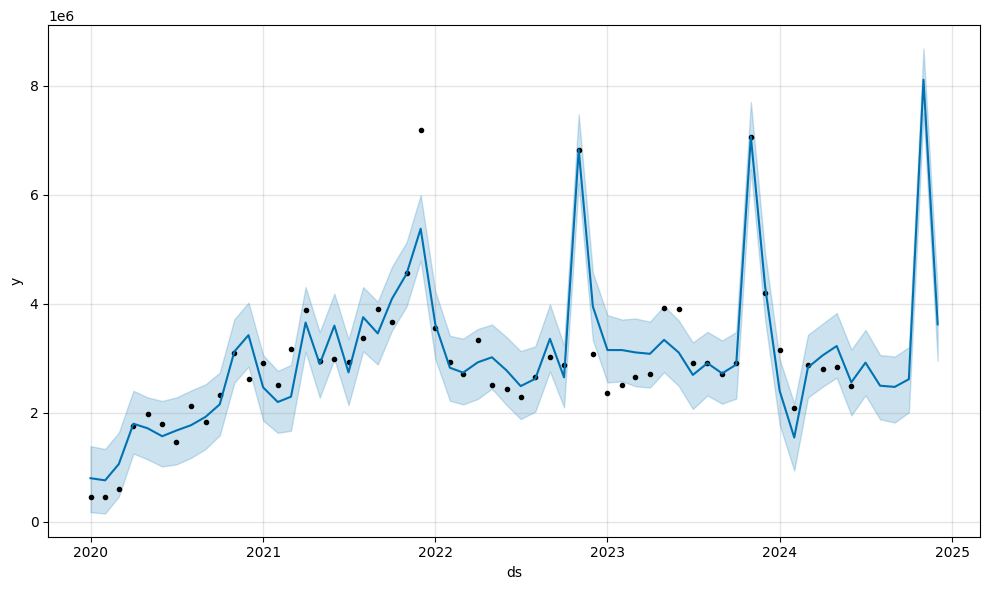

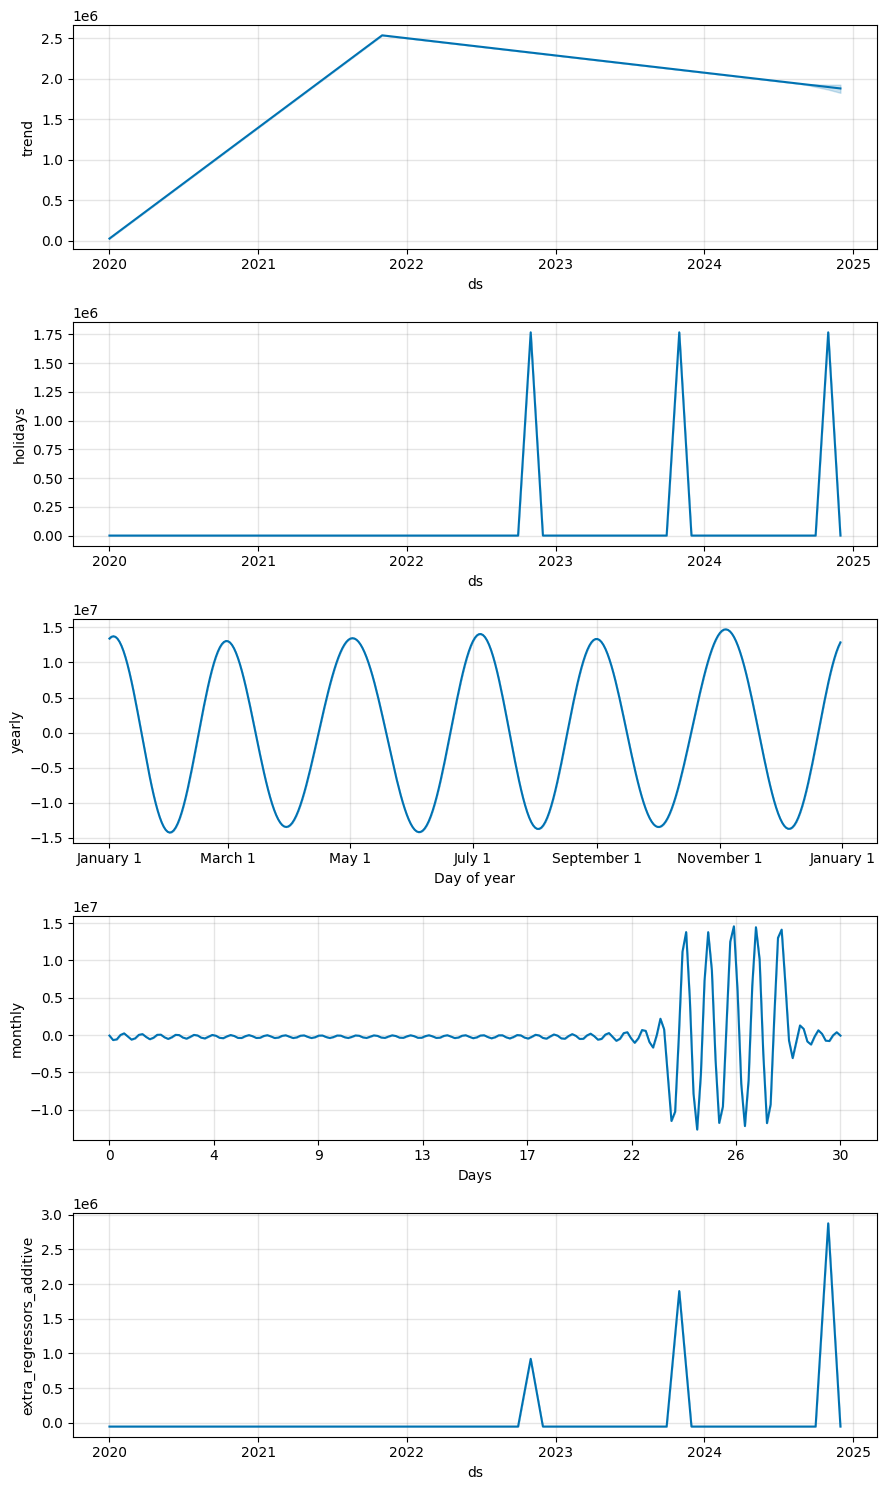

In [33]:
model.plot(forecast)
model.plot_components(forecast)
print(forecast)

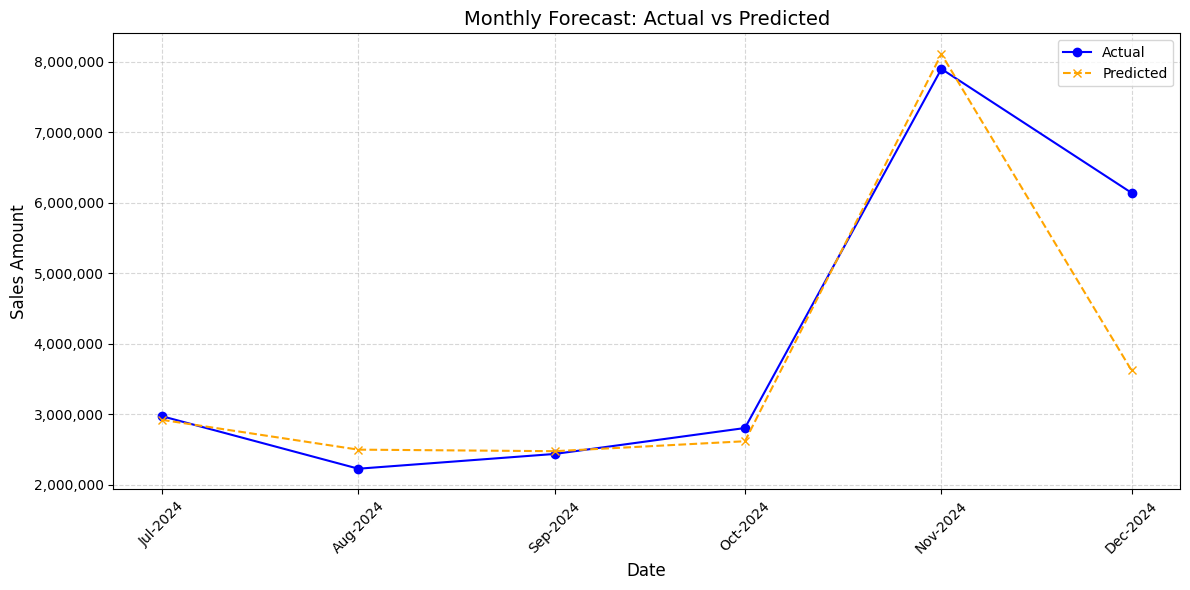

In [34]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Plotting actual vs predicted forecast
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(comparison_test['ds'], comparison_test['y'], label='Actual', color='blue', marker='o')

# Plot predicted values
plt.plot(comparison_test['ds'], comparison_test['Predicted'], label='Predicted', color='orange', linestyle='--', marker='x')

# Formatting x-axis with monthly date ticks
plt.title("Monthly Forecast: Actual vs Predicted", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)
plt.xticks(comparison_test['ds'], comparison_test['ds'].dt.strftime('%b-%Y'), rotation=45)

# Formatting y-axis to include commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adding grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# **Model2**
- Trying different hyperparameters

In [ ]:
# Create the holidays dataframe
holidays = pd.DataFrame({
    'holiday': 'nov',
    'ds': pd.to_datetime(['2022-11-01', '2023-11-01', '2024-11-01', '2025-11-01', '2026-11-01']),
    'lower_window': 0,
    'upper_window': 2,

})

In [ ]:
processed_data = monthly.copy()
processed_data.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet

# Split the data into train and test sets
train_data, test_data = train_test_split(processed_data, test_size=test_size, shuffle=False)

# Define the Prophet model
model2 = Prophet(
    changepoint_prior_scale=0.254,
    seasonality_prior_scale=20,
    holidays=holidays,  # Holidays without growth factor here
    changepoint_range=1,
)

# Add the growth factor as a custom regressor
model2.add_regressor('nov_growth_factor')

# Add monthly and yearly seasonality
model2.add_seasonality(name='monthly', period=30.5, fourier_order=40)
model2.add_seasonality(name='yearly', period=365.25, fourier_order=8)

# Fit the model
model2.fit(train_data)

# Create a dataframe for future dates
duration_months = 6
future_dates = model2.make_future_dataframe(periods=duration_months, freq='MS')

# Add the growth factor to future dates
future_dates = future_dates.merge(
    processed_data[['ds', 'nov_growth_factor']],
    on='ds',
    how='left'
)
future_dates['nov_growth_factor'] = future_dates['nov_growth_factor'].fillna(0)  # Fill non-holiday dates with 0

# Generate the forecast
forecast = model2.predict(future_dates)

# Evaluate the forecast
predicted_test = forecast.tail(duration_months)
predicted_values = predicted_test['yhat'].values

print(actual_y[:duration_months])
print(predicted_values)

# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(actual_y[:duration_months], predicted_values)
print("MAPE:", mape)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mfrnh4r/_d85bcle.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mfrnh4r/loxcn7tx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60516', 'data', 'file=/tmp/tmp0mfrnh4r/_d85bcle.json', 'init=/tmp/tmp0mfrnh4r/loxcn7tx.json', 'output', 'file=/tmp/tmp0mfrnh4r/prophet_model0we5izii/prophet_model-20250111075120.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:51:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:23 - cmdstanpy - INFO - Chain [1] d

[2970854.64 2225606.23 2435212.16 2802942.38 7897510.85 6139564.74]
[2990310.82019552 2527877.32836053 2492383.92152882 2684617.67281221
 7895364.85184685 3705402.81519664]
MAPE: 0.1007998198837692


In [ ]:
processed_data

ds           y  nov_growth_factor
0  2020-01-01   459250.00                  0
1  2020-02-01   449956.00                  0
2  2020-03-01   606968.00                  0
3  2020-04-01  1765946.00                  0
4  2020-05-01  1980428.00                  0
5  2020-06-01  1790336.40                  0
6  2020-07-01  1469764.80                  0
7  2020-08-01  2119409.40                  0
8  2020-09-01  1835163.60                  0
9  2020-10-01  2317348.01                  0
10 2020-11-01  3101114.50                  0
11 2020-12-01  2620364.45                  0
12 2021-01-01  2917960.00                  0
13 2021-02-01  2507670.25                  0
14 2021-03-01  3172181.15                  0
15 2021-04-01  3892369.85                  0
16 2021-05-01  2949675.44                  0
17 2021-06-01  2994190.00                  0
18 2021-07-01  2935938.00                  0
19 2021-08-01  3375666.00                  0
20 2021-09-01  3894346.00                  0
21 2021-10-01  3670942.00                  0
22 2021-11-01  4570961.00                  0
23 2021-12-01  7181412.00                  0
24 2022-01-01  3548826.00                  0
25 2022-02-01  2929017.00                  0
26 2022-03-01  2713061.00                  0
27 2022-04-01  3335970.00                  0
28 2022-05-01  2502842.00                  0
29 2022-06-01  2436982.41                  0
30 2022-07-01  2289036.46                  0
31 2022-08-01  2650238.32                  0
32 2022-09-01  3016362.92                  0
33 2022-10-01  2875187.05                  0
34 2022-11-01  6824868.16                  1
35 2022-12-01  3078805.35                  0
36 2023-01-01  2361582.86                  0
37 2023-02-01  2501363.71                  0
38 2023-03-01  2652579.72                  0
39 2023-04-01  2702270.06                  0
40 2023-05-01  3916674.30                  0
41 2023-06-01  3899447.43                  0
42 2023-07-01  2910458.93                  0
43 2023-08-01  2914996.02                  0
44 2023-09-01  2709695.09                  0
45 2023-10-01  2910246.23                  0
46 2023-11-01  7063842.39                  2
47 2023-12-01  4199593.43                  0
48 2024-01-01  3152239.50                  0
49 2024-02-01  2090690.19                  0
50 2024-03-01  2880320.40                  0
51 2024-04-01  2806823.94                  0
52 2024-05-01  2832391.85                  0
53 2024-06-01  2487718.09                  0
54 2024-07-01  2970854.64                  0
55 2024-08-01  2225606.23                  0
56 2024-09-01  2435212.16                  0
57 2024-10-01  2802942.38                  0
58 2024-11-01  7897510.85                  3
59 2024-12-01  6139564.74                  0

In [ ]:
# Combine actual and predicted values for comparison
comparison_test = test_data.copy()
comparison_test['Predicted'] = predicted_test['yhat'].values

In [ ]:
# Calculate evaluation metrics for the test set
actual_test = test_data['y']
predicted_test_values = predicted_test['yhat']

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
# Compute MAPE and RMSE for the test set
adjusted_actual_test = np.where(actual_test == 0, np.nan, actual_test)
mape_test = np.nanmean(np.abs((adjusted_actual_test - predicted_test_values) / adjusted_actual_test)) * 100
# rmse_test = np.sqrt(mean_squared_error(actual_test, predicted_test_values))

# FULL TEST MAPE

In [ ]:
print(f"Test MAPE: {mape_test}%")
# print(f"Test RMSE: {rmse_test}")

Test MAPE: 10.07998198837692%


In [ ]:
mean_absolute_percentage_error(actual_test, predicted_test_values)*100

10.07998198837692

# TEST MAPE excluding nov dec

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(actual_test[:4], predicted_test_values[:4])*100

5.201394313974264

# TEST MAPE for nov,dec

In [ ]:
mean_absolute_percentage_error(actual_test[4:], predicted_test_values[4:])*100

19.837157337182234

# TEST MAPE excluding december

In [ ]:
mean_absolute_percentage_error(actual_test[:-1],predicted_test_values[:-1])*100

4.166550070248399

# TEST MAPE for nov

In [ ]:
mean_absolute_percentage_error(actual_test[-2:-1],predicted_test_values[-2:-1])*100

0.02717309534493755

# TEST MAPE for december

In [ ]:
mean_absolute_percentage_error(actual_test[-1:],predicted_test_values[-1:])*100

39.64714157901953

- Only december data is an issue

           ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-01-01  3.516457e+04  2.619682e+05  1.347057e+06  3.516457e+04   
1  2020-02-01  1.564183e+05  1.429511e+05  1.247198e+06  1.564183e+05   
2  2020-03-01  2.698493e+05  3.852556e+05  1.491906e+06  2.698493e+05   
3  2020-04-01  3.911031e+05  1.139596e+06  2.215020e+06  3.911031e+05   
4  2020-05-01  5.084454e+05  1.106474e+06  2.141585e+06  5.084454e+05   
5  2020-06-01  6.296992e+05  9.492170e+05  2.015305e+06  6.296992e+05   
6  2020-07-01  7.470415e+05  1.096770e+06  2.208455e+06  7.470415e+05   
7  2020-08-01  8.682487e+05  1.205649e+06  2.283358e+06  8.682487e+05   
8  2020-09-01  9.894558e+05  1.322923e+06  2.481265e+06  9.894558e+05   
9  2020-10-01  1.106719e+06  1.646177e+06  2.731298e+06  1.106719e+06   
10 2020-11-01  1.227892e+06  2.546502e+06  3.637839e+06  1.227892e+06   
11 2020-12-01  1.345155e+06  2.895133e+06  4.006382e+06  1.345155e+06   
12 2021-01-01  1.466289e+06  1.946560e+06  3.068586

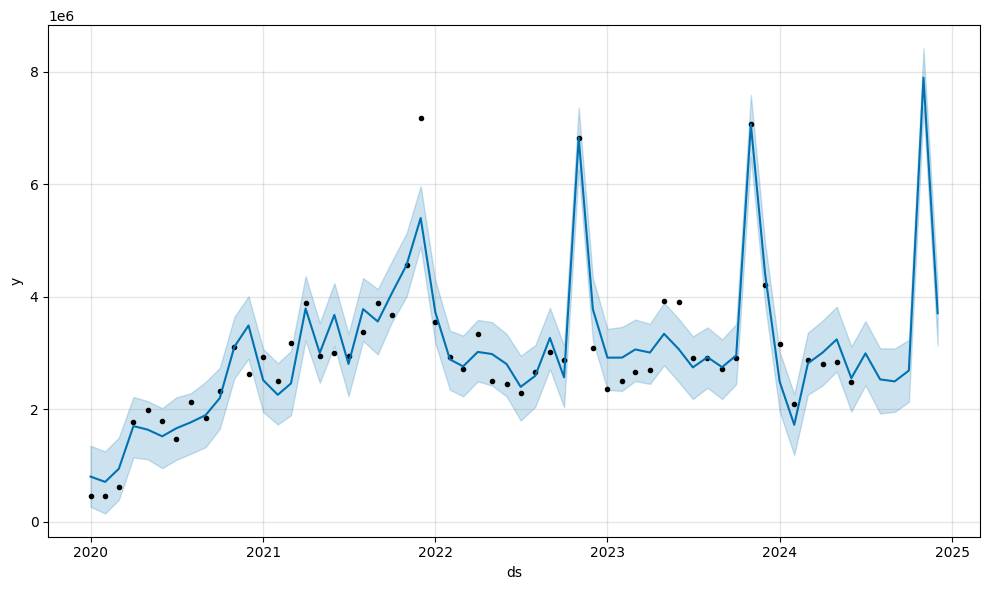

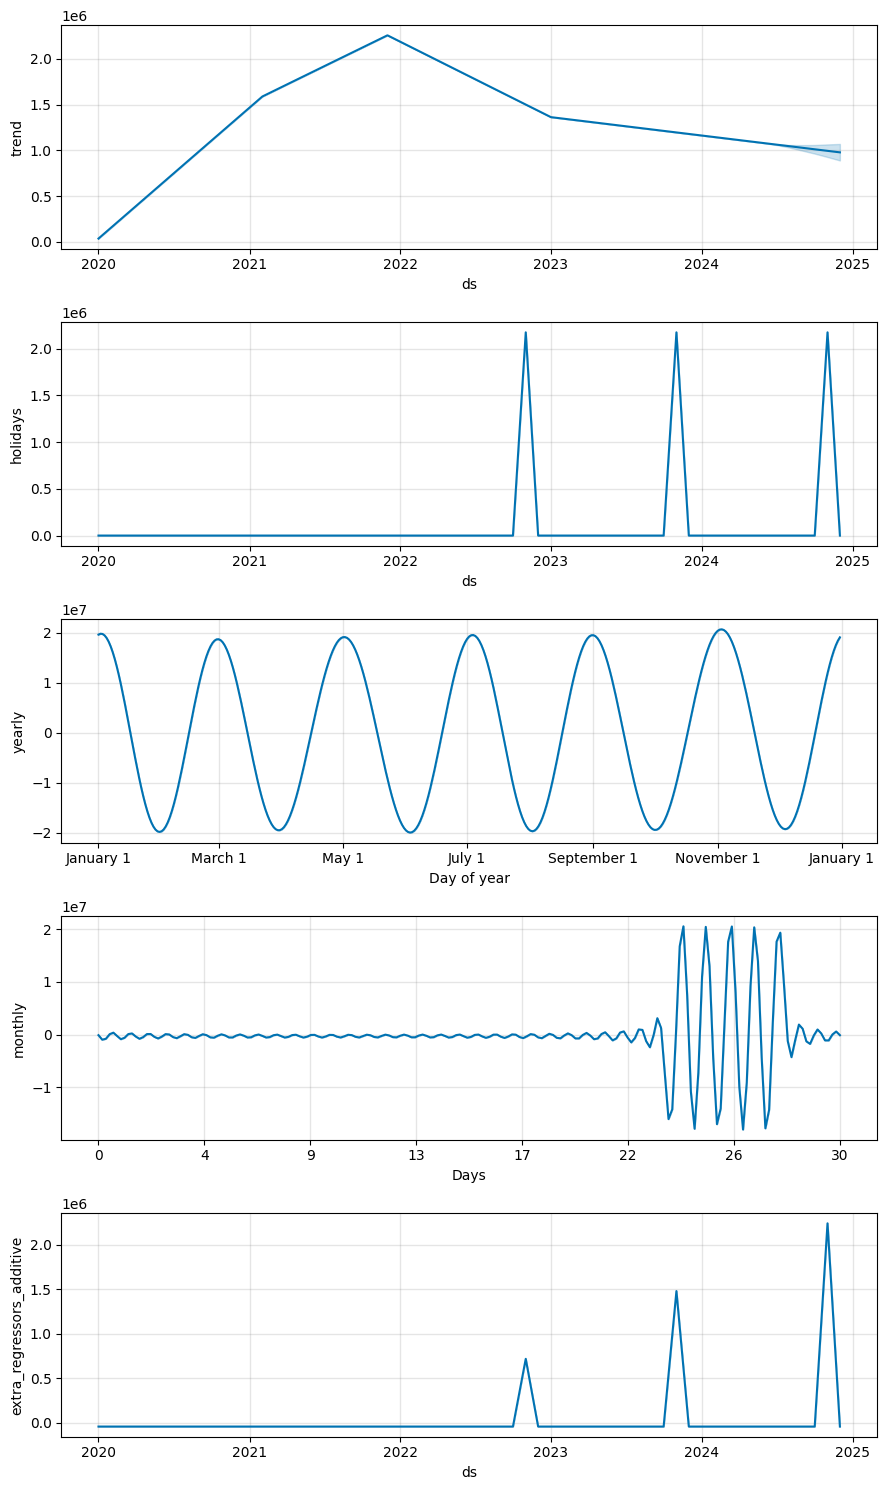

In [ ]:
model2.plot(forecast)
model2.plot_components(forecast)
print(forecast)

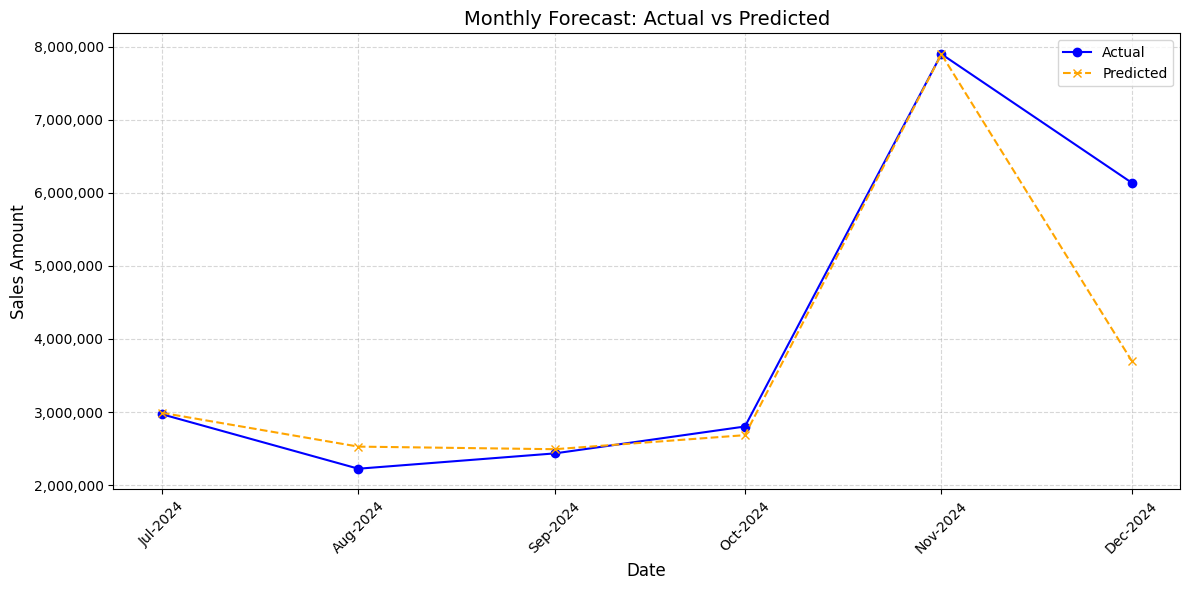

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Plotting actual vs predicted forecast
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(comparison_test['ds'], comparison_test['y'], label='Actual', color='blue', marker='o')

# Plot predicted values
plt.plot(comparison_test['ds'], comparison_test['Predicted'], label='Predicted', color='orange', linestyle='--', marker='x')

# Formatting x-axis with monthly date ticks
plt.title("Monthly Forecast: Actual vs Predicted", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)
plt.xticks(comparison_test['ds'], comparison_test['ds'].dt.strftime('%b-%Y'), rotation=45)

# Formatting y-axis to include commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adding grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# **Model 3**
- Somehow deal with december data

In [ ]:
monthly['dec_growth_factor']=0
monthly['dec_growth_factor'][11]=0
monthly['dec_growth_factor'][23]=1
monthly['dec_growth_factor'][35]=1
monthly['dec_growth_factor'][47]=2
monthly['dec_growth_factor'][59]=3

<ipython-input-106-e5ca7fe0c174>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  monthly['dec_growth_factor'][11]=0
<ipython-input-106-e5ca7fe0c174>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
# Create the holidays dataframe
holidays = pd.DataFrame({
    'holiday': 'nov',
    'ds': pd.to_datetime(['2022-11-01', '2023-11-01', '2024-11-01', '2025-11-01', '2026-11-01']),
    'lower_window': 0,
    'upper_window': 2,

})

In [ ]:
processed_data = monthly.copy()
processed_data.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet

# Split the data into train and test sets
train_data, test_data = train_test_split(processed_data, test_size=test_size, shuffle=False)

# Define the Prophet model
model3 = Prophet(
    changepoint_prior_scale=0.12,
    seasonality_prior_scale=20,
    holidays=holidays,  # Holidays without growth factor here
    changepoint_range=0.95,

)

# Add the growth factor as a custom regressor
model3.add_regressor('nov_growth_factor')
model3.add_regressor('dec_growth_factor')


# Add monthly and yearly seasonality
model3.add_seasonality(name='monthly', period=30.5, fourier_order=40)
model3.add_seasonality(name='yearly', period=365.25, fourier_order=8)

# Fit the model
model3.fit(train_data)

# Create a dataframe for future dates
duration_months = 6
future_dates = model3.make_future_dataframe(periods=duration_months, freq='MS')

# Add the growth factor to future dates
future_dates = future_dates.merge(
    processed_data[['ds', 'nov_growth_factor','dec_growth_factor']],
    on='ds',
    how='left'
)
future_dates['nov_growth_factor'] = future_dates['nov_growth_factor'].fillna(0)  # Fill non-holiday dates with 0
future_dates['dec_growth_factor'] = future_dates['dec_growth_factor'].fillna(0)

# Generate the forecast
forecast = model3.predict(future_dates)

# Evaluate the forecast
predicted_test = forecast.tail(duration_months)
predicted_values = predicted_test['yhat'].values

print(actual_y[:duration_months])
print(predicted_values)

# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(actual_y[:duration_months], predicted_values)
print("MAPE:", mape)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mfrnh4r/mtw3pppi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mfrnh4r/o6mei291.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44015', 'data', 'file=/tmp/tmp0mfrnh4r/mtw3pppi.json', 'init=/tmp/tmp0mfrnh4r/o6mei291.json', 'output', 'file=/tmp/tmp0mfrnh4r/prophet_model6mu1t8u2/prophet_model-20250111075227.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:52:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:29 - cmdstanpy - INFO - Chain [1] d

[2970854.64 2225606.23 2435212.16 2802942.38 7897510.85 6139564.74]
[2951812.19838642 2447436.02754691 2795046.86051251 2808929.41073784
 7391161.50159311 6003324.2645223 ]
MAPE: 0.0570476959735907


In [ ]:
# Combine actual and predicted values for comparison
comparison_test = test_data.copy()
comparison_test['Predicted'] = predicted_test['yhat'].values

In [ ]:
# Calculate evaluation metrics for the test set
actual_test = test_data['y']
predicted_test_values = predicted_test['yhat']

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
# Compute MAPE and RMSE for the test set
adjusted_actual_test = np.where(actual_test == 0, np.nan, actual_test)
mape_test = np.nanmean(np.abs((adjusted_actual_test - predicted_test_values) / adjusted_actual_test)) * 100
# rmse_test = np.sqrt(mean_squared_error(actual_test, predicted_test_values))

# FULL TEST MAPE

In [ ]:
print(f"Test MAPE: {mape_test}%")
# print(f"Test RMSE: {rmse_test}")

Test MAPE: 5.7047695973590695%


In [ ]:
mean_absolute_percentage_error(actual_test, predicted_test_values)*100

5.7047695973590695

# TEST MAPE excluding nov dec

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(actual_test[:4], predicted_test_values[:4])*100

6.399513612522452

# TEST MAPE for nov,dec

In [ ]:
mean_absolute_percentage_error(actual_test[4:], predicted_test_values[4:])*100

4.315281567032304

# TEST MAPE excluding december

In [ ]:
mean_absolute_percentage_error(actual_test[:-1],predicted_test_values[:-1])*100

6.401912004949345

# TEST MAPE for nov

In [ ]:
mean_absolute_percentage_error(actual_test[-2:-1],predicted_test_values[-2:-1])*100

6.411505574656918

# TEST MAPE for december

In [ ]:
mean_absolute_percentage_error(actual_test[-1:],predicted_test_values[-1:])*100

2.2190575594076916

- Dec looks good now

           ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-01-01  2.235961e+04  2.664370e+05  1.421923e+06  2.235961e+04   
1  2020-02-01  1.612614e+05  1.819299e+05  1.293521e+06  1.612614e+05   
2  2020-03-01  2.912018e+05  4.553257e+05  1.603127e+06  2.912018e+05   
3  2020-04-01  4.301035e+05  1.164223e+06  2.334224e+06  4.301035e+05   
4  2020-05-01  5.645246e+05  1.166821e+06  2.311983e+06  5.645246e+05   
5  2020-06-01  7.034264e+05  1.053906e+06  2.215464e+06  7.034264e+05   
6  2020-07-01  8.378475e+05  1.156530e+06  2.305539e+06  8.378475e+05   
7  2020-08-01  9.767492e+05  1.203467e+06  2.366256e+06  9.767492e+05   
8  2020-09-01  1.115651e+06  1.519146e+06  2.665600e+06  1.115651e+06   
9  2020-10-01  1.250072e+06  1.849177e+06  2.985183e+06  1.250072e+06   
10 2020-11-01  1.388973e+06  2.526776e+06  3.654520e+06  1.388973e+06   
11 2020-12-01  1.523394e+06  2.556830e+06  3.692895e+06  1.523394e+06   
12 2021-01-01  1.662295e+06  1.732679e+06  2.865817

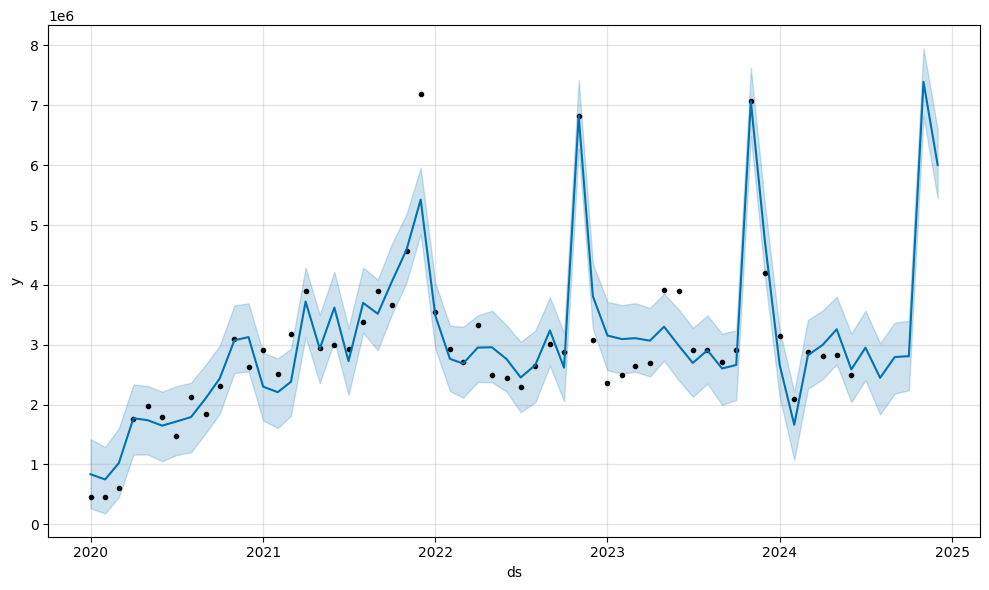

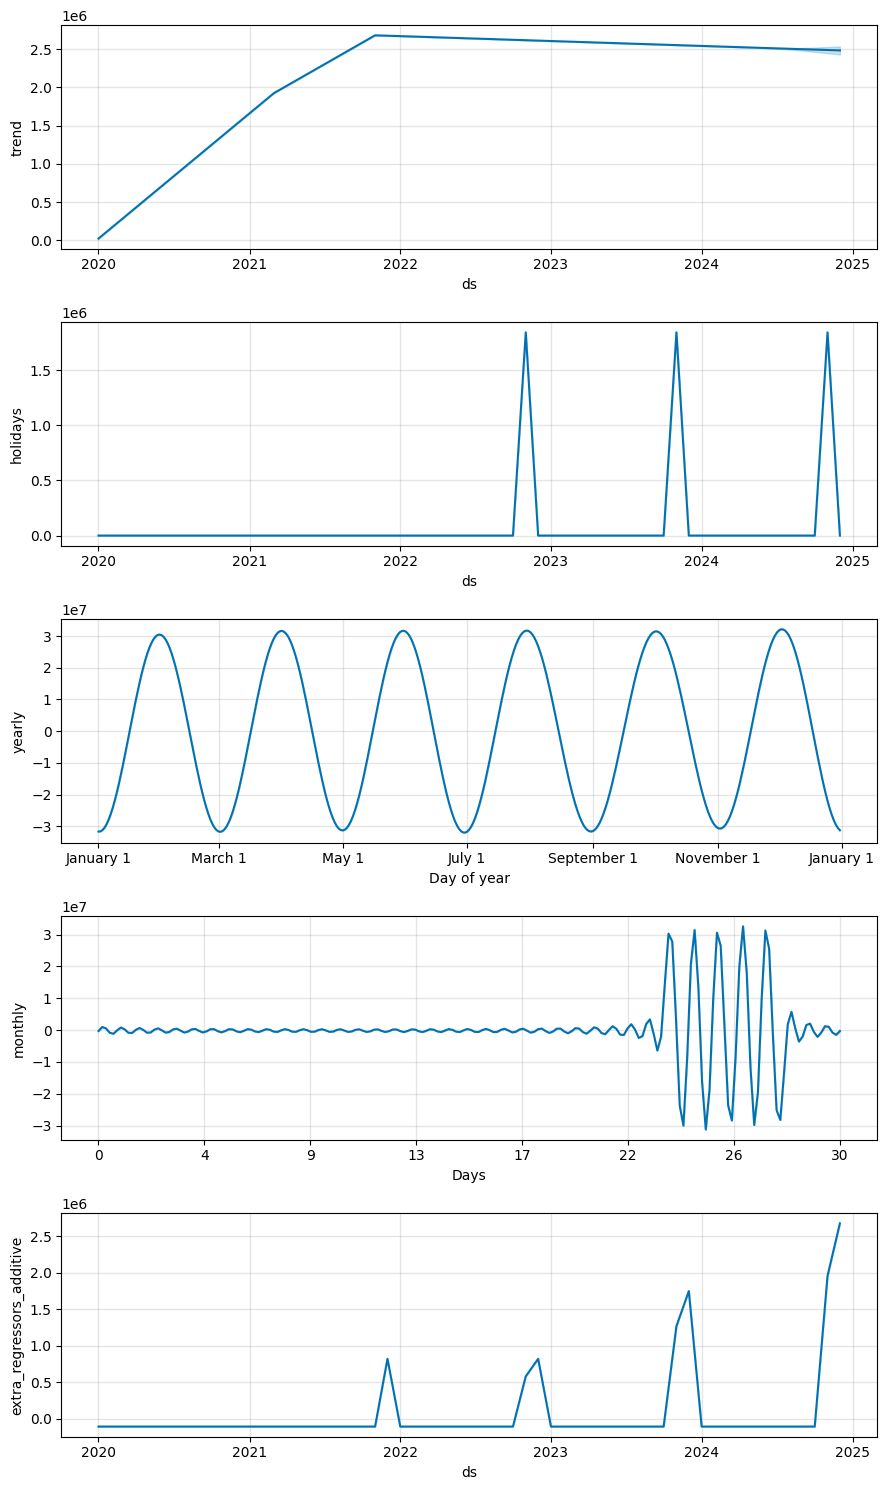

In [ ]:
model3.plot(forecast)
model3.plot_components(forecast)
print(forecast)

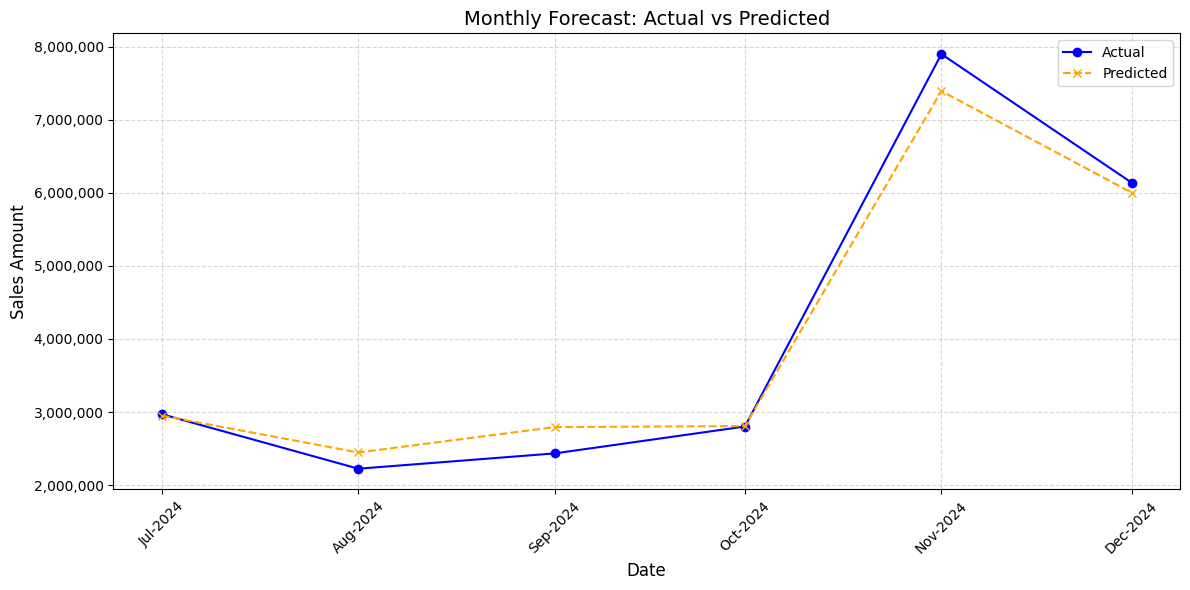

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Plotting actual vs predicted forecast
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(comparison_test['ds'], comparison_test['y'], label='Actual', color='blue', marker='o')

# Plot predicted values
plt.plot(comparison_test['ds'], comparison_test['Predicted'], label='Predicted', color='orange', linestyle='--', marker='x')

# Formatting x-axis with monthly date ticks
plt.title("Monthly Forecast: Actual vs Predicted", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)
plt.xticks(comparison_test['ds'], comparison_test['ds'].dt.strftime('%b-%Y'), rotation=45)

# Formatting y-axis to include commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adding grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# **Model 4**
- Automating the growth factors

In [ ]:
import pandas as pd
sales_data = pd.read_csv('/content/drive/MyDrive/sales_forcasting_20_30.csv')
# Convert 'TRANSACTION_DATE' to datetime format
sales_data['TRANSACTION_DATE'] = pd.to_datetime(sales_data['TRANSACTION_DATE'])
# Remove rows with negative sales values
sales_data = sales_data[sales_data['AMOUNT'] >= 0]
# Aggregate data by day to ensure one entry per day
daily_sales = sales_data.groupby('TRANSACTION_DATE')['AMOUNT'].sum().reset_index()


daily_sales['TRANSACTION_DATE'] = pd.to_datetime(daily_sales['TRANSACTION_DATE'])
daily_sales['Month'] = daily_sales['TRANSACTION_DATE'].dt.to_period('M')
monthly_data = daily_sales.groupby('Month')['AMOUNT'].sum()
monthly_data = monthly_data.reset_index()
monthly_data['Month'] = pd.to_datetime(monthly_data['Month'].astype(str) + '-01')
print(monthly_data)

negative_count = (daily_sales['AMOUNT'] <0).mean() * 100
print(f"Percentage of negative values : {negative_count: .2f}%")

# Generate a continuous date range
date_range = pd.date_range(start=monthly_data['Month'].min(),
                           end=monthly_data['Month'].max(),
                           freq='MS')

missing_dates = pd.date_range(start=monthly_data['Month'].min(),
                              end=monthly_data['Month'].max(), freq='MS').difference(monthly_data['Month'])
print(f"Missing dates before reindexing: {missing_dates}")

# if there is missing value then do interpolation

        Month      AMOUNT
0  2020-01-01   459250.00
1  2020-02-01   449956.00
2  2020-03-01   606968.00
3  2020-04-01  1765946.00
4  2020-05-01  1980428.00
5  2020-06-01  1790336.40
6  2020-07-01  1469764.80
7  2020-08-01  2119409.40
8  2020-09-01  1835163.60
9  2020-10-01  2317348.01
10 2020-11-01  3101114.50
11 2020-12-01  2620364.45
12 2021-01-01  2917960.00
13 2021-02-01  2507670.25
14 2021-03-01  3172181.15
15 2021-04-01  3892369.85
16 2021-05-01  2949675.44
17 2021-06-01  2994190.00
18 2021-07-01  2935938.00
19 2021-08-01  3375666.00
20 2021-09-01  3894346.00
21 2021-10-01  3670942.00
22 2021-11-01  4570961.00
23 2021-12-01  7181412.00
24 2022-01-01  3548826.00
25 2022-02-01  2929017.00
26 2022-03-01  2713061.00
27 2022-04-01  3335970.00
28 2022-05-01  2502842.00
29 2022-06-01  2436982.41
30 2022-07-01  2289036.46
31 2022-08-01  2650238.32
32 2022-09-01  3016362.92
33 2022-10-01  2875187.05
34 2022-11-01  6824868.16
35 2022-12-01  3078805.35
36 2023-01-01  2361582.86
37 2023-02-0

In [ ]:
monthly = monthly_data.copy()
monthly.rename(columns={'Month': 'ds', 'AMOUNT': 'y'}, inplace=True)
# Extract the month and add it as a new column
# monthly['month'] = monthly['ds'].dt.month
#monthly['month'] = monthly['ds'].apply(nov_dec)
test_size = 6

actual_y = monthly['y'][-test_size:].values

print(monthly[-test_size:])

           ds           y
54 2024-07-01  2970854.64
55 2024-08-01  2225606.23
56 2024-09-01  2435212.16
57 2024-10-01  2802942.38
58 2024-11-01  7897510.85
59 2024-12-01  6139564.74


In [ ]:
monthly

ds           y
0  2020-01-01   459250.00
1  2020-02-01   449956.00
2  2020-03-01   606968.00
3  2020-04-01  1765946.00
4  2020-05-01  1980428.00
5  2020-06-01  1790336.40
6  2020-07-01  1469764.80
7  2020-08-01  2119409.40
8  2020-09-01  1835163.60
9  2020-10-01  2317348.01
10 2020-11-01  3101114.50
11 2020-12-01  2620364.45
12 2021-01-01  2917960.00
13 2021-02-01  2507670.25
14 2021-03-01  3172181.15
15 2021-04-01  3892369.85
16 2021-05-01  2949675.44
17 2021-06-01  2994190.00
18 2021-07-01  2935938.00
19 2021-08-01  3375666.00
20 2021-09-01  3894346.00
21 2021-10-01  3670942.00
22 2021-11-01  4570961.00
23 2021-12-01  7181412.00
24 2022-01-01  3548826.00
25 2022-02-01  2929017.00
26 2022-03-01  2713061.00
27 2022-04-01  3335970.00
28 2022-05-01  2502842.00
29 2022-06-01  2436982.41
30 2022-07-01  2289036.46
31 2022-08-01  2650238.32
32 2022-09-01  3016362.92
33 2022-10-01  2875187.05
34 2022-11-01  6824868.16
35 2022-12-01  3078805.35
36 2023-01-01  2361582.86
37 2023-02-01  2501363.71
38 2023-03-01  2652579.72
39 2023-04-01  2702270.06
40 2023-05-01  3916674.30
41 2023-06-01  3899447.43
42 2023-07-01  2910458.93
43 2023-08-01  2914996.02
44 2023-09-01  2709695.09
45 2023-10-01  2910246.23
46 2023-11-01  7063842.39
47 2023-12-01  4199593.43
48 2024-01-01  3152239.50
49 2024-02-01  2090690.19
50 2024-03-01  2880320.40
51 2024-04-01  2806823.94
52 2024-05-01  2832391.85
53 2024-06-01  2487718.09
54 2024-07-01  2970854.64
55 2024-08-01  2225606.23
56 2024-09-01  2435212.16
57 2024-10-01  2802942.38
58 2024-11-01  7897510.85
59 2024-12-01  6139564.74

## **Nov growth factor logic**
- Creating nov growth factor for regressor
- We will avoid hard coding and automate nov_growth_factor using below logic
- The lambda function checks if the month is November (x.month == 11) and the year is greater than or equal to 2022 (x.year >= 2022).
- If true, it calculates the growth factor as (x.year - 2022) + 1.
- If false, it assigns a value of 0.


In [ ]:
# Example: Creating the nov_growth_factor dynamically
import pandas as pd

# Assuming 'date' column exists and is a datetime object
monthly['nov_growth_factor'] = monthly['ds'].apply(lambda x: (x.year - 2022) + 1 if x.month == 11 and x.year >= 2022 else 0)

In [ ]:
monthly

ds           y  nov_growth_factor
0  2020-01-01   459250.00                  0
1  2020-02-01   449956.00                  0
2  2020-03-01   606968.00                  0
3  2020-04-01  1765946.00                  0
4  2020-05-01  1980428.00                  0
5  2020-06-01  1790336.40                  0
6  2020-07-01  1469764.80                  0
7  2020-08-01  2119409.40                  0
8  2020-09-01  1835163.60                  0
9  2020-10-01  2317348.01                  0
10 2020-11-01  3101114.50                  0
11 2020-12-01  2620364.45                  0
12 2021-01-01  2917960.00                  0
13 2021-02-01  2507670.25                  0
14 2021-03-01  3172181.15                  0
15 2021-04-01  3892369.85                  0
16 2021-05-01  2949675.44                  0
17 2021-06-01  2994190.00                  0
18 2021-07-01  2935938.00                  0
19 2021-08-01  3375666.00                  0
20 2021-09-01  3894346.00                  0
21 2021-10-01  3670942.00                  0
22 2021-11-01  4570961.00                  0
23 2021-12-01  7181412.00                  0
24 2022-01-01  3548826.00                  0
25 2022-02-01  2929017.00                  0
26 2022-03-01  2713061.00                  0
27 2022-04-01  3335970.00                  0
28 2022-05-01  2502842.00                  0
29 2022-06-01  2436982.41                  0
30 2022-07-01  2289036.46                  0
31 2022-08-01  2650238.32                  0
32 2022-09-01  3016362.92                  0
33 2022-10-01  2875187.05                  0
34 2022-11-01  6824868.16                  1
35 2022-12-01  3078805.35                  0
36 2023-01-01  2361582.86                  0
37 2023-02-01  2501363.71                  0
38 2023-03-01  2652579.72                  0
39 2023-04-01  2702270.06                  0
40 2023-05-01  3916674.30                  0
41 2023-06-01  3899447.43                  0
42 2023-07-01  2910458.93                  0
43 2023-08-01  2914996.02                  0
44 2023-09-01  2709695.09                  0
45 2023-10-01  2910246.23                  0
46 2023-11-01  7063842.39                  2
47 2023-12-01  4199593.43                  0
48 2024-01-01  3152239.50                  0
49 2024-02-01  2090690.19                  0
50 2024-03-01  2880320.40                  0
51 2024-04-01  2806823.94                  0
52 2024-05-01  2832391.85                  0
53 2024-06-01  2487718.09                  0
54 2024-07-01  2970854.64                  0
55 2024-08-01  2225606.23                  0
56 2024-09-01  2435212.16                  0
57 2024-10-01  2802942.38                  0
58 2024-11-01  7897510.85                  3
59 2024-12-01  6139564.74                  0

## **Dec growth factor logic**
- We will also automate the dec_growth_factor consider the below logic
- The dec_growth_factor column is initialized to None for all December rows to be dynamically calculated. For non-December rows, it is set to 0.
- The growth factor for 2020-12-01 is manually set to 0 as there is no previous December data for comparison.
- For each December starting from 2021-12-01, the script searches for the most recent previous December (i.e., the last December in the data before the current one).
- **Growth Factor Calculation:**
 - **If the sales for the current December are greater than the previous December's sales, the growth factor is incremented by 1 compared to the previous December.**
 - **If the sales for the current December are equal to or less than the previous December's sales, the growth factor remains the same as the previous December's growth factor.**
- For future December months where actual sales data may not be available, the growth factor can be predicted based on historical trends (i.e., if sales typically increase, the growth factor can be incremented based on the previous pattern).
- This logic ensures that the growth factor for each December is based on the comparison of sales with the most recent previous December, providing a consistent method for calculating the growth factor across the years.

In [ ]:
# Initialize the growth factor dynamically
# For December rows, set as None initially; for non-December rows, set as 0
monthly['dec_growth_factor'] = monthly['ds'].apply(lambda x: 0 if x.month != 12 else None)

# Sort the DataFrame by date to ensure chronological order
monthly = monthly.sort_values(by='ds').reset_index(drop=True)

# Manually set the growth factor for the first December row (2020)
monthly.loc[monthly['ds'] == '2020-12-01', 'dec_growth_factor'] = 0

# Loop through the DataFrame to calculate the growth factor dynamically, starting from the second December
for i in range(1, len(monthly)):
    # Check if the current row corresponds to December
    if monthly.loc[i, 'ds'].month == 12:
        # Get the previous December's row (all previous rows before current December)
        prev_dec_row = monthly.loc[(monthly.index < i) & (monthly['ds'].dt.month == 12)].tail(1)

        # Debugging: Check if we have correctly identified a previous December row
        print(f"Processing December {monthly.loc[i, 'ds']}:")
        print(f"Previous December row: {prev_dec_row}")

        if not prev_dec_row.empty:
            # Extract the index, sales, and growth factor of the previous December
            prev_dec_index = prev_dec_row.index[0]
            prev_sales = monthly.loc[prev_dec_index, 'y']
            prev_growth_factor = monthly.loc[prev_dec_index, 'dec_growth_factor']

            # Debugging: Show sales and growth factor comparison
            print(f"Previous Sales: {prev_sales}, Previous Growth Factor: {prev_growth_factor}")

            # Apply the rule for calculating the growth factor
            if monthly.loc[i, 'y'] > prev_sales:
                # If sales increased compared to the previous December
                monthly.loc[i, 'dec_growth_factor'] = prev_growth_factor + 1
                print(f"Sales increased, assigning growth factor: {prev_growth_factor + 1}")
            else:
                # If sales decreased or remained the same
                monthly.loc[i, 'dec_growth_factor'] = prev_growth_factor
                print(f"Sales decreased or remained the same, assigning growth factor: {prev_growth_factor}")



Processing December 2020-12-01 00:00:00:
Previous December row: Empty DataFrame
Columns: [ds, y, nov_growth_factor, dec_growth_factor]
Index: []
Processing December 2021-12-01 00:00:00:
Previous December row:            ds           y  nov_growth_factor  dec_growth_factor
11 2020-12-01  2620364.45                  0                0.0
Previous Sales: 2620364.45, Previous Growth Factor: 0.0
Sales increased, assigning growth factor: 1.0
Processing December 2022-12-01 00:00:00:
Previous December row:            ds          y  nov_growth_factor  dec_growth_factor
23 2021-12-01  7181412.0                  0                1.0
Previous Sales: 7181412.0, Previous Growth Factor: 1.0
Sales decreased or remained the same, assigning growth factor: 1.0
Processing December 2023-12-01 00:00:00:
Previous December row:            ds           y  nov_growth_factor  dec_growth_factor
35 2022-12-01  3078805.35                  0                1.0
Previous Sales: 3078805.35, Previous Growth Factor: 1.0
S

In [ ]:
monthly

ds           y  nov_growth_factor  dec_growth_factor
0  2020-01-01   459250.00                  0                0.0
1  2020-02-01   449956.00                  0                0.0
2  2020-03-01   606968.00                  0                0.0
3  2020-04-01  1765946.00                  0                0.0
4  2020-05-01  1980428.00                  0                0.0
5  2020-06-01  1790336.40                  0                0.0
6  2020-07-01  1469764.80                  0                0.0
7  2020-08-01  2119409.40                  0                0.0
8  2020-09-01  1835163.60                  0                0.0
9  2020-10-01  2317348.01                  0                0.0
10 2020-11-01  3101114.50                  0                0.0
11 2020-12-01  2620364.45                  0                0.0
12 2021-01-01  2917960.00                  0                0.0
13 2021-02-01  2507670.25                  0                0.0
14 2021-03-01  3172181.15                  0                0.0
15 2021-04-01  3892369.85                  0                0.0
16 2021-05-01  2949675.44                  0                0.0
17 2021-06-01  2994190.00                  0                0.0
18 2021-07-01  2935938.00                  0                0.0
19 2021-08-01  3375666.00                  0                0.0
20 2021-09-01  3894346.00                  0                0.0
21 2021-10-01  3670942.00                  0                0.0
22 2021-11-01  4570961.00                  0                0.0
23 2021-12-01  7181412.00                  0                1.0
24 2022-01-01  3548826.00                  0                0.0
25 2022-02-01  2929017.00                  0                0.0
26 2022-03-01  2713061.00                  0                0.0
27 2022-04-01  3335970.00                  0                0.0
28 2022-05-01  2502842.00                  0                0.0
29 2022-06-01  2436982.41                  0                0.0
30 2022-07-01  2289036.46                  0                0.0
31 2022-08-01  2650238.32                  0                0.0
32 2022-09-01  3016362.92                  0                0.0
33 2022-10-01  2875187.05                  0                0.0
34 2022-11-01  6824868.16                  1                0.0
35 2022-12-01  3078805.35                  0                1.0
36 2023-01-01  2361582.86                  0                0.0
37 2023-02-01  2501363.71                  0                0.0
38 2023-03-01  2652579.72                  0                0.0
39 2023-04-01  2702270.06                  0                0.0
40 2023-05-01  3916674.30                  0                0.0
41 2023-06-01  3899447.43                  0                0.0
42 2023-07-01  2910458.93                  0                0.0
43 2023-08-01  2914996.02                  0                0.0
44 2023-09-01  2709695.09                  0                0.0
45 2023-10-01  2910246.23                  0                0.0
46 2023-11-01  7063842.39                  2                0.0
47 2023-12-01  4199593.43                  0                2.0
48 2024-01-01  3152239.50                  0                0.0
49 2024-02-01  2090690.19                  0                0.0
50 2024-03-01  2880320.40                  0                0.0
51 2024-04-01  2806823.94                  0                0.0
52 2024-05-01  2832391.85                  0                0.0
53 2024-06-01  2487718.09                  0                0.0
54 2024-07-01  2970854.64                  0                0.0
55 2024-08-01  2225606.23                  0                0.0
56 2024-09-01  2435212.16                  0                0.0
57 2024-10-01  2802942.38                  0                0.0
58 2024-11-01  7897510.85                  3                0.0
59 2024-12-01  6139564.74                  0                3.0

In [ ]:
# Create the holidays dataframe
holidays = pd.DataFrame({
    'holiday': 'nov',
    'ds': pd.to_datetime(['2022-11-01', '2023-11-01', '2024-11-01', '2025-11-01', '2026-11-01']),
    'lower_window': 0,
    'upper_window': 2,

})

In [ ]:
processed_data = monthly.copy()
processed_data.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet

# Split the data into train and test sets
train_data, test_data = train_test_split(processed_data, test_size=test_size, shuffle=False)

# Define the Prophet model
model4 = Prophet(
    changepoint_prior_scale=0.12,
    seasonality_prior_scale=20,
    holidays=holidays,  # Holidays without growth factor here
    changepoint_range=0.95,

)

# Add the growth factor as a custom regressor
model4.add_regressor('nov_growth_factor')
model4.add_regressor('dec_growth_factor')


# Add monthly and yearly seasonality
model4.add_seasonality(name='monthly', period=30.5, fourier_order=40)
model4.add_seasonality(name='yearly', period=365.25, fourier_order=8)

# Fit the model
model4.fit(train_data)

# Create a dataframe for future dates
duration_months = 6
future_dates = model4.make_future_dataframe(periods=duration_months, freq='MS')

# Add the growth factor to future dates
future_dates = future_dates.merge(
    processed_data[['ds', 'nov_growth_factor','dec_growth_factor']],
    on='ds',
    how='left'
)
future_dates['nov_growth_factor'] = future_dates['nov_growth_factor'].fillna(0)  # Fill non-holiday dates with 0
future_dates['dec_growth_factor'] = future_dates['dec_growth_factor'].fillna(0)

# Generate the forecast
forecast = model4.predict(future_dates)

# Evaluate the forecast
predicted_test = forecast.tail(duration_months)
predicted_values = predicted_test['yhat'].values

print(actual_y[:duration_months])
print(predicted_values)

# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(actual_y[:duration_months], predicted_values)
print("MAPE:", mape)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mfrnh4r/8bn3ihw6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mfrnh4r/smrnyaer.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31753', 'data', 'file=/tmp/tmp0mfrnh4r/8bn3ihw6.json', 'init=/tmp/tmp0mfrnh4r/smrnyaer.json', 'output', 'file=/tmp/tmp0mfrnh4r/prophet_modelenodzd4e/prophet_model-20250111075429.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:54:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:31 - cmdstanpy - INFO - Chain [1] d

[2970854.64 2225606.23 2435212.16 2802942.38 7897510.85 6139564.74]
[2951812.19838642 2447436.02754691 2795046.86051251 2808929.41073784
 7391161.50159311 6003324.2645223 ]
MAPE: 0.0570476959735907


In [ ]:
# Combine actual and predicted values for comparison
comparison_test = test_data.copy()
comparison_test['Predicted'] = predicted_test['yhat'].values

In [ ]:
# Calculate evaluation metrics for the test set
actual_test = test_data['y']
predicted_test_values = predicted_test['yhat']

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
# Compute MAPE and RMSE for the test set
adjusted_actual_test = np.where(actual_test == 0, np.nan, actual_test)
mape_test = np.nanmean(np.abs((adjusted_actual_test - predicted_test_values) / adjusted_actual_test)) * 100
# rmse_test = np.sqrt(mean_squared_error(actual_test, predicted_test_values))

# FULL TEST MAPE

In [ ]:
print(f"Test MAPE: {mape_test}%")
# print(f"Test RMSE: {rmse_test}")

Test MAPE: 5.7047695973590695%


In [ ]:
mean_absolute_percentage_error(actual_test, predicted_test_values)*100

5.7047695973590695

# TEST MAPE excluding nov dec

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(actual_test[:4], predicted_test_values[:4])*100

6.399513612522452

# TEST MAPE for nov,dec

In [ ]:
mean_absolute_percentage_error(actual_test[4:], predicted_test_values[4:])*100

4.315281567032304

# TEST MAPE excluding december

In [ ]:
mean_absolute_percentage_error(actual_test[:-1],predicted_test_values[:-1])*100

6.401912004949345

# TEST MAPE for nov

In [ ]:
mean_absolute_percentage_error(actual_test[-2:-1],predicted_test_values[-2:-1])*100

6.411505574656918

# TEST MAPE for december

In [ ]:
mean_absolute_percentage_error(actual_test[-1:],predicted_test_values[-1:])*100

2.2190575594076916

- Only december data is an issue

           ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-01-01  2.235961e+04  2.750912e+05  1.406890e+06  2.235961e+04   
1  2020-02-01  1.612614e+05  1.017633e+05  1.314513e+06  1.612614e+05   
2  2020-03-01  2.912018e+05  4.554473e+05  1.585509e+06  2.912018e+05   
3  2020-04-01  4.301035e+05  1.200541e+06  2.364605e+06  4.301035e+05   
4  2020-05-01  5.645246e+05  1.176889e+06  2.328843e+06  5.645246e+05   
5  2020-06-01  7.034264e+05  1.087441e+06  2.227578e+06  7.034264e+05   
6  2020-07-01  8.378475e+05  1.130485e+06  2.292515e+06  8.378475e+05   
7  2020-08-01  9.767492e+05  1.209314e+06  2.396116e+06  9.767492e+05   
8  2020-09-01  1.115651e+06  1.547254e+06  2.659869e+06  1.115651e+06   
9  2020-10-01  1.250072e+06  1.831741e+06  3.017522e+06  1.250072e+06   
10 2020-11-01  1.388973e+06  2.505823e+06  3.624402e+06  1.388973e+06   
11 2020-12-01  1.523394e+06  2.587668e+06  3.719921e+06  1.523394e+06   
12 2021-01-01  1.662295e+06  1.725257e+06  2.800414

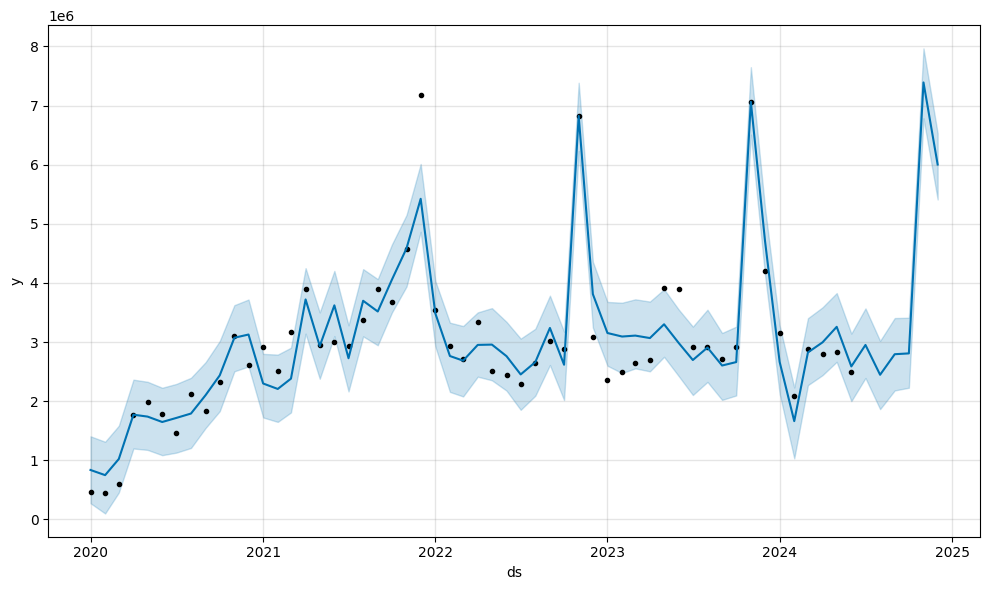

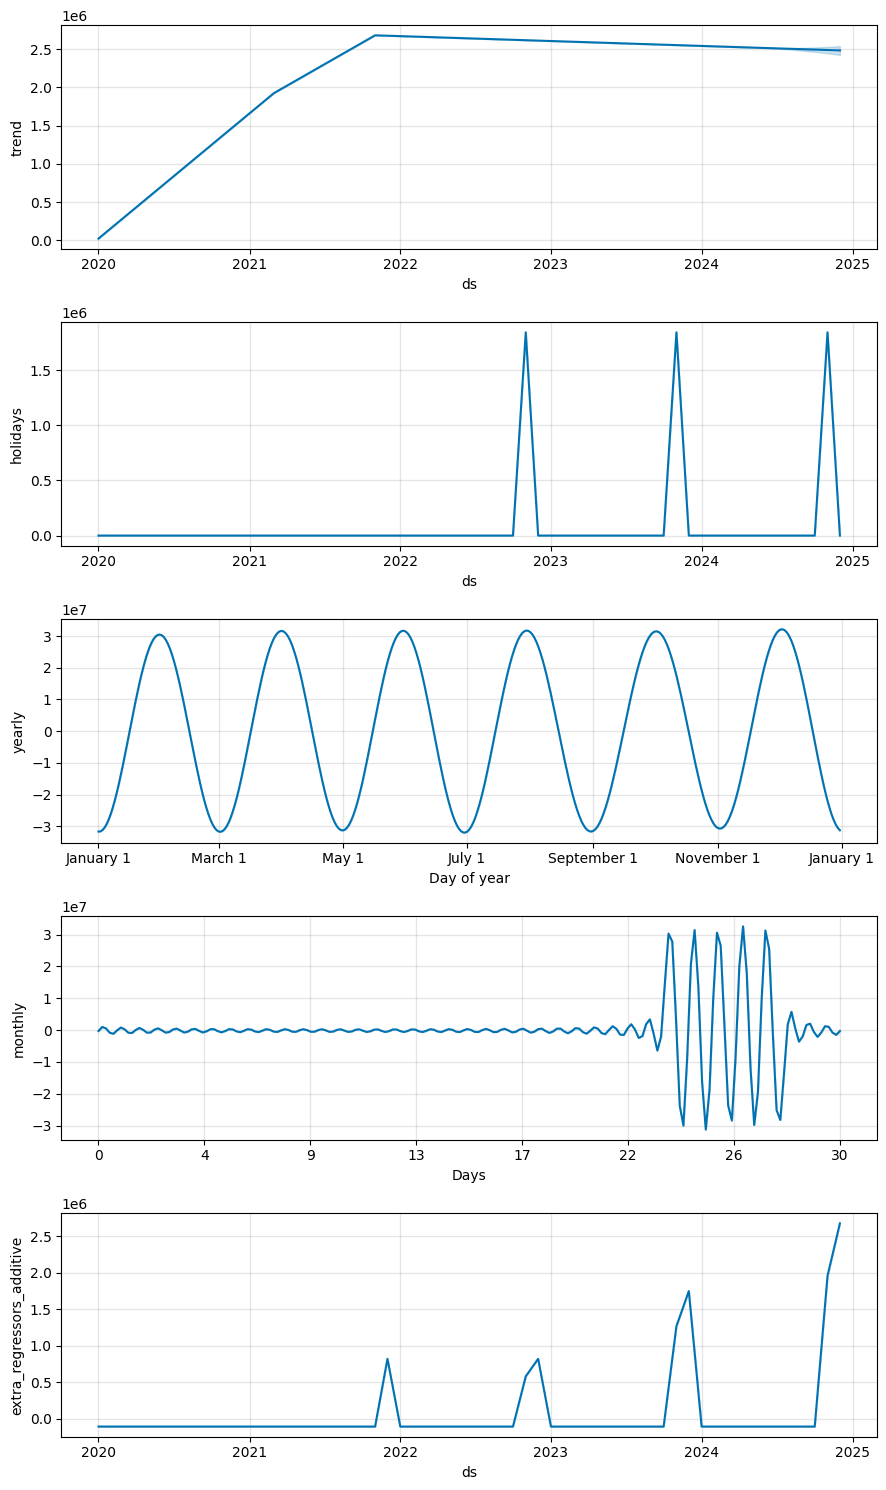

In [ ]:
model4.plot(forecast)
model4.plot_components(forecast)
print(forecast)

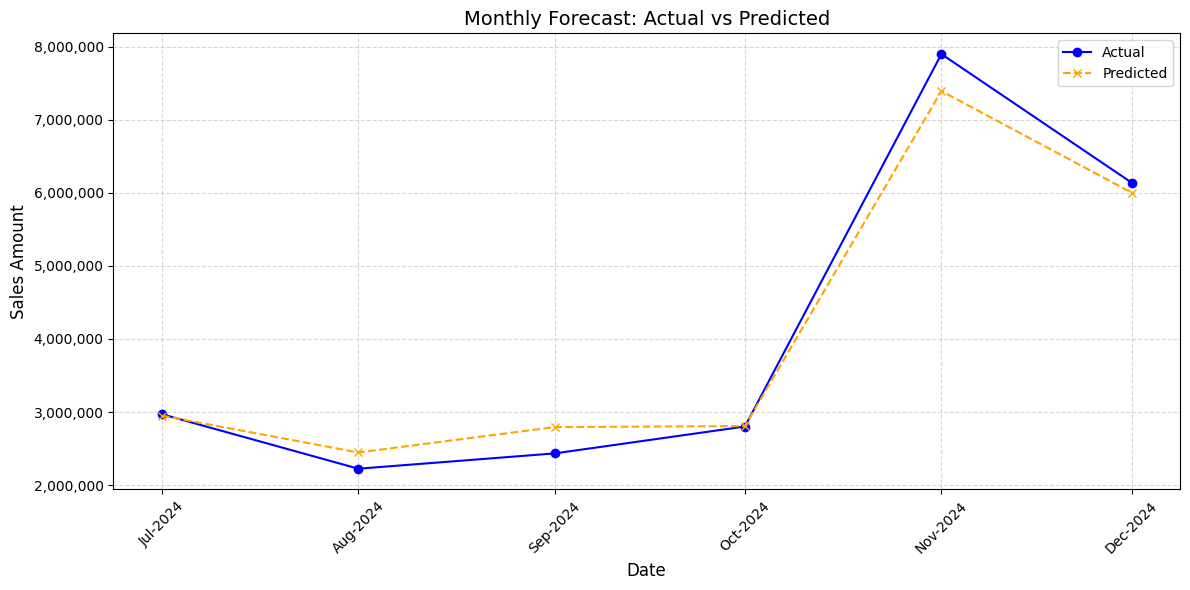

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Plotting actual vs predicted forecast
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(comparison_test['ds'], comparison_test['y'], label='Actual', color='blue', marker='o')

# Plot predicted values
plt.plot(comparison_test['ds'], comparison_test['Predicted'], label='Predicted', color='orange', linestyle='--', marker='x')

# Formatting x-axis with monthly date ticks
plt.title("Monthly Forecast: Actual vs Predicted", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)
plt.xticks(comparison_test['ds'], comparison_test['ds'].dt.strftime('%b-%Y'), rotation=45)

# Formatting y-axis to include commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adding grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# New Data with FULL december 2024 data

In [96]:
daily_sales=pd.read_csv('/content/drive/MyDrive/SF_daily_sum.csv')

In [97]:
daily_sales.columns=['TRANSACTION_DATE', 'AMOUNT']

In [98]:
daily_sales

TRANSACTION_DATE     AMOUNT
0          2020-01-02   26294.00
1          2020-01-03   19713.00
2          2020-01-05   19776.00
3          2020-01-06   24111.00
4          2020-01-07   16192.00
...               ...        ...
1622       2025-01-07   70401.85
1623       2025-01-08   53255.84
1624       2025-01-09   52853.27
1625       2025-01-10   53355.88
1626       2025-01-13  164388.52

[1627 rows x 2 columns]

In [99]:
daily_sales.tail(20)

TRANSACTION_DATE     AMOUNT
1607       2024-12-16  142473.90
1608       2024-12-17  213757.08
1609       2024-12-18  165667.43
1610       2024-12-19  127278.72
1611       2024-12-20   79208.11
1612       2024-12-23  180187.71
1613       2024-12-24   56197.03
1614       2024-12-26   75966.46
1615       2024-12-27  146034.80
1616       2024-12-30  231171.03
1617       2024-12-31  144399.09
1618       2025-01-02  128748.54
1619       2025-01-03   89591.87
1620       2025-01-05     152.00
1621       2025-01-06  154617.91
1622       2025-01-07   70401.85
1623       2025-01-08   53255.84
1624       2025-01-09   52853.27
1625       2025-01-10   53355.88
1626       2025-01-13  164388.52

In [100]:
daily_sales[:-9]

TRANSACTION_DATE     AMOUNT
0          2020-01-02   26294.00
1          2020-01-03   19713.00
2          2020-01-05   19776.00
3          2020-01-06   24111.00
4          2020-01-07   16192.00
...               ...        ...
1613       2024-12-24   56197.03
1614       2024-12-26   75966.46
1615       2024-12-27  146034.80
1616       2024-12-30  231171.03
1617       2024-12-31  144399.09

[1618 rows x 2 columns]

In [101]:
daily_sales=daily_sales[:-9]

In [102]:
daily_sales['TRANSACTION_DATE'] = pd.to_datetime(daily_sales['TRANSACTION_DATE'])
daily_sales['Month'] = daily_sales['TRANSACTION_DATE'].dt.to_period('M')
monthly_data = daily_sales.groupby('Month')['AMOUNT'].sum()
monthly_data = monthly_data.reset_index()
monthly_data['Month'] = pd.to_datetime(monthly_data['Month'].astype(str) + '-01')
print(monthly_data)

negative_count = (daily_sales['AMOUNT'] <0).mean() * 100
print(f"Percentage of negative values : {negative_count: .2f}%")

# Generate a continuous date range
date_range = pd.date_range(start=monthly_data['Month'].min(),
                           end=monthly_data['Month'].max(),
                           freq='MS')

missing_dates = pd.date_range(start=monthly_data['Month'].min(),
                              end=monthly_data['Month'].max(), freq='MS').difference(monthly_data['Month'])
print(f"Missing dates before reindexing: {missing_dates}")

# if there is missing value then do interpolation

        Month      AMOUNT
0  2020-01-01   459250.00
1  2020-02-01   449956.00
2  2020-03-01   606968.00
3  2020-04-01  1765946.00
4  2020-05-01  1980428.00
5  2020-06-01  1790336.40
6  2020-07-01  1469764.80
7  2020-08-01  1971241.40
8  2020-09-01  1564104.29
9  2020-10-01  2123847.01
10 2020-11-01  3101114.50
11 2020-12-01  2620364.45
12 2021-01-01  2917960.00
13 2021-02-01  2507670.25
14 2021-03-01  3172181.15
15 2021-04-01  3892369.85
16 2021-05-01  2949675.44
17 2021-06-01  2994190.00
18 2021-07-01  2935938.00
19 2021-08-01  3375666.00
20 2021-09-01  3894346.00
21 2021-10-01  3670942.00
22 2021-11-01  4570784.00
23 2021-12-01  7181412.00
24 2022-01-01  3548826.00
25 2022-02-01  2929017.00
26 2022-03-01  2713061.00
27 2022-04-01  3335970.00
28 2022-05-01  2502842.00
29 2022-06-01  2436982.41
30 2022-07-01  2289036.46
31 2022-08-01  2650238.32
32 2022-09-01  3016362.92
33 2022-10-01  2875187.05
34 2022-11-01  6824868.16
35 2022-12-01  3078805.35
36 2023-01-01  2361582.86
37 2023-02-0

<ipython-input-102-1dc809b88b2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales['TRANSACTION_DATE'] = pd.to_datetime(daily_sales['TRANSACTION_DATE'])
<ipython-input-102-1dc809b88b2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales['Month'] = daily_sales['TRANSACTION_DATE'].dt.to_period('M')


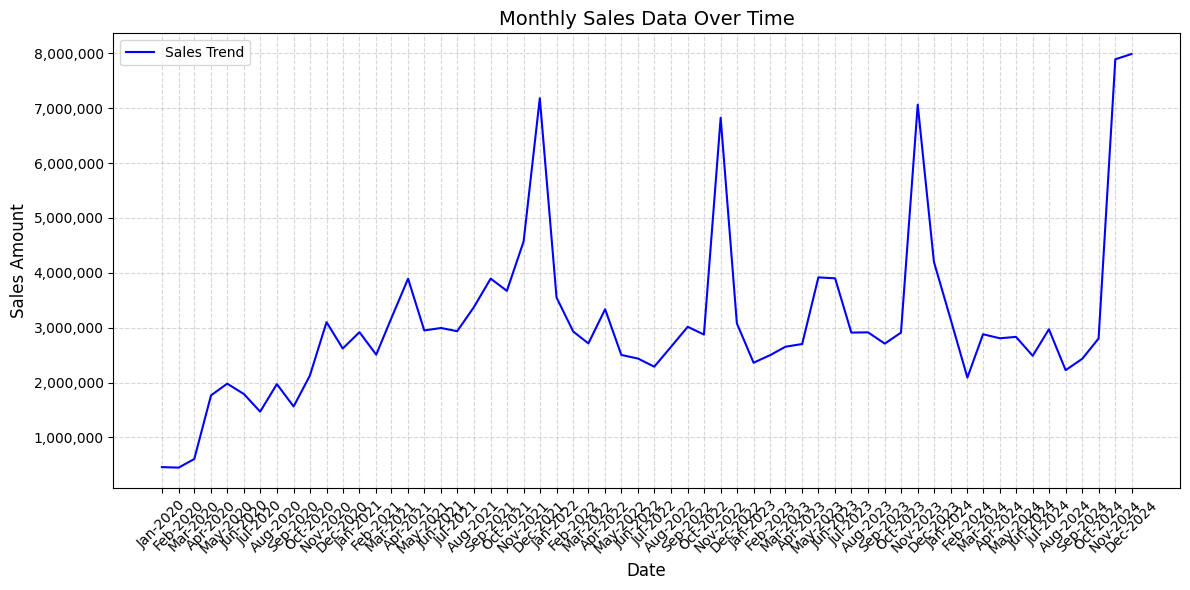

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

# Assuming `monthly_data` is your DataFrame with 'Month' and 'AMOUNT'
monthly_data['Year'] = monthly_data['Month'].dt.year
monthly_data['Month_Num'] = monthly_data['Month'].dt.month

# 1. Entire Data Plot with months in between years on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'], monthly_data['AMOUNT'], label='Sales Trend', color='blue')

# Set x-axis labels with both month and year
plt.title("Monthly Sales Data Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)

# Customize the x-ticks to display both month and year
plt.xticks(monthly_data['Month'], monthly_data['Month'].dt.strftime('%b-%Y'), rotation=45)

# Set the y-axis to display numbers with commas as thousands separators
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


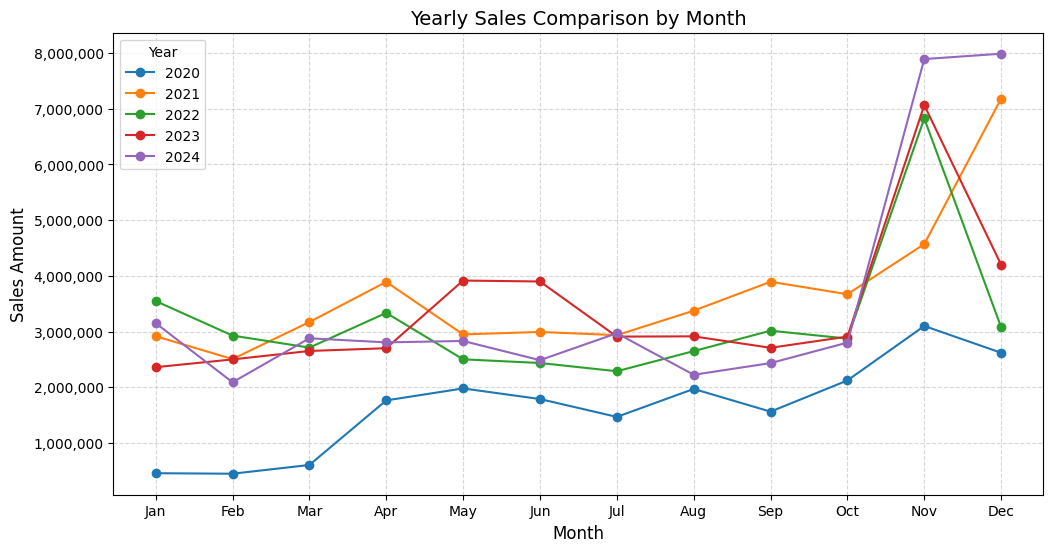

In [104]:
# 2. Yearly Data with Superimposed Lines
# Pivot to get each year as a separate column
pivot_data = monthly_data.pivot(index='Month_Num', columns='Year', values='AMOUNT')

plt.figure(figsize=(12, 6))
for year in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[year], label=f'{year}', marker='o')

plt.title("Yearly Sales Comparison by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Set the y-axis to display numbers with commas as thousands separators
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Year", fontsize=10)
plt.show()

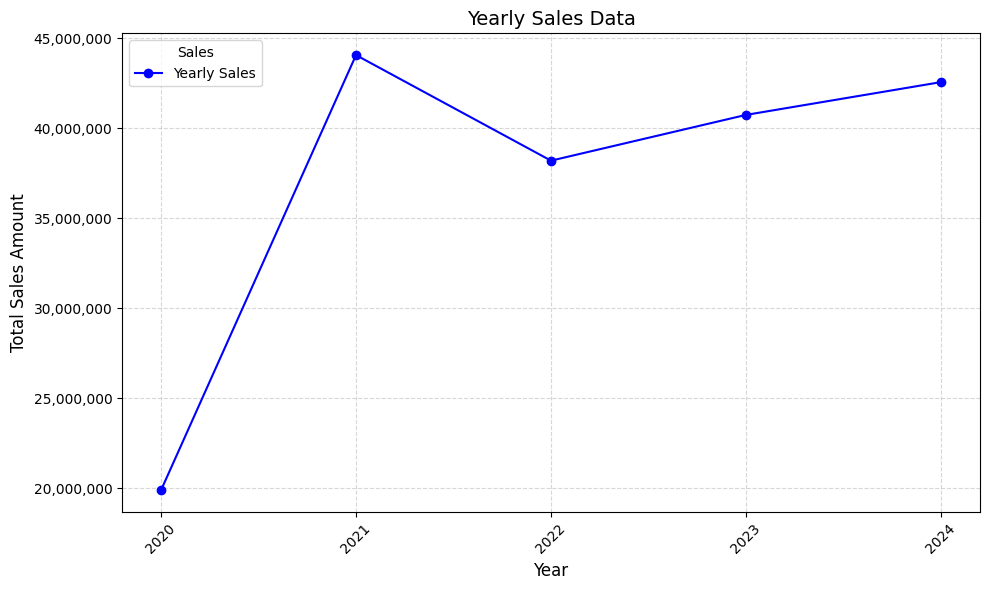

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter

# Assuming `monthly_data` is your DataFrame with 'Month' and 'AMOUNT'
monthly_data['Year'] = monthly_data['Month'].dt.year

# Aggregate the data by year (sum the sales for each year)
yearly_data = monthly_data.groupby('Year')['AMOUNT'].sum().reset_index()

# Plot the yearly sales data
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Year'], yearly_data['AMOUNT'], marker='o', color='b', label='Yearly Sales')

# Customize the plot
plt.title("Yearly Sales Data", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)
plt.xticks(yearly_data['Year'], rotation=45)

# Set the y-axis to display numbers with commas as thousands separators
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Sales", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [106]:
monthly = monthly_data.copy()
monthly.rename(columns={'Month': 'ds', 'AMOUNT': 'y'}, inplace=True)
# Extract the month and add it as a new column
# monthly['month'] = monthly['ds'].dt.month
#monthly['month'] = monthly['ds'].apply(nov_dec)
test_size = 6

actual_y = monthly['y'][-test_size:].values

print(monthly[-test_size:])

           ds           y  Year  Month_Num
54 2024-07-01  2970854.64  2024          7
55 2024-08-01  2225606.23  2024          8
56 2024-09-01  2435212.16  2024          9
57 2024-10-01  2802942.38  2024         10
58 2024-11-01  7891028.24  2024         11
59 2024-12-01  7986800.99  2024         12


In [107]:
monthly

ds           y  Year  Month_Num
0  2020-01-01   459250.00  2020          1
1  2020-02-01   449956.00  2020          2
2  2020-03-01   606968.00  2020          3
3  2020-04-01  1765946.00  2020          4
4  2020-05-01  1980428.00  2020          5
5  2020-06-01  1790336.40  2020          6
6  2020-07-01  1469764.80  2020          7
7  2020-08-01  1971241.40  2020          8
8  2020-09-01  1564104.29  2020          9
9  2020-10-01  2123847.01  2020         10
10 2020-11-01  3101114.50  2020         11
11 2020-12-01  2620364.45  2020         12
12 2021-01-01  2917960.00  2021          1
13 2021-02-01  2507670.25  2021          2
14 2021-03-01  3172181.15  2021          3
15 2021-04-01  3892369.85  2021          4
16 2021-05-01  2949675.44  2021          5
17 2021-06-01  2994190.00  2021          6
18 2021-07-01  2935938.00  2021          7
19 2021-08-01  3375666.00  2021          8
20 2021-09-01  3894346.00  2021          9
21 2021-10-01  3670942.00  2021         10
22 2021-11-01  4570784.00  2021         11
23 2021-12-01  7181412.00  2021         12
24 2022-01-01  3548826.00  2022          1
25 2022-02-01  2929017.00  2022          2
26 2022-03-01  2713061.00  2022          3
27 2022-04-01  3335970.00  2022          4
28 2022-05-01  2502842.00  2022          5
29 2022-06-01  2436982.41  2022          6
30 2022-07-01  2289036.46  2022          7
31 2022-08-01  2650238.32  2022          8
32 2022-09-01  3016362.92  2022          9
33 2022-10-01  2875187.05  2022         10
34 2022-11-01  6824868.16  2022         11
35 2022-12-01  3078805.35  2022         12
36 2023-01-01  2361582.86  2023          1
37 2023-02-01  2501363.71  2023          2
38 2023-03-01  2652579.72  2023          3
39 2023-04-01  2702270.06  2023          4
40 2023-05-01  3916674.30  2023          5
41 2023-06-01  3899447.43  2023          6
42 2023-07-01  2910458.93  2023          7
43 2023-08-01  2914996.02  2023          8
44 2023-09-01  2709695.09  2023          9
45 2023-10-01  2910246.23  2023         10
46 2023-11-01  7063842.39  2023         11
47 2023-12-01  4199593.43  2023         12
48 2024-01-01  3152239.50  2024          1
49 2024-02-01  2090690.19  2024          2
50 2024-03-01  2880320.40  2024          3
51 2024-04-01  2806823.94  2024          4
52 2024-05-01  2832391.85  2024          5
53 2024-06-01  2487718.09  2024          6
54 2024-07-01  2970854.64  2024          7
55 2024-08-01  2225606.23  2024          8
56 2024-09-01  2435212.16  2024          9
57 2024-10-01  2802942.38  2024         10
58 2024-11-01  7891028.24  2024         11
59 2024-12-01  7986800.99  2024         12

## **Nov growth factor logic**
- Creating nov growth factor for regressor
- We will avoid hard coding and automate nov_growth_factor using below logic
- The lambda function checks if the month is November (x.month == 11) and the year is greater than or equal to 2022 (x.year >= 2022).
- If true, it calculates the growth factor as (x.year - 2022) + 1.
- If false, it assigns a value of 0.

In [112]:
# Example: Creating the nov_growth_factor dynamically
import pandas as pd

# Assuming 'date' column exists and is a datetime object
monthly['nov_growth_factor'] = monthly['ds'].apply(lambda x: (x.year - 2022) + 1 if x.month == 11 and x.year >= 2022 else 0)

In [113]:
monthly

ds           y  Year  Month_Num  nov_growth_factor
0  2020-01-01   459250.00  2020          1                  0
1  2020-02-01   449956.00  2020          2                  0
2  2020-03-01   606968.00  2020          3                  0
3  2020-04-01  1765946.00  2020          4                  0
4  2020-05-01  1980428.00  2020          5                  0
5  2020-06-01  1790336.40  2020          6                  0
6  2020-07-01  1469764.80  2020          7                  0
7  2020-08-01  1971241.40  2020          8                  0
8  2020-09-01  1564104.29  2020          9                  0
9  2020-10-01  2123847.01  2020         10                  0
10 2020-11-01  3101114.50  2020         11                  0
11 2020-12-01  2620364.45  2020         12                  0
12 2021-01-01  2917960.00  2021          1                  0
13 2021-02-01  2507670.25  2021          2                  0
14 2021-03-01  3172181.15  2021          3                  0
15 2021-04-01  3892369.85  2021          4                  0
16 2021-05-01  2949675.44  2021          5                  0
17 2021-06-01  2994190.00  2021          6                  0
18 2021-07-01  2935938.00  2021          7                  0
19 2021-08-01  3375666.00  2021          8                  0
20 2021-09-01  3894346.00  2021          9                  0
21 2021-10-01  3670942.00  2021         10                  0
22 2021-11-01  4570784.00  2021         11                  0
23 2021-12-01  7181412.00  2021         12                  0
24 2022-01-01  3548826.00  2022          1                  0
25 2022-02-01  2929017.00  2022          2                  0
26 2022-03-01  2713061.00  2022          3                  0
27 2022-04-01  3335970.00  2022          4                  0
28 2022-05-01  2502842.00  2022          5                  0
29 2022-06-01  2436982.41  2022          6                  0
30 2022-07-01  2289036.46  2022          7                  0
31 2022-08-01  2650238.32  2022          8                  0
32 2022-09-01  3016362.92  2022          9                  0
33 2022-10-01  2875187.05  2022         10                  0
34 2022-11-01  6824868.16  2022         11                  1
35 2022-12-01  3078805.35  2022         12                  0
36 2023-01-01  2361582.86  2023          1                  0
37 2023-02-01  2501363.71  2023          2                  0
38 2023-03-01  2652579.72  2023          3                  0
39 2023-04-01  2702270.06  2023          4                  0
40 2023-05-01  3916674.30  2023          5                  0
41 2023-06-01  3899447.43  2023          6                  0
42 2023-07-01  2910458.93  2023          7                  0
43 2023-08-01  2914996.02  2023          8                  0
44 2023-09-01  2709695.09  2023          9                  0
45 2023-10-01  2910246.23  2023         10                  0
46 2023-11-01  7063842.39  2023         11                  2
47 2023-12-01  4199593.43  2023         12                  0
48 2024-01-01  3152239.50  2024          1                  0
49 2024-02-01  2090690.19  2024          2                  0
50 2024-03-01  2880320.40  2024          3                  0
51 2024-04-01  2806823.94  2024          4                  0
52 2024-05-01  2832391.85  2024          5                  0
53 2024-06-01  2487718.09  2024          6                  0
54 2024-07-01  2970854.64  2024          7                  0
55 2024-08-01  2225606.23  2024          8                  0
56 2024-09-01  2435212.16  2024          9                  0
57 2024-10-01  2802942.38  2024         10                  0
58 2024-11-01  7891028.24  2024         11                  3
59 2024-12-01  7986800.99  2024         12                  0

## **Dec growth factor logic**
- We will also automate the dec_growth_factor consider the below logic
- The dec_growth_factor column is initialized to None for all December rows to be dynamically calculated. For non-December rows, it is set to 0.
- The growth factor for 2020-12-01 is manually set to 0 as there is no previous December data for comparison.
- For each December starting from 2021-12-01, the script searches for the most recent previous December (i.e., the last December in the data before the current one).
- **Growth Factor Calculation:**
 - **If the sales for the current December are greater than the previous December's sales, the growth factor is incremented by 1 compared to the previous December.**
 - **If the sales for the current December are equal to or less than the previous December's sales, the growth factor remains the same as the previous December's growth factor.**
- For future December months where actual sales data may not be available, the growth factor can be predicted based on historical trends (i.e., if sales typically increase, the growth factor can be incremented based on the previous pattern).
- This logic ensures that the growth factor for each December is based on the comparison of sales with the most recent previous December, providing a consistent method for calculating the growth factor across the years.

In [114]:
# Initialize the growth factor dynamically
# For December rows, set as None initially; for non-December rows, set as 0
monthly['dec_growth_factor'] = monthly['ds'].apply(lambda x: 0 if x.month != 12 else None)

# Sort the DataFrame by date to ensure chronological order
monthly = monthly.sort_values(by='ds').reset_index(drop=True)

# Manually set the growth factor for the first December row (2020)
monthly.loc[monthly['ds'] == '2020-12-01', 'dec_growth_factor'] = 0

# Loop through the DataFrame to calculate the growth factor dynamically, starting from the second December
for i in range(1, len(monthly)):
    # Check if the current row corresponds to December
    if monthly.loc[i, 'ds'].month == 12:
        # Get the previous December's row (all previous rows before current December)
        prev_dec_row = monthly.loc[(monthly.index < i) & (monthly['ds'].dt.month == 12)].tail(1)

        # Debugging: Check if we have correctly identified a previous December row
        print(f"Processing December {monthly.loc[i, 'ds']}:")
        print(f"Previous December row: {prev_dec_row}")

        if not prev_dec_row.empty:
            # Extract the index, sales, and growth factor of the previous December
            prev_dec_index = prev_dec_row.index[0]
            prev_sales = monthly.loc[prev_dec_index, 'y']
            prev_growth_factor = monthly.loc[prev_dec_index, 'dec_growth_factor']

            # Debugging: Show sales and growth factor comparison
            print(f"Previous Sales: {prev_sales}, Previous Growth Factor: {prev_growth_factor}")

            # Apply the rule for calculating the growth factor
            if monthly.loc[i, 'y'] > prev_sales:
                # If sales increased compared to the previous December
                monthly.loc[i, 'dec_growth_factor'] = prev_growth_factor + 1
                print(f"Sales increased, assigning growth factor: {prev_growth_factor + 1}")
            else:
                # If sales decreased or remained the same
                monthly.loc[i, 'dec_growth_factor'] = prev_growth_factor
                print(f"Sales decreased or remained the same, assigning growth factor: {prev_growth_factor}")



Processing December 2020-12-01 00:00:00:
Previous December row: Empty DataFrame
Columns: [ds, y, Year, Month_Num, nov_growth_factor, dec_growth_factor]
Index: []
Processing December 2021-12-01 00:00:00:
Previous December row:            ds           y  Year  Month_Num  nov_growth_factor  \
11 2020-12-01  2620364.45  2020         12                  0   

    dec_growth_factor  
11                0.0  
Previous Sales: 2620364.45, Previous Growth Factor: 0.0
Sales increased, assigning growth factor: 1.0
Processing December 2022-12-01 00:00:00:
Previous December row:            ds          y  Year  Month_Num  nov_growth_factor  \
23 2021-12-01  7181412.0  2021         12                  0   

    dec_growth_factor  
23                1.0  
Previous Sales: 7181412.0, Previous Growth Factor: 1.0
Sales decreased or remained the same, assigning growth factor: 1.0
Processing December 2023-12-01 00:00:00:
Previous December row:            ds           y  Year  Month_Num  nov_growth_factor  \
3

In [115]:
monthly

ds           y  Year  Month_Num  nov_growth_factor  \
0  2020-01-01   459250.00  2020          1                  0   
1  2020-02-01   449956.00  2020          2                  0   
2  2020-03-01   606968.00  2020          3                  0   
3  2020-04-01  1765946.00  2020          4                  0   
4  2020-05-01  1980428.00  2020          5                  0   
5  2020-06-01  1790336.40  2020          6                  0   
6  2020-07-01  1469764.80  2020          7                  0   
7  2020-08-01  1971241.40  2020          8                  0   
8  2020-09-01  1564104.29  2020          9                  0   
9  2020-10-01  2123847.01  2020         10                  0   
10 2020-11-01  3101114.50  2020         11                  0   
11 2020-12-01  2620364.45  2020         12                  0   
12 2021-01-01  2917960.00  2021          1                  0   
13 2021-02-01  2507670.25  2021          2                  0   
14 2021-03-01  3172181.15  2021          3                  0   
15 2021-04-01  3892369.85  2021          4                  0   
16 2021-05-01  2949675.44  2021          5                  0   
17 2021-06-01  2994190.00  2021          6                  0   
18 2021-07-01  2935938.00  2021          7                  0   
19 2021-08-01  3375666.00  2021          8                  0   
20 2021-09-01  3894346.00  2021          9                  0   
21 2021-10-01  3670942.00  2021         10                  0   
22 2021-11-01  4570784.00  2021         11                  0   
23 2021-12-01  7181412.00  2021         12                  0   
24 2022-01-01  3548826.00  2022          1                  0   
25 2022-02-01  2929017.00  2022          2                  0   
26 2022-03-01  2713061.00  2022          3                  0   
27 2022-04-01  3335970.00  2022          4                  0   
28 2022-05-01  2502842.00  2022          5                  0   
29 2022-06-01  2436982.41  2022          6                  0   
30 2022-07-01  2289036.46  2022          7                  0   
31 2022-08-01  2650238.32  2022          8                  0   
32 2022-09-01  3016362.92  2022          9                  0   
33 2022-10-01  2875187.05  2022         10                  0   
34 2022-11-01  6824868.16  2022         11                  1   
35 2022-12-01  3078805.35  2022         12                  0   
36 2023-01-01  2361582.86  2023          1                  0   
37 2023-02-01  2501363.71  2023          2                  0   
38 2023-03-01  2652579.72  2023          3                  0   
39 2023-04-01  2702270.06  2023          4                  0   
40 2023-05-01  3916674.30  2023          5                  0   
41 2023-06-01  3899447.43  2023          6                  0   
42 2023-07-01  2910458.93  2023          7                  0   
43 2023-08-01  2914996.02  2023          8                  0   
44 2023-09-01  2709695.09  2023          9                  0   
45 2023-10-01  2910246.23  2023         10                  0   
46 2023-11-01  7063842.39  2023         11                  2   
47 2023-12-01  4199593.43  2023         12                  0   
48 2024-01-01  3152239.50  2024          1                  0   
49 2024-02-01  2090690.19  2024          2                  0   
50 2024-03-01  2880320.40  2024          3                  0   
51 2024-04-01  2806823.94  2024          4                  0   
52 2024-05-01  2832391.85  2024          5                  0   
53 2024-06-01  2487718.09  2024          6                  0   
54 2024-07-01  2970854.64  2024          7                  0   
55 2024-08-01  2225606.23  2024          8                  0   
56 2024-09-01  2435212.16  2024          9                  0   
57 2024-10-01  2802942.38  2024         10                  0   
58 2024-11-01  7891028.24  2024         11                  3   
59 2024-12-01  7986800.99  2024         12                  0   

    dec_growth_factor  
0                 0.0

In [116]:
# Create the holidays dataframe
holidays = pd.DataFrame({
    'holiday': 'nov',
    'ds': pd.to_datetime(['2022-11-01', '2023-11-01', '2024-11-01', '2025-11-01', '2026-11-01']),
    'lower_window': 0,
    'upper_window': 2,

})

In [117]:
processed_data = monthly.copy()
processed_data.dropna(inplace=True)

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet

# Split the data into train and test sets
train_data, test_data = train_test_split(processed_data, test_size=test_size, shuffle=False)

# Define the Prophet model
model4 = Prophet(
    changepoint_prior_scale=0.12,
    seasonality_prior_scale=20,
    holidays=holidays,  # Holidays without growth factor here
    changepoint_range=0.95,

)

# Add the growth factor as a custom regressor
model4.add_regressor('nov_growth_factor')
model4.add_regressor('dec_growth_factor')


# Add monthly and yearly seasonality
model4.add_seasonality(name='monthly', period=30.5, fourier_order=40)
model4.add_seasonality(name='yearly', period=365.25, fourier_order=8)

# Fit the model
model4.fit(train_data)

# Create a dataframe for future dates
duration_months = 6
future_dates = model4.make_future_dataframe(periods=duration_months, freq='MS')

# Add the growth factor to future dates
future_dates = future_dates.merge(
    processed_data[['ds', 'nov_growth_factor','dec_growth_factor']],
    on='ds',
    how='left'
)
future_dates['nov_growth_factor'] = future_dates['nov_growth_factor'].fillna(0)  # Fill non-holiday dates with 0
future_dates['dec_growth_factor'] = future_dates['dec_growth_factor'].fillna(0)

# Generate the forecast
forecast = model4.predict(future_dates)

# Evaluate the forecast
predicted_test = forecast.tail(duration_months)
predicted_values = predicted_test['yhat'].values

print(actual_y[:duration_months])
print(predicted_values)

# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(actual_y[:duration_months], predicted_values)
print("MAPE:", mape)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpijwa4rbp/_3z22jxt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpijwa4rbp/y_b7i3dr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23361', 'data', 'file=/tmp/tmpijwa4rbp/_3z22jxt.json', 'init=/tmp/tmpijwa4rbp/y_b7i3dr.json', 'output', 'file=/tmp/tmpijwa4rbp/prophet_modelf9i5xdos/prophet_model-20250125094842.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:48:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:48:43 - cmdstanpy - INFO - Chain [1] d

[2970854.64 2225606.23 2435212.16 2802942.38 7891028.24 7986800.99]
[2954261.435428   2406323.82916483 2677019.3981873  2708845.76047768
 7510215.32692968 5556372.27146416]
MAPE: 0.09536934250403163


In [119]:
# Combine actual and predicted values for comparison
comparison_test = test_data.copy()
comparison_test['Predicted'] = predicted_test['yhat'].values

In [120]:
# Calculate evaluation metrics for the test set
actual_test = test_data['y']
predicted_test_values = predicted_test['yhat']

In [121]:
import numpy as np
from sklearn.metrics import mean_squared_error
# Compute MAPE and RMSE for the test set
adjusted_actual_test = np.where(actual_test == 0, np.nan, actual_test)
mape_test = np.nanmean(np.abs((adjusted_actual_test - predicted_test_values) / adjusted_actual_test)) * 100
# rmse_test = np.sqrt(mean_squared_error(actual_test, predicted_test_values))

# FULL TEST MAPE

In [122]:
print(f"Test MAPE: {mape_test}%")
# print(f"Test RMSE: {rmse_test}")

Test MAPE: 9.536934250403164%


In [123]:
mean_absolute_percentage_error(actual_test, predicted_test_values)*100

9.536934250403164

# TEST MAPE excluding nov dec

In [124]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(actual_test[:4], predicted_test_values[:4])*100

5.49128565637332

# TEST MAPE for nov,dec

In [125]:
mean_absolute_percentage_error(actual_test[4:], predicted_test_values[4:])*100

17.62823143846285

# TEST MAPE excluding december

In [126]:
mean_absolute_percentage_error(actual_test[:-1],predicted_test_values[:-1])*100

5.358207970636454

# TEST MAPE for nov

In [127]:
mean_absolute_percentage_error(actual_test[-2:-1],predicted_test_values[-2:-1])*100

4.825897227688992

# TEST MAPE for december

In [128]:
mean_absolute_percentage_error(actual_test[-1:],predicted_test_values[-1:])*100

30.430565649236712

- Only december data is an issue

           ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-01-01  2.385830e+04  2.349255e+05  1.367351e+06  2.385830e+04   
1  2020-02-01  1.535011e+05  1.610835e+05  1.308516e+06  1.535011e+05   
2  2020-03-01  2.747799e+05  4.509070e+05  1.650015e+06  2.747799e+05   
3  2020-04-01  4.044227e+05  1.227041e+06  2.366711e+06  4.044227e+05   
4  2020-05-01  5.298835e+05  1.131462e+06  2.329704e+06  5.298835e+05   
5  2020-06-01  6.595263e+05  1.032288e+06  2.131857e+06  6.595263e+05   
6  2020-07-01  7.849870e+05  1.145697e+06  2.318294e+06  7.849870e+05   
7  2020-08-01  9.146298e+05  1.148676e+06  2.343794e+06  9.146298e+05   
8  2020-09-01  1.044273e+06  1.341355e+06  2.515171e+06  1.044273e+06   
9  2020-10-01  1.169733e+06  1.690688e+06  2.874702e+06  1.169733e+06   
10 2020-11-01  1.299376e+06  2.515128e+06  3.638671e+06  1.299376e+06   
11 2020-12-01  1.424834e+06  2.525108e+06  3.711780e+06  1.424834e+06   
12 2021-01-01  1.554474e+06  1.680511e+06  2.815267

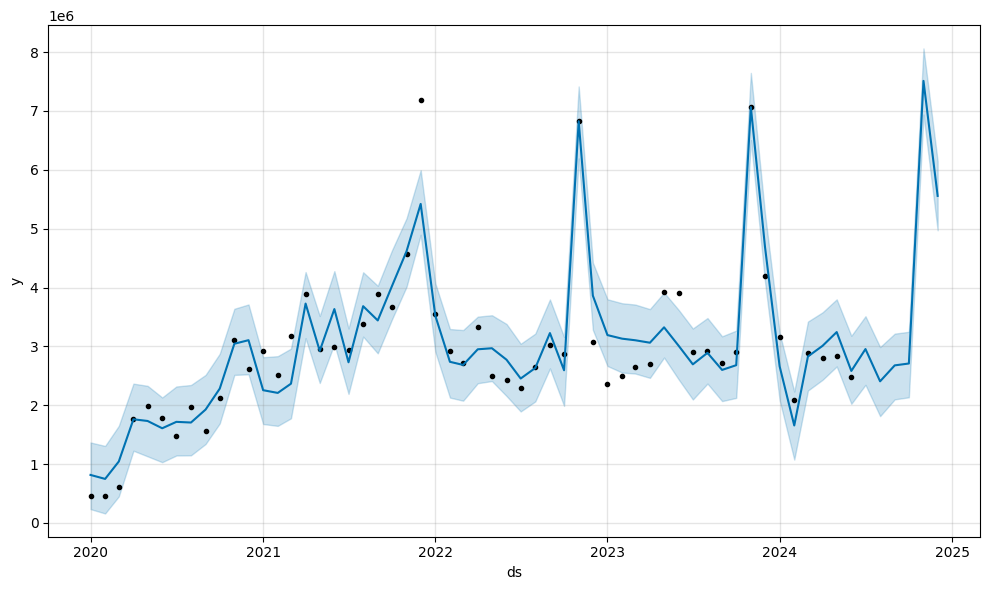

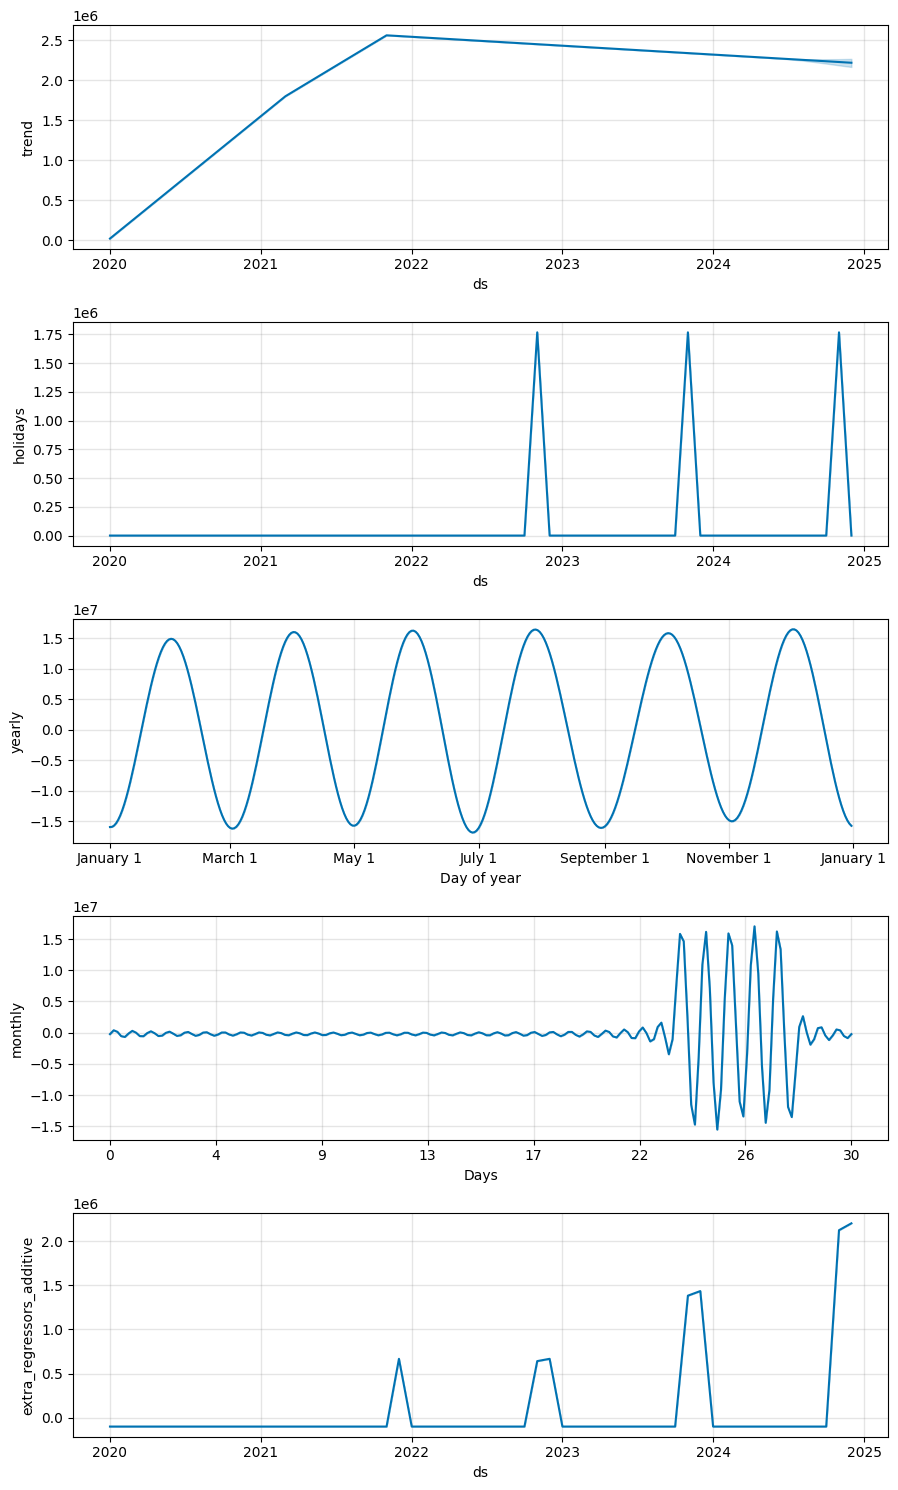

In [129]:
model4.plot(forecast)
model4.plot_components(forecast)
print(forecast)

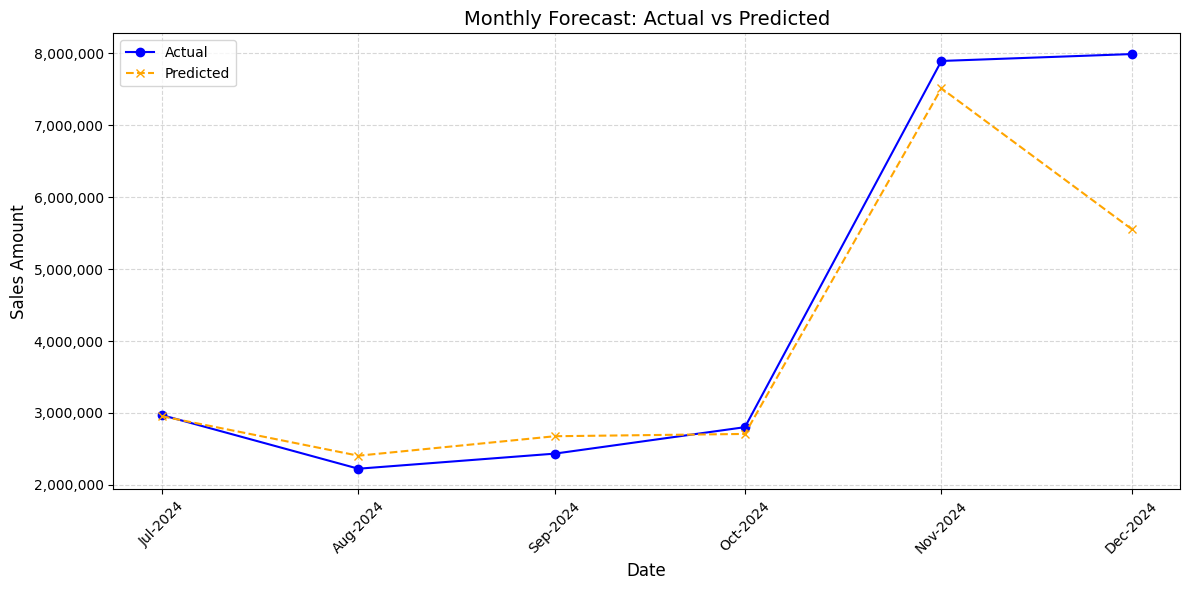

In [130]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Plotting actual vs predicted forecast
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(comparison_test['ds'], comparison_test['y'], label='Actual', color='blue', marker='o')

# Plot predicted values
plt.plot(comparison_test['ds'], comparison_test['Predicted'], label='Predicted', color='orange', linestyle='--', marker='x')

# Formatting x-axis with monthly date ticks
plt.title("Monthly Forecast: Actual vs Predicted", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)
plt.xticks(comparison_test['ds'], comparison_test['ds'].dt.strftime('%b-%Y'), rotation=45)

# Formatting y-axis to include commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adding grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Plotting daily data on a monthly graph

<ipython-input-131-fde9e5cf99f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales['TRANSACTION_DATE'] = pd.to_datetime(daily_sales['TRANSACTION_DATE'])
<ipython-input-131-fde9e5cf99f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales['YearMonth'] = daily_sales['TRANSACTION_DATE'].dt.to_period('M')


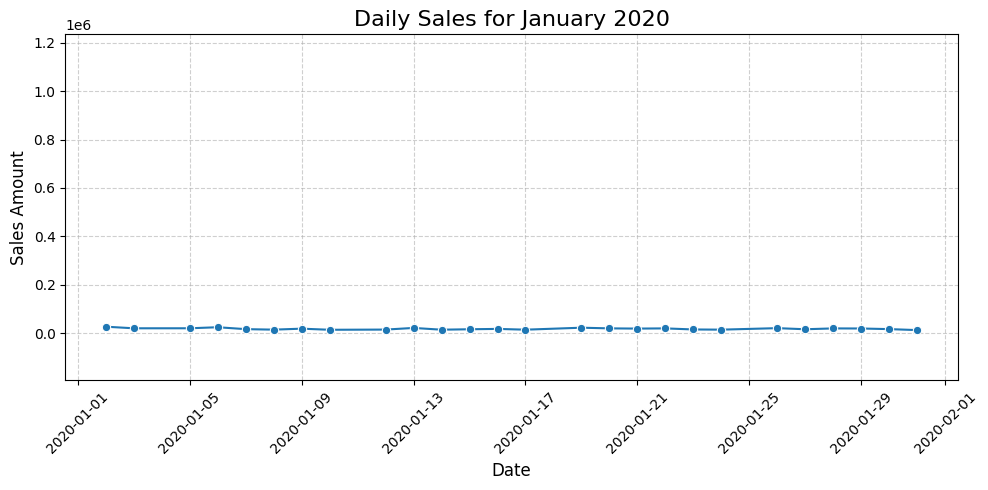

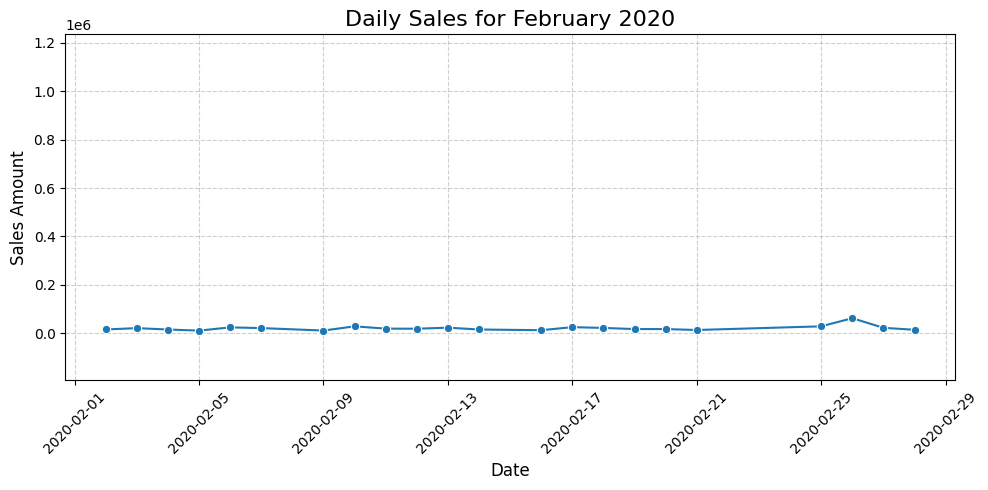

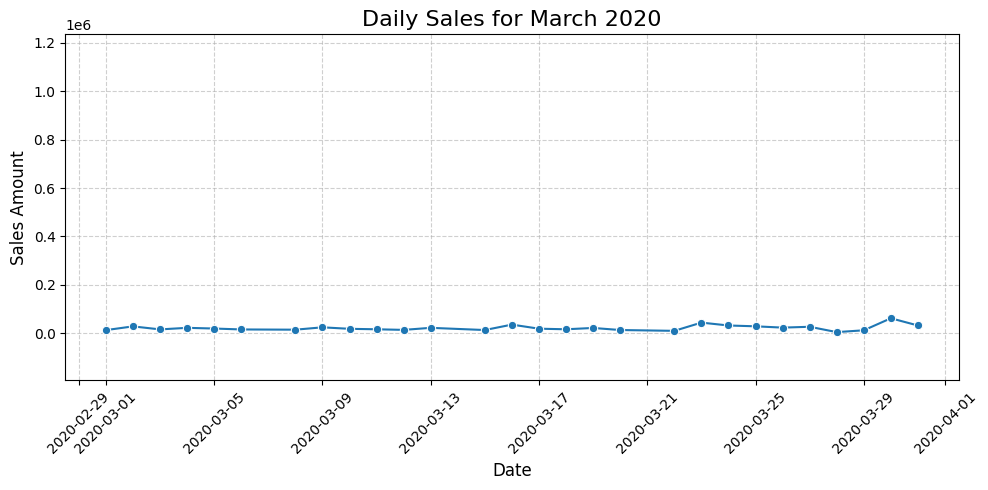

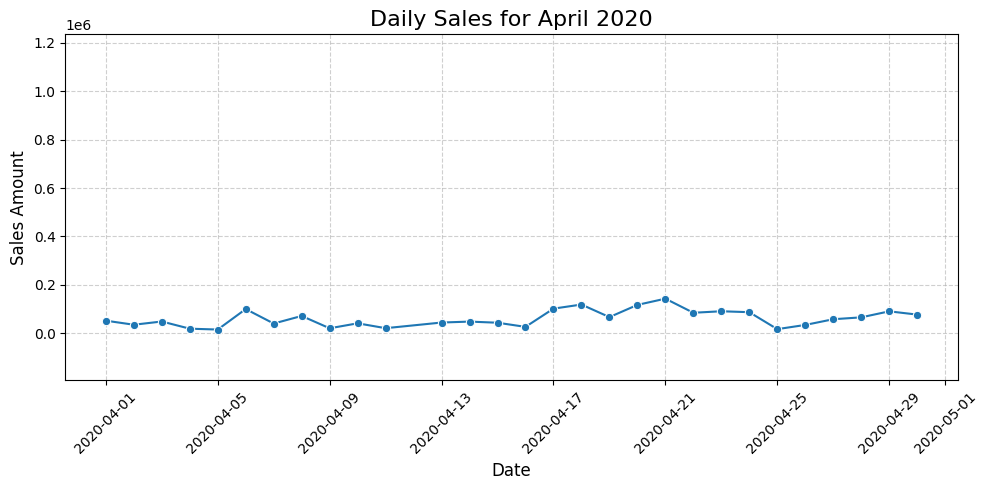

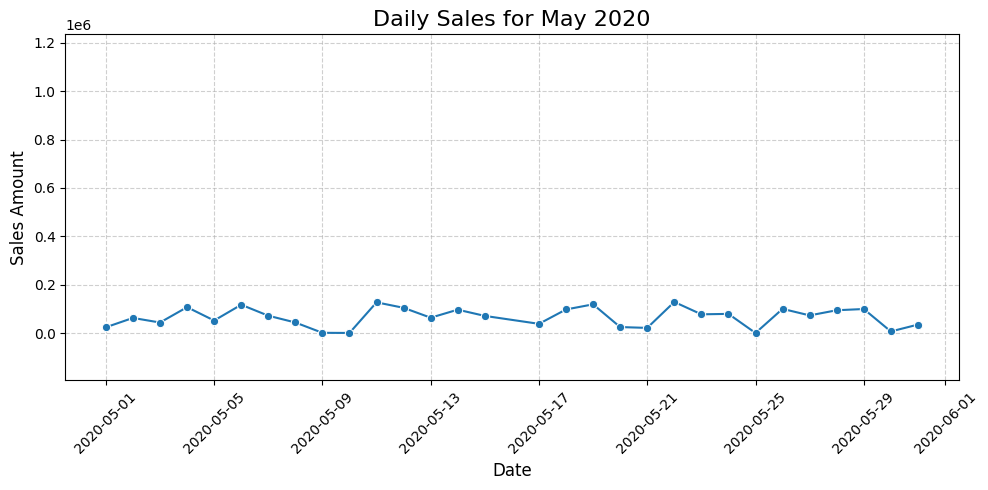

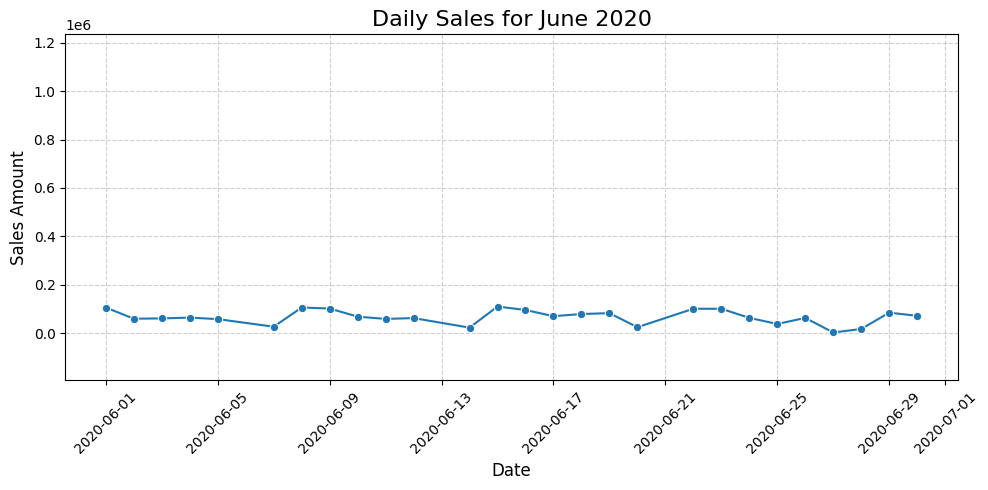

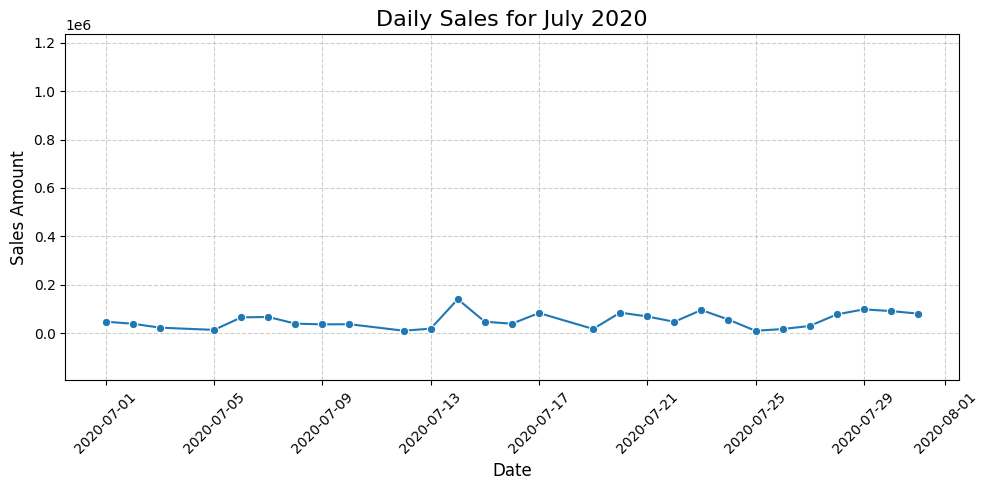

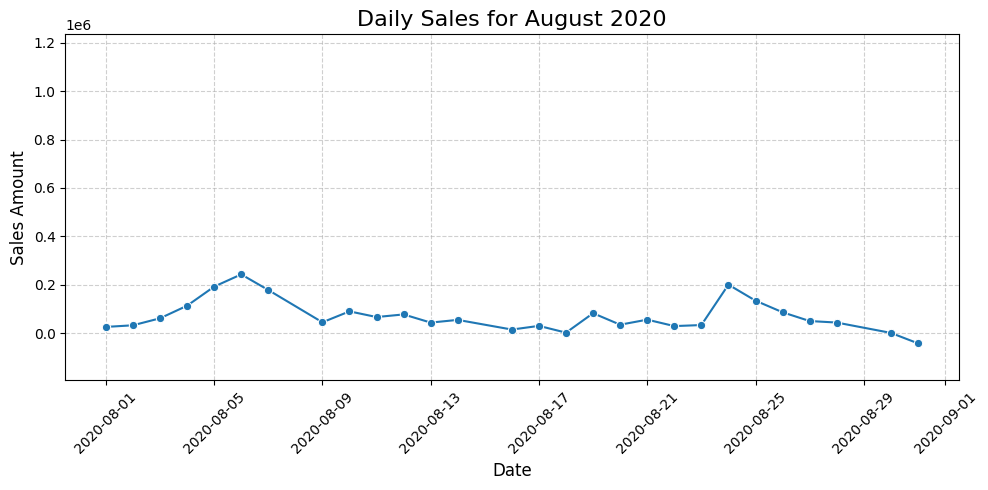

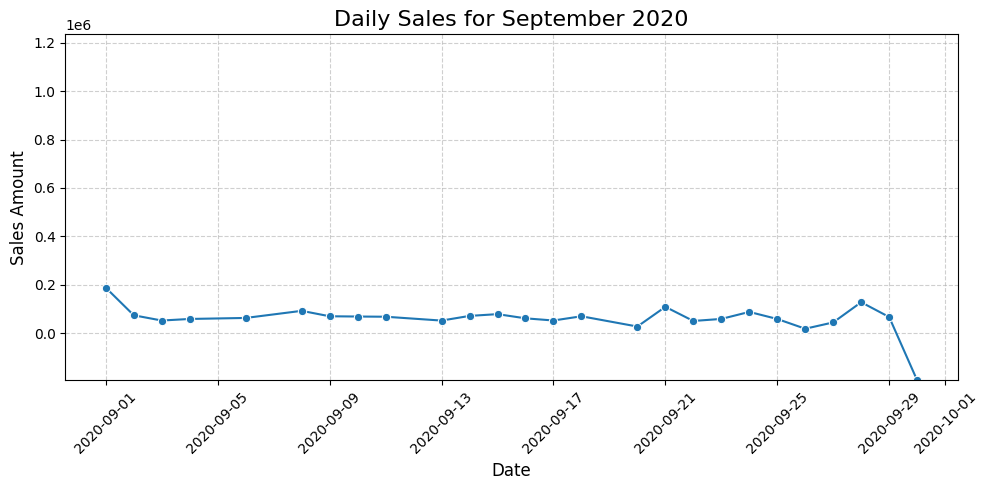

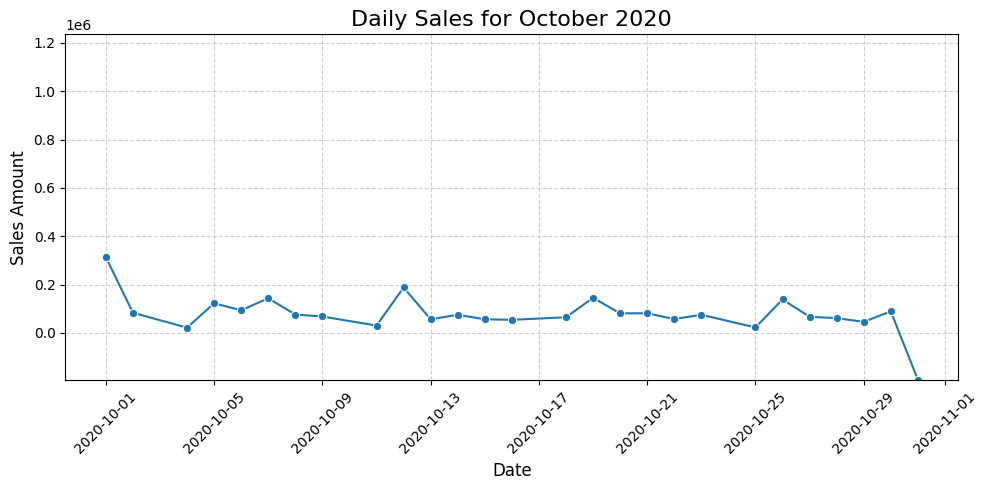

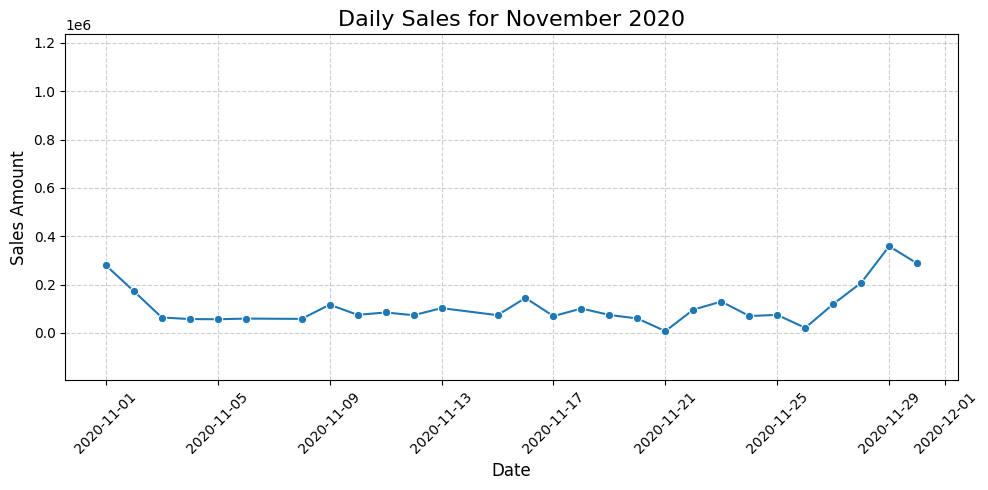

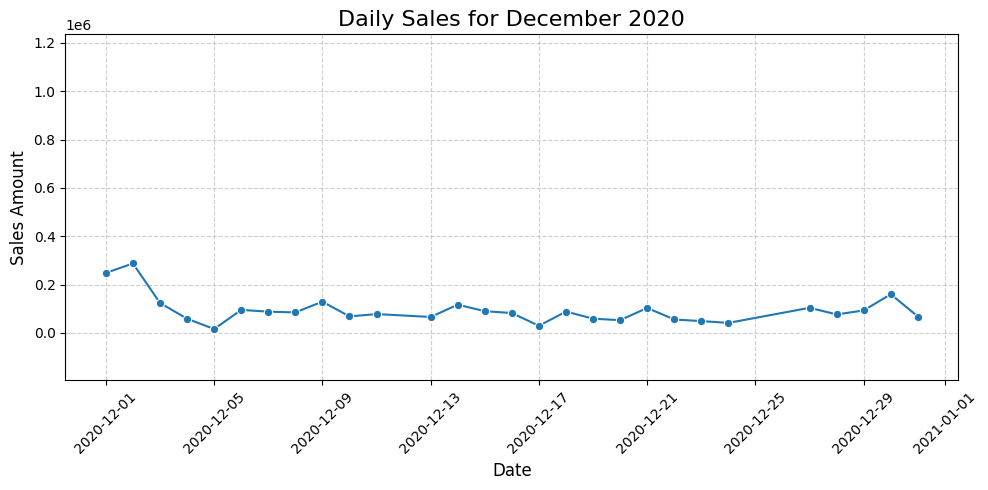

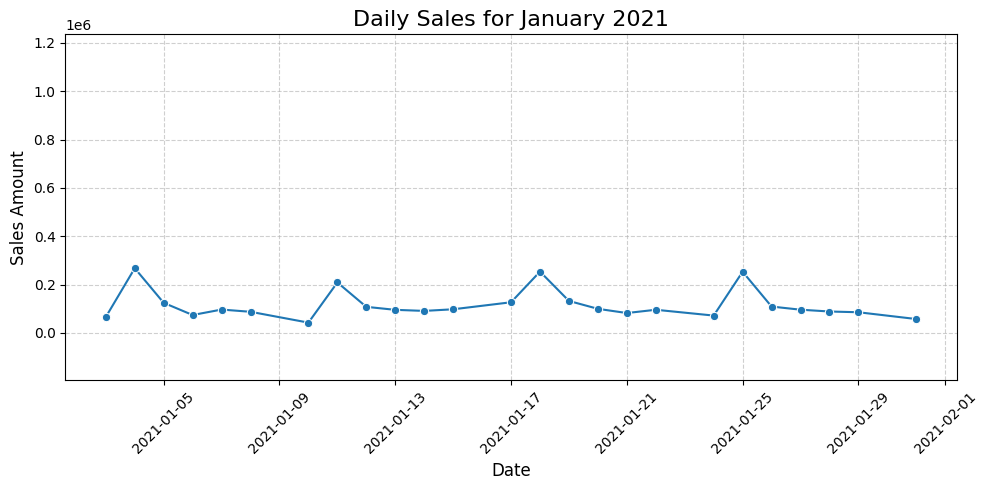

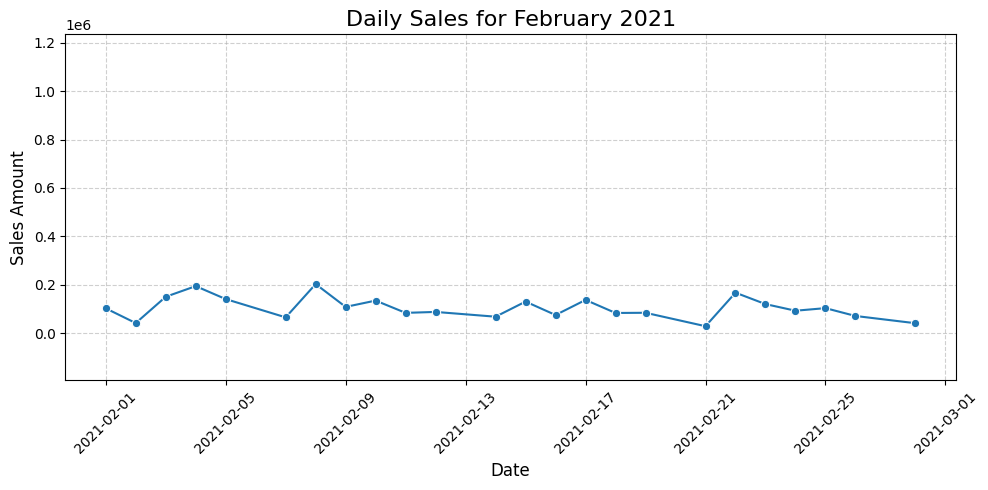

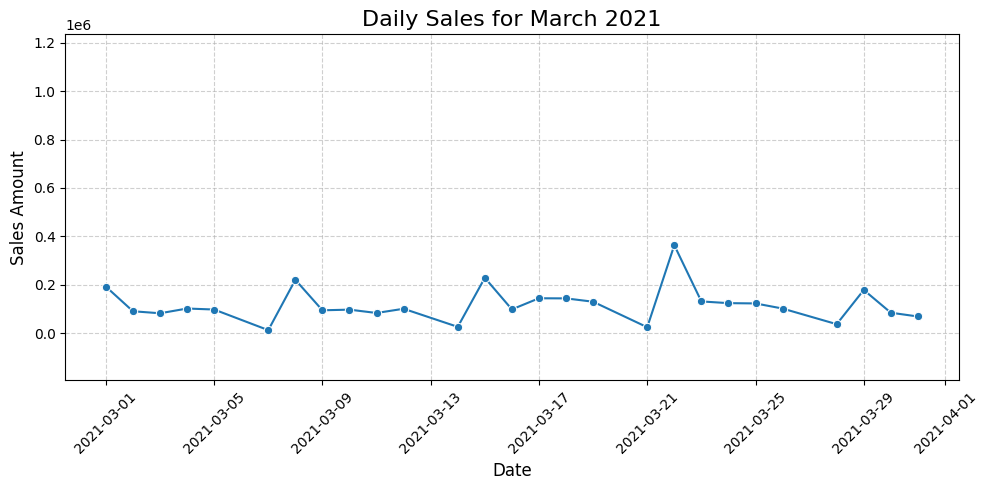

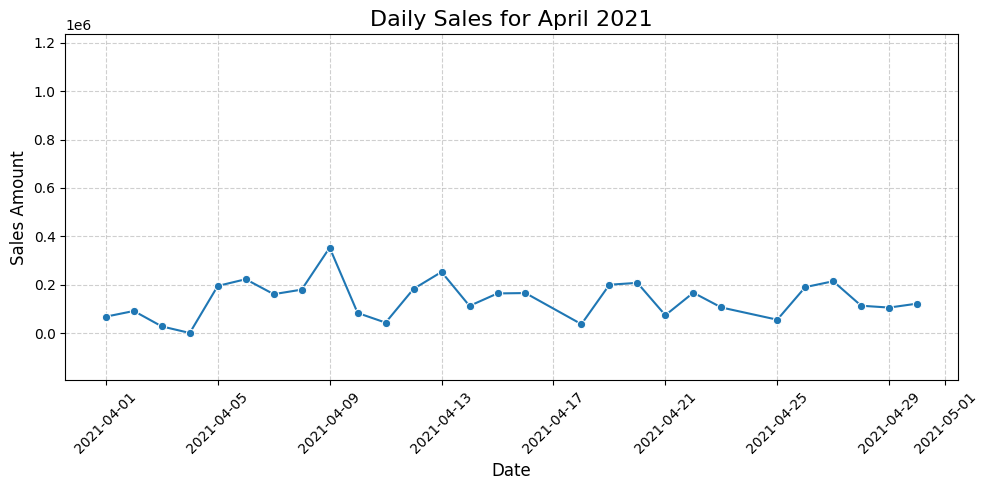

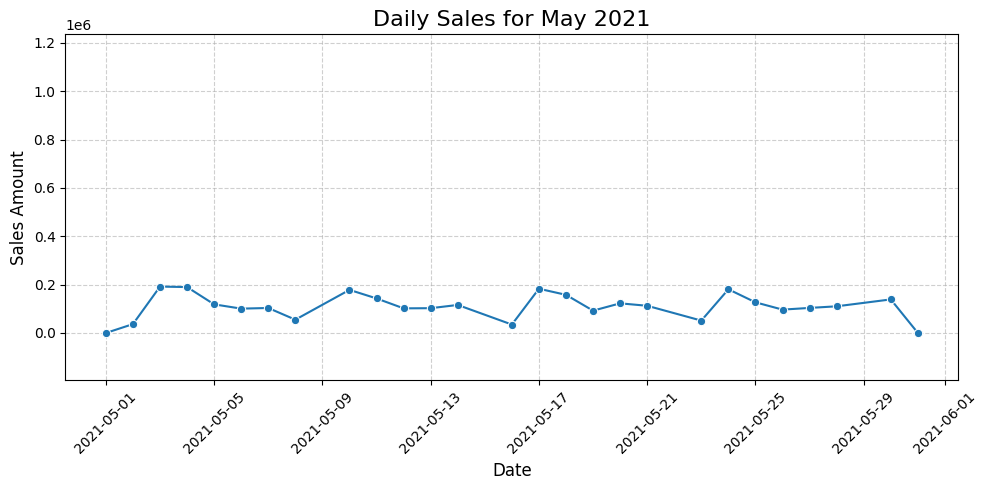

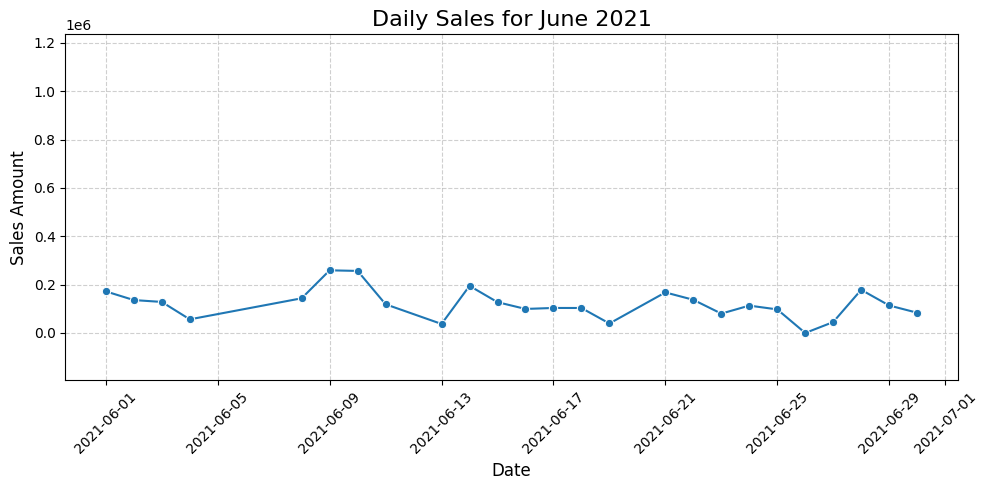

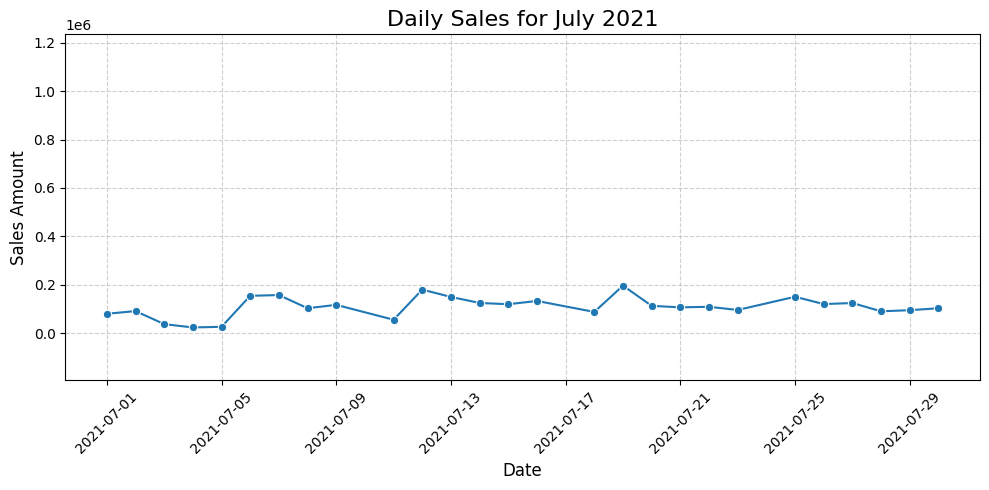

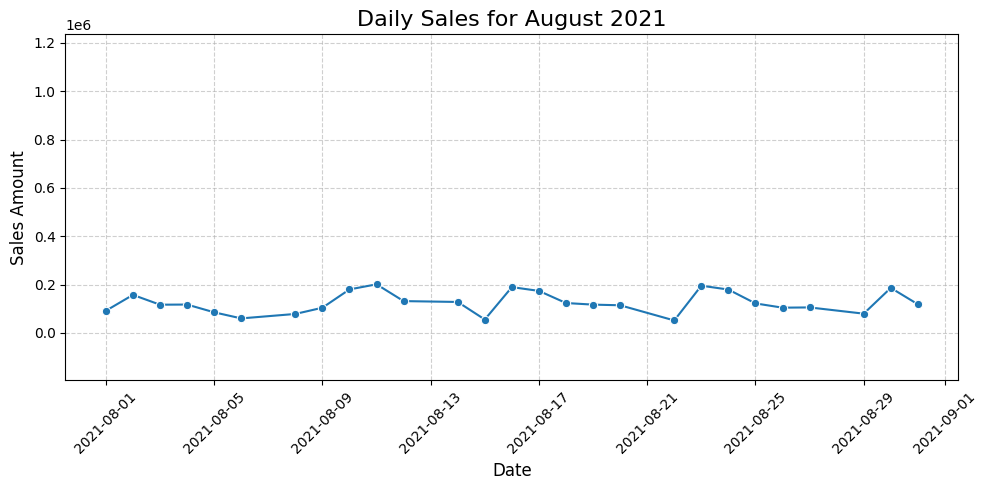

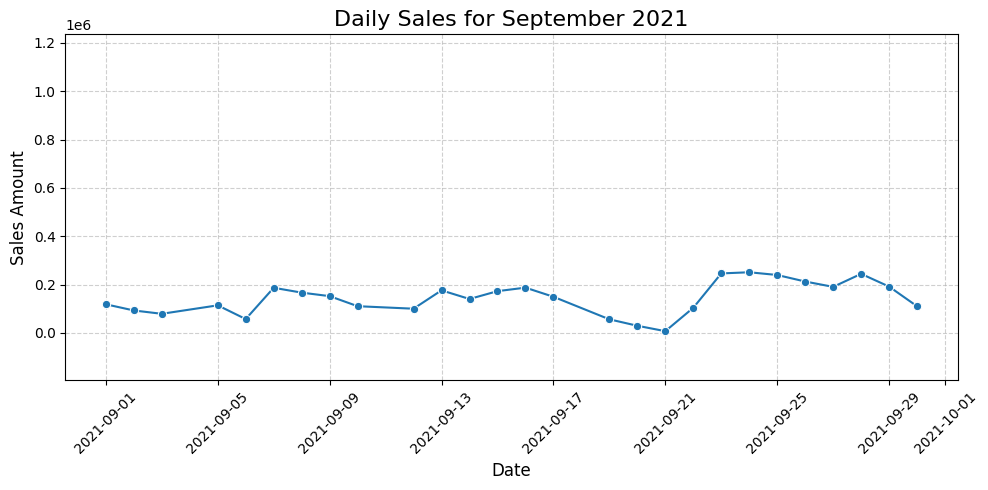

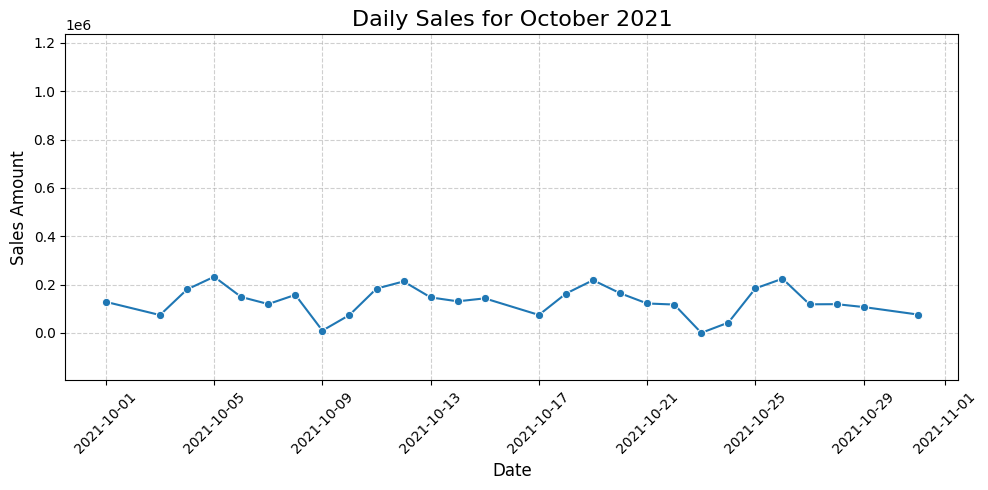

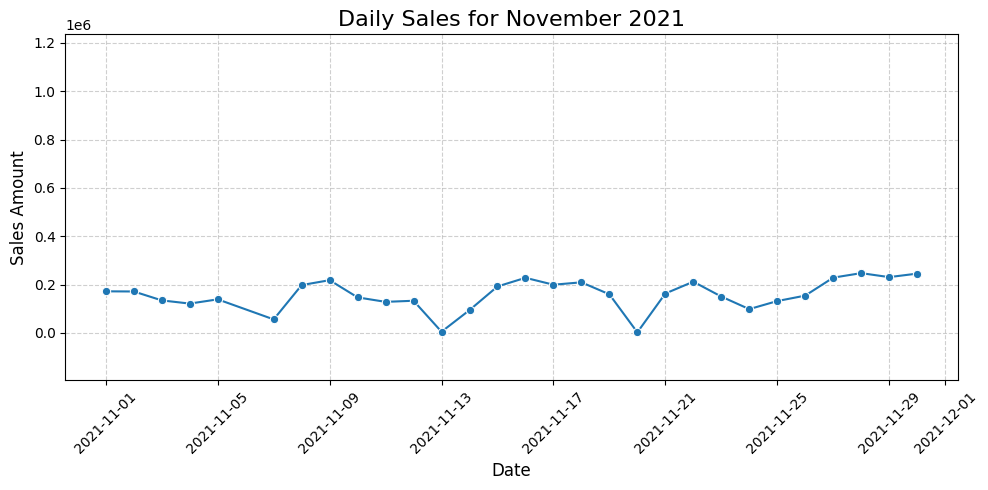

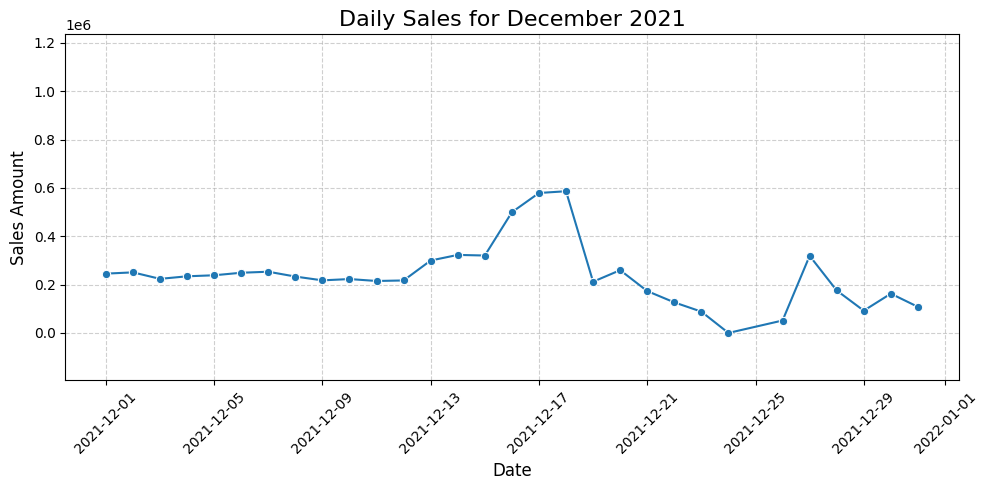

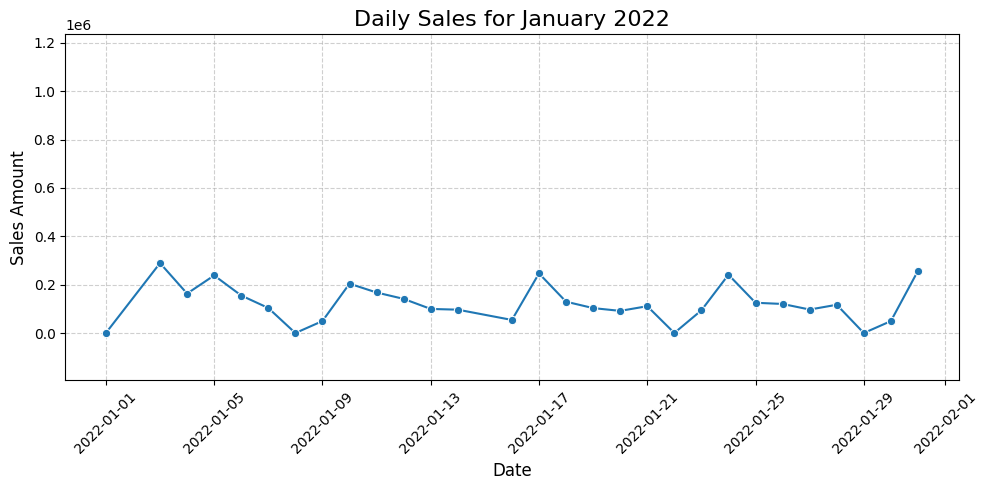

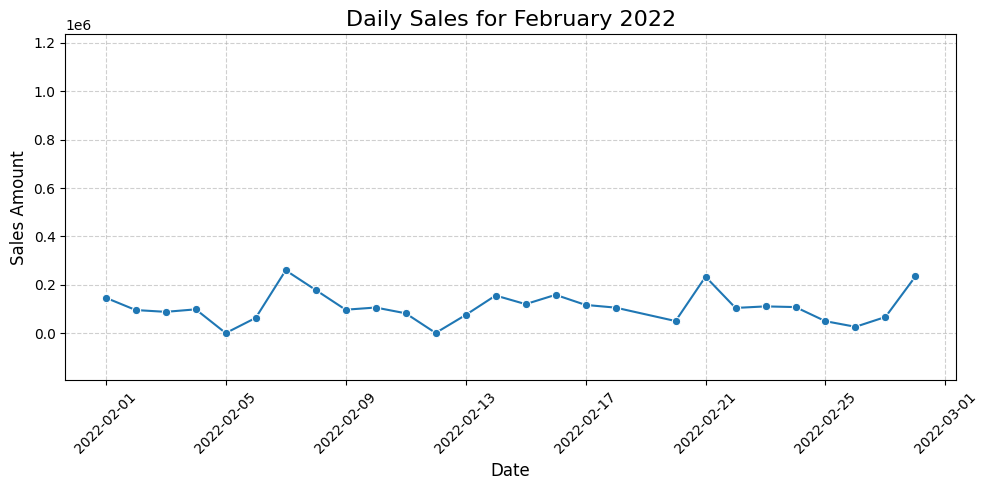

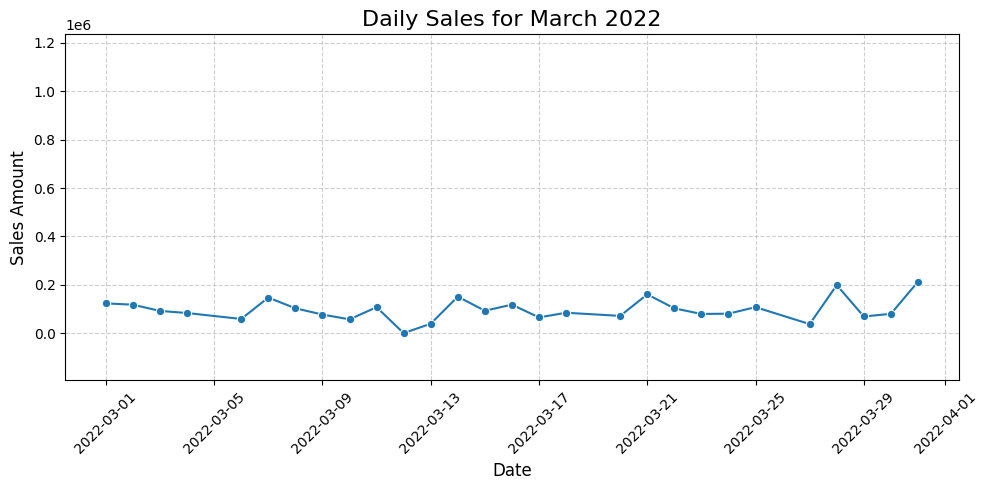

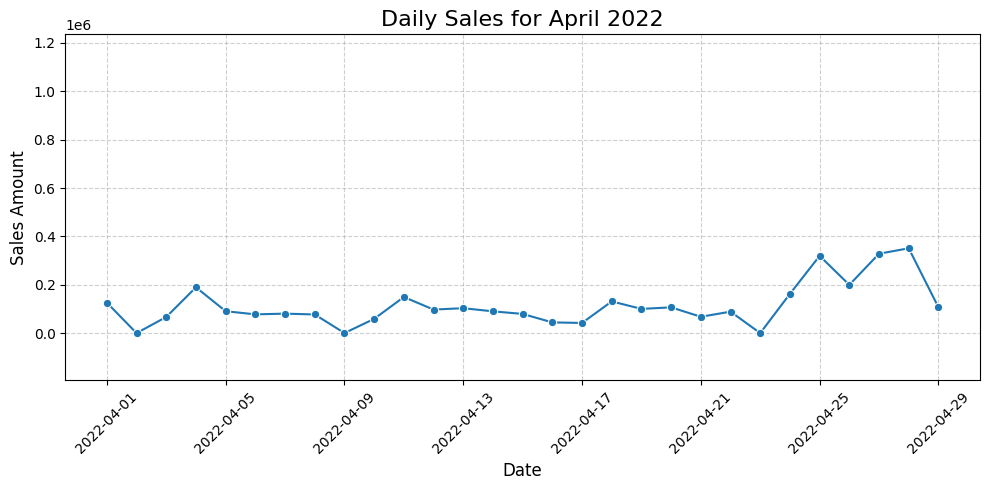

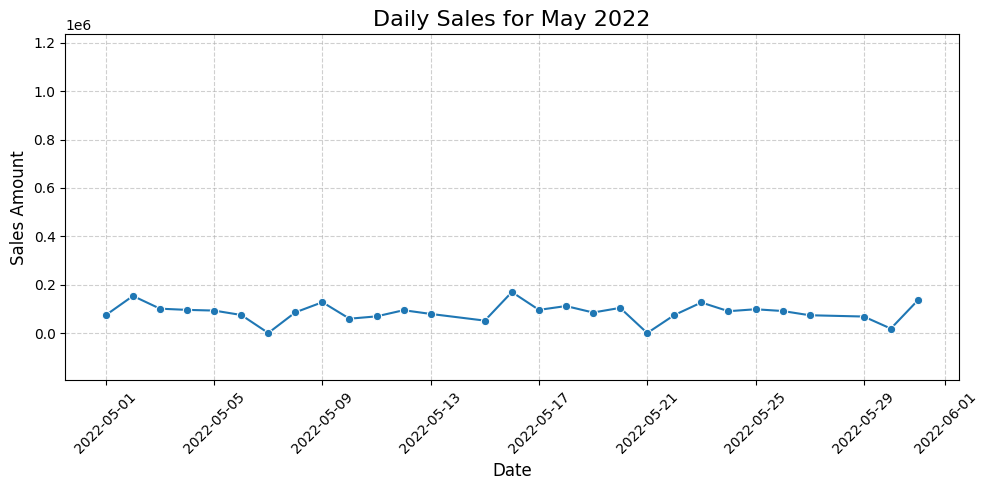

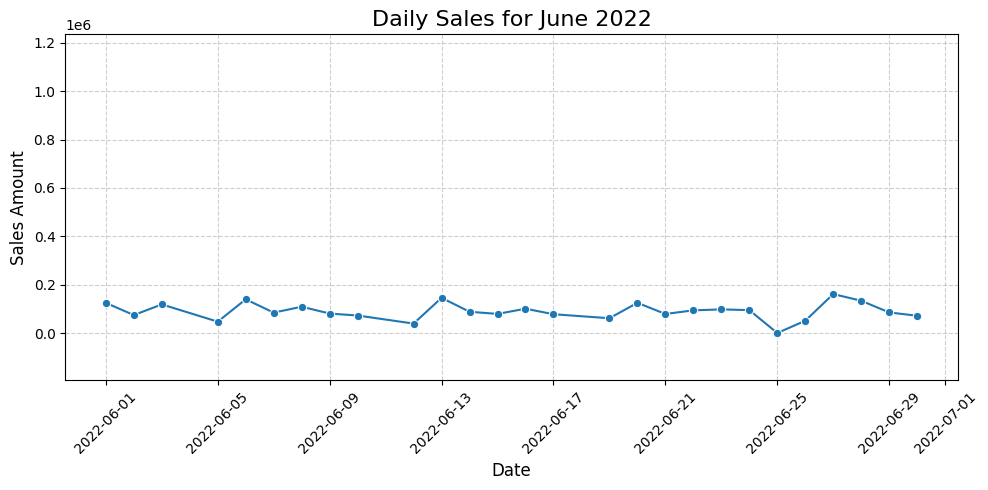

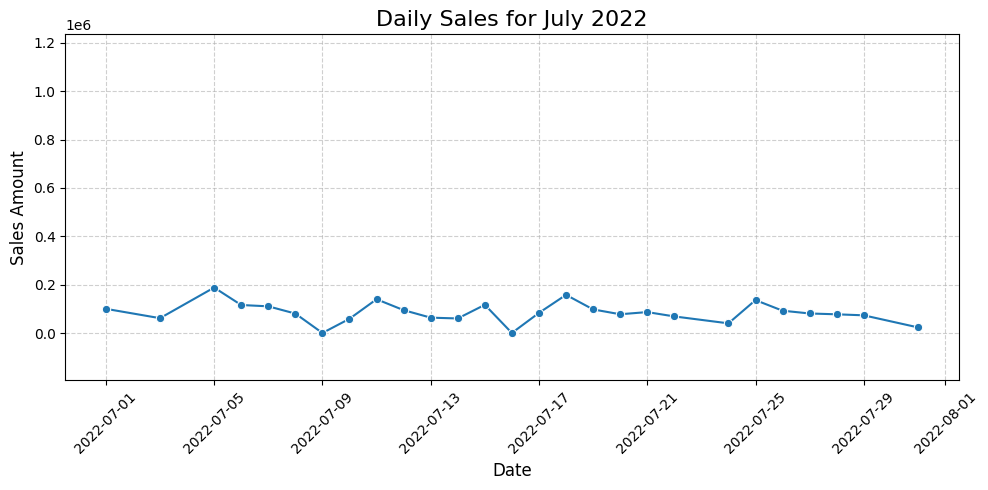

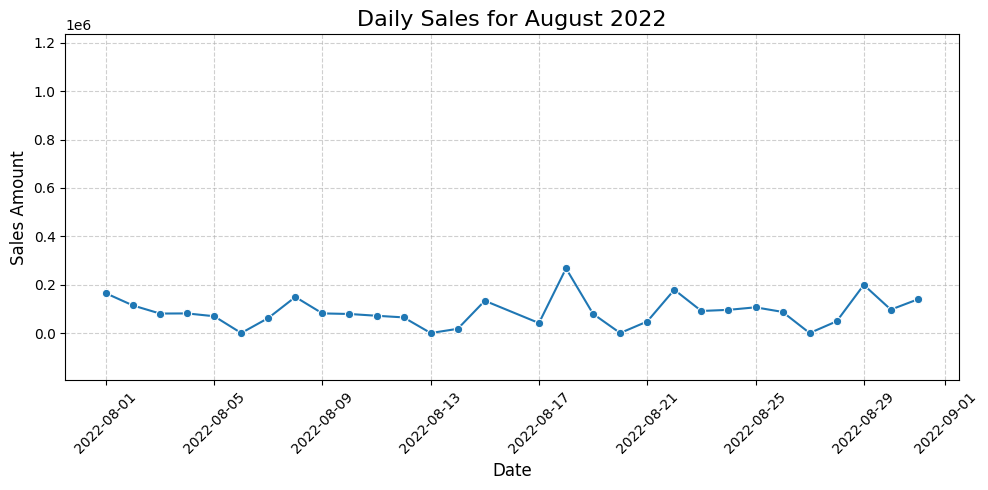

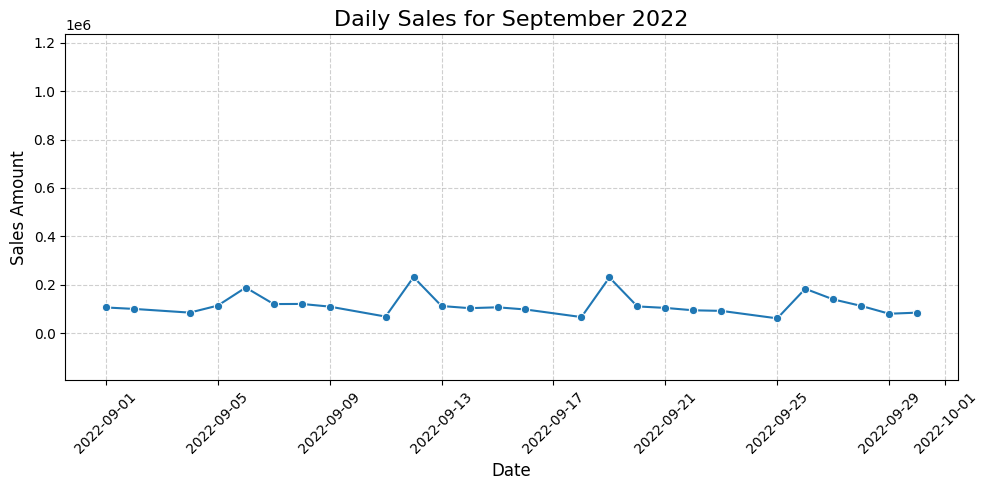

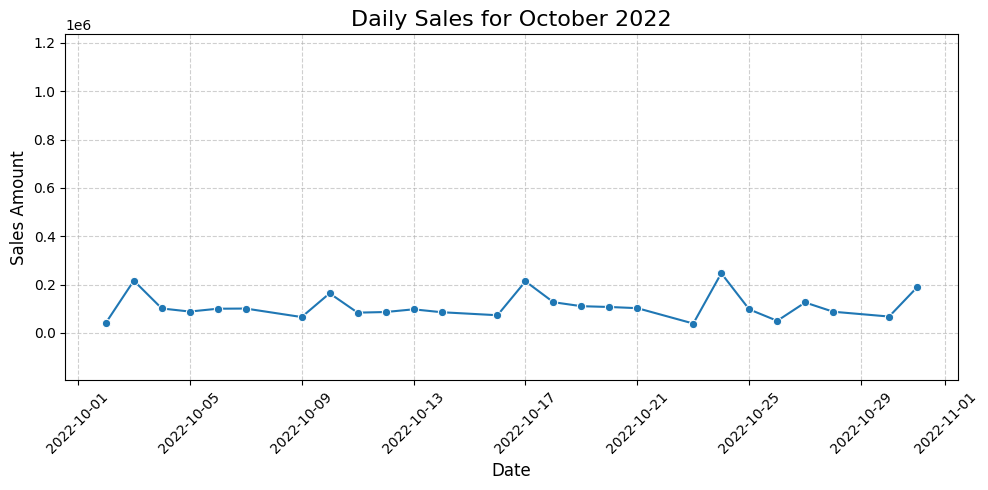

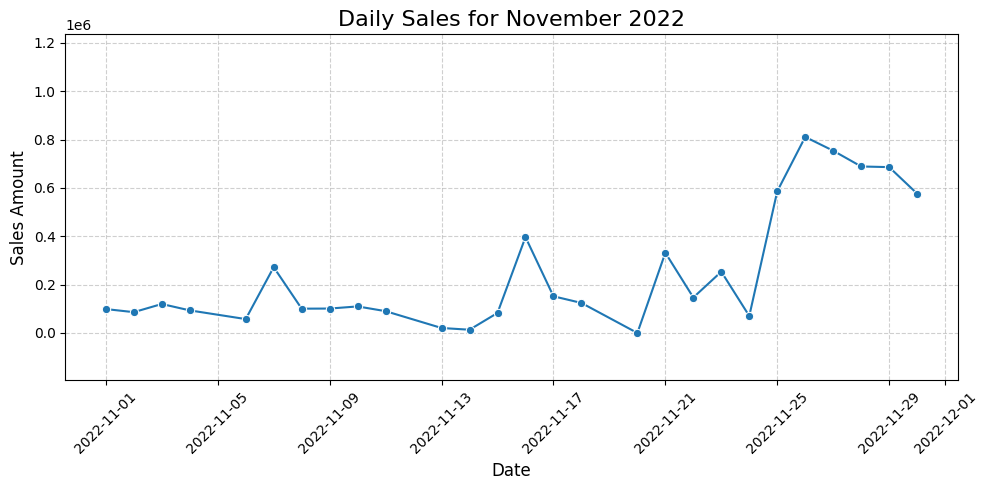

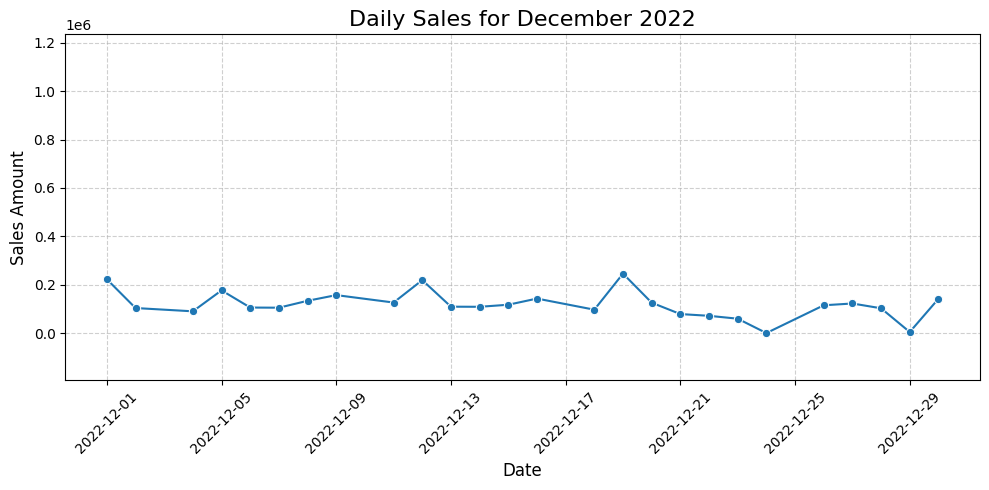

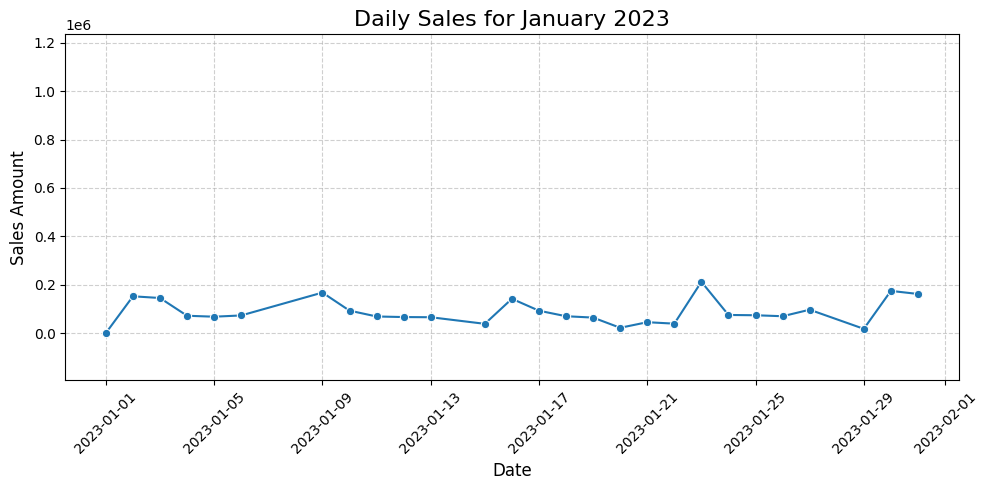

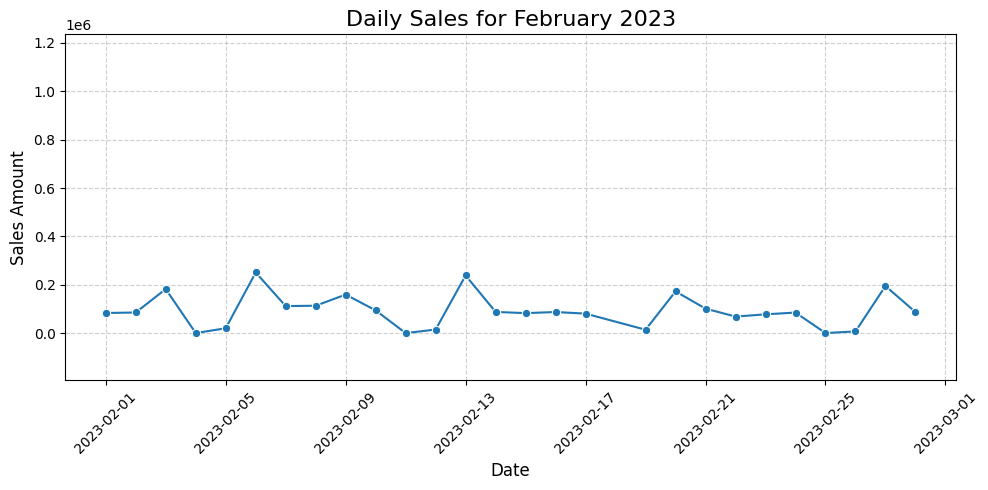

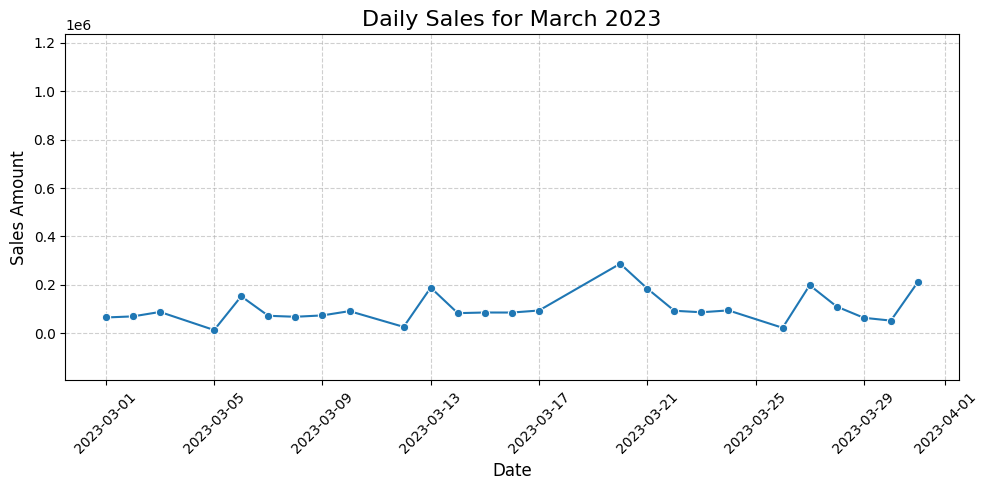

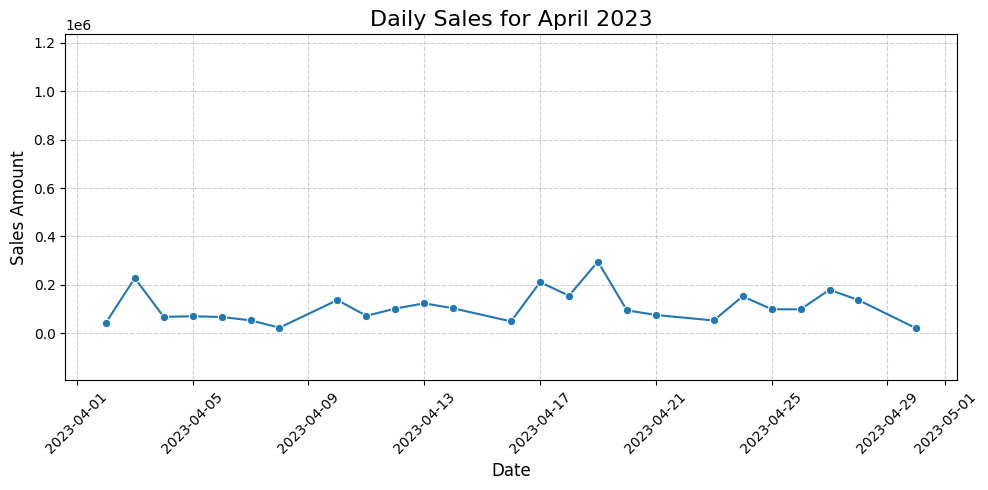

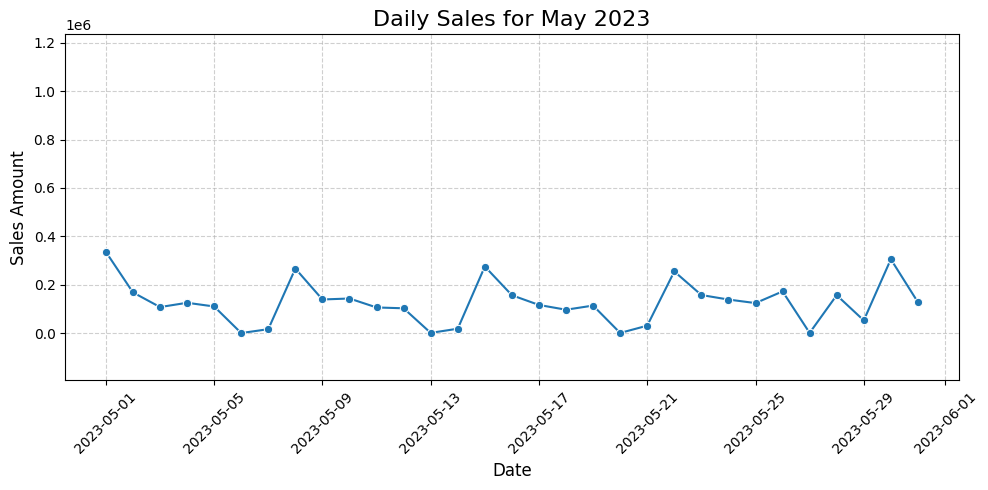

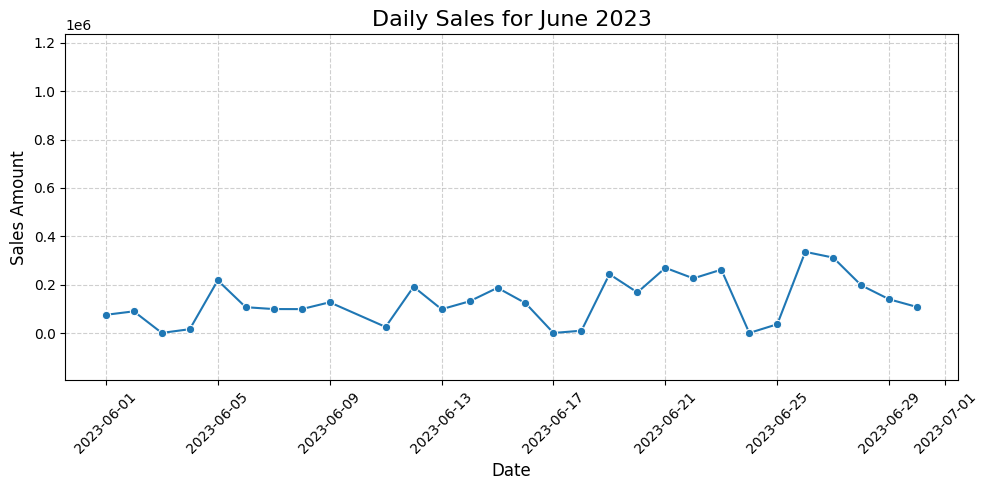

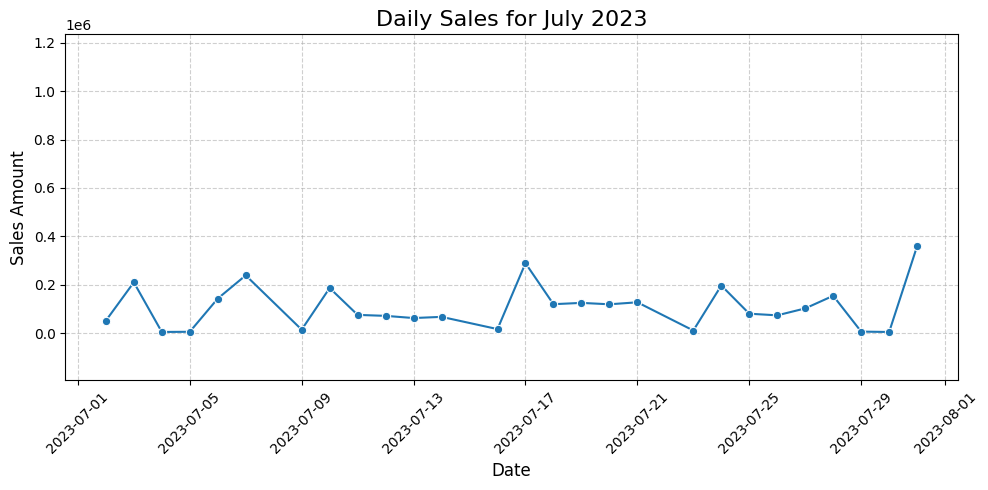

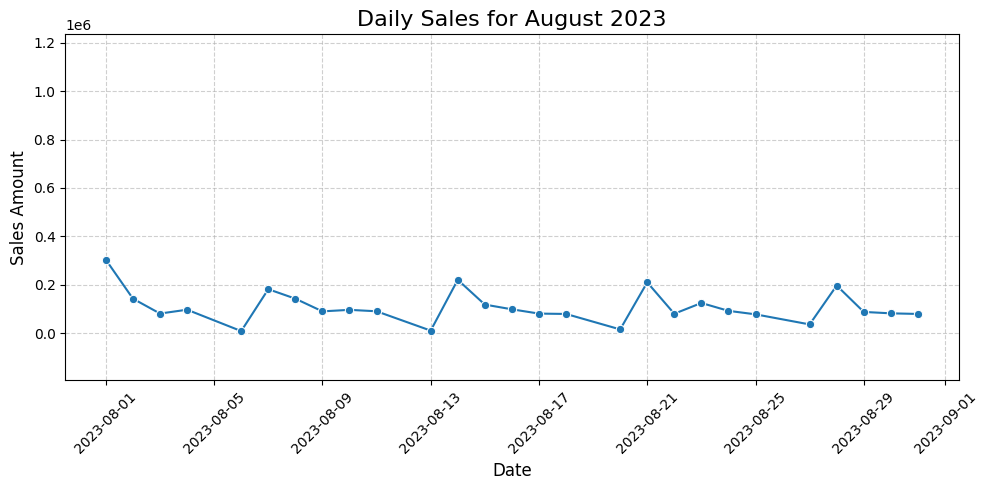

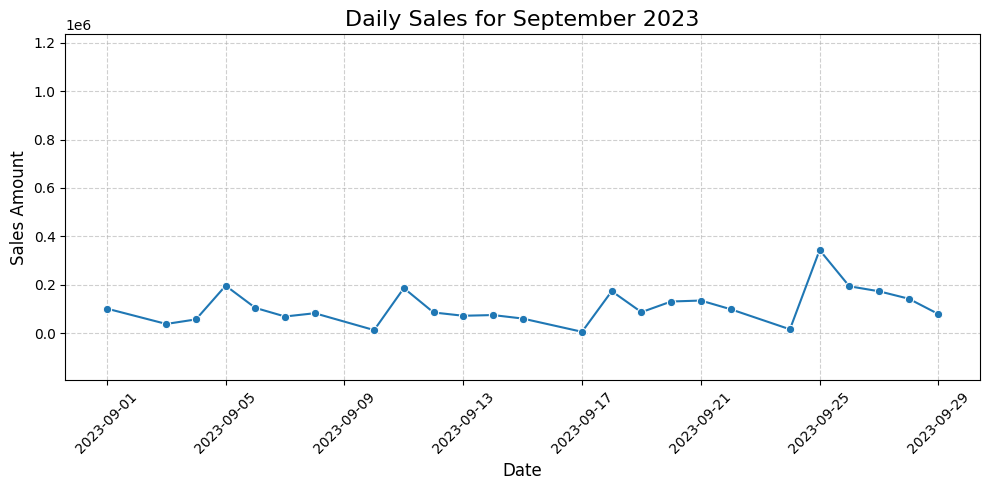

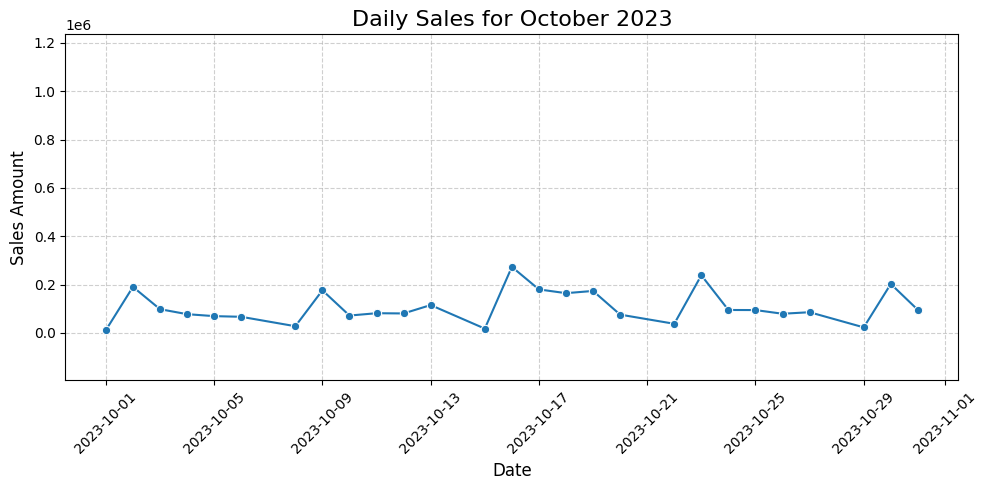

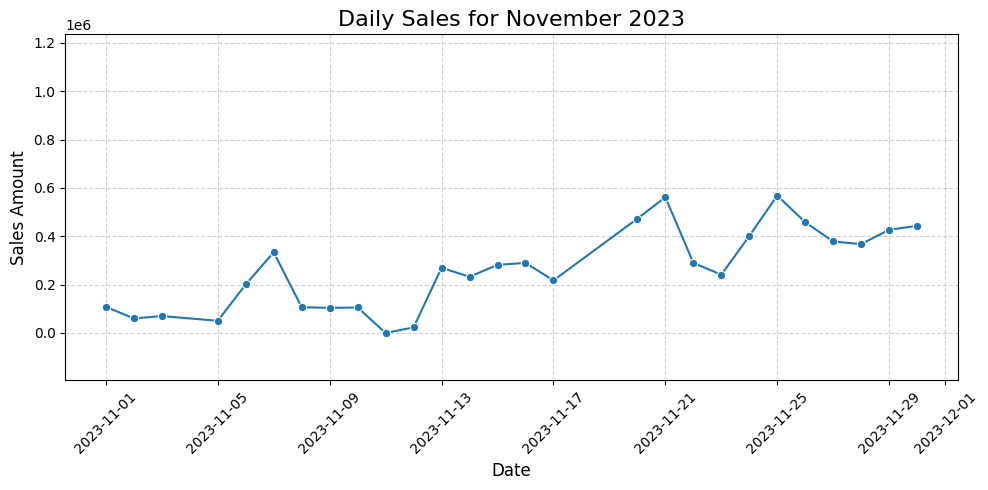

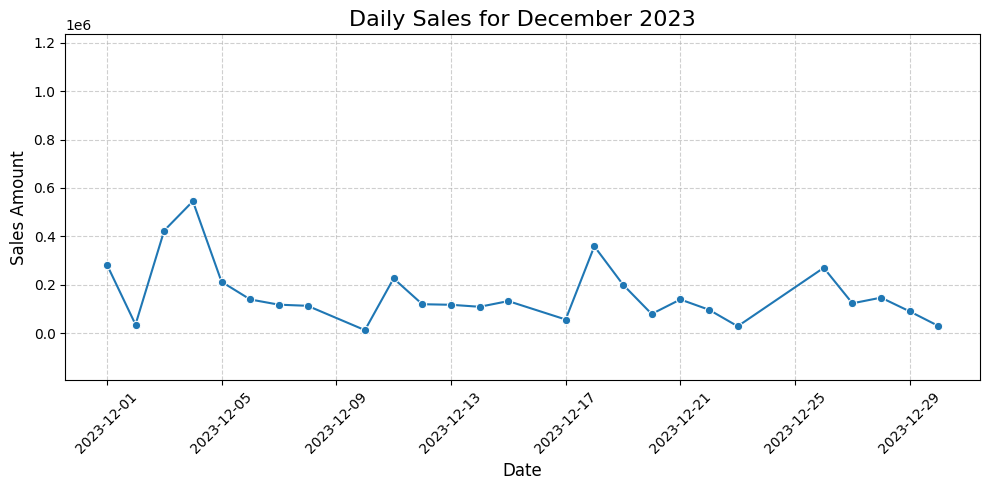

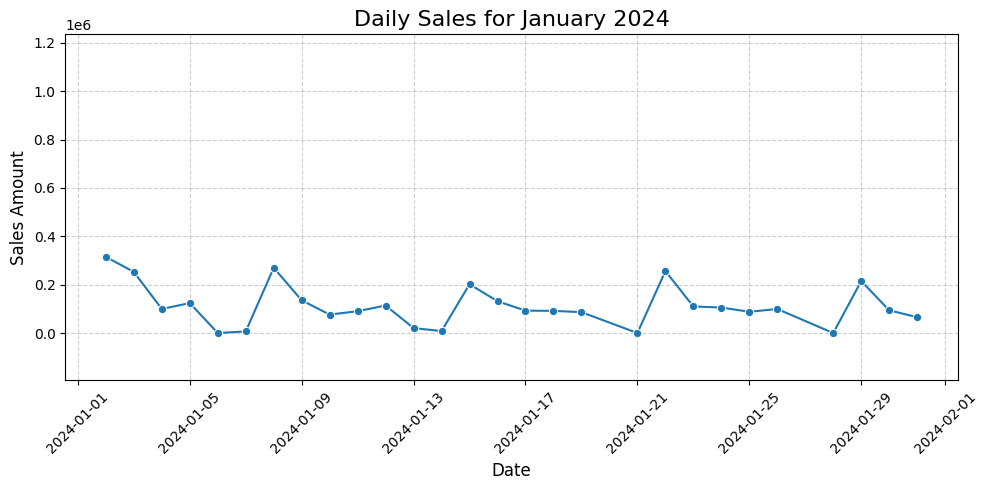

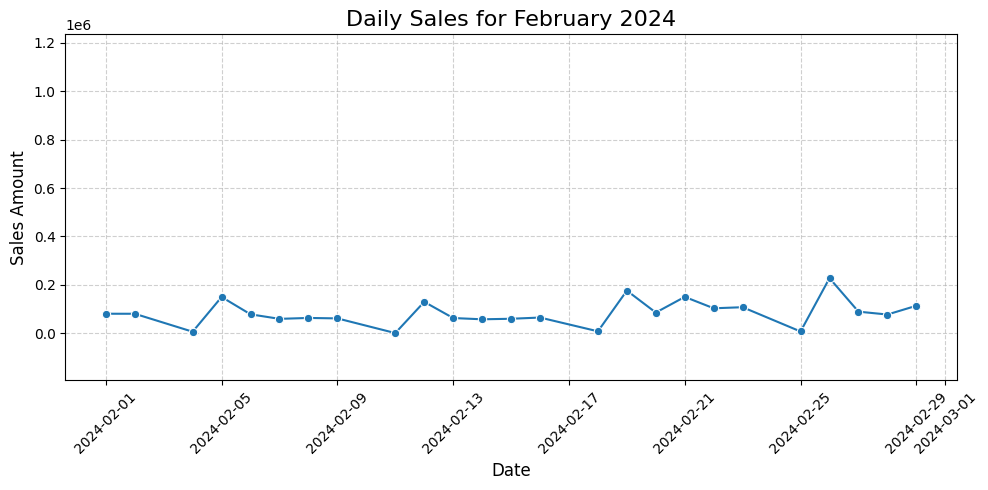

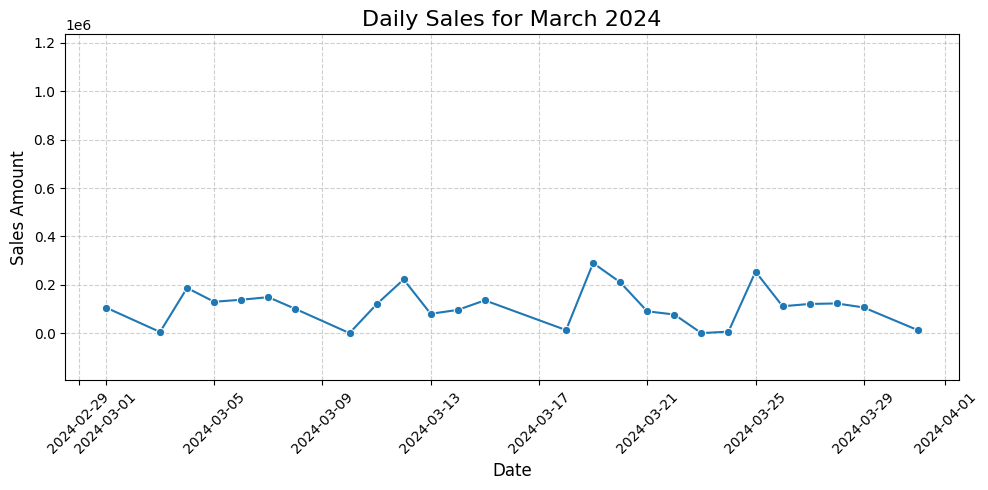

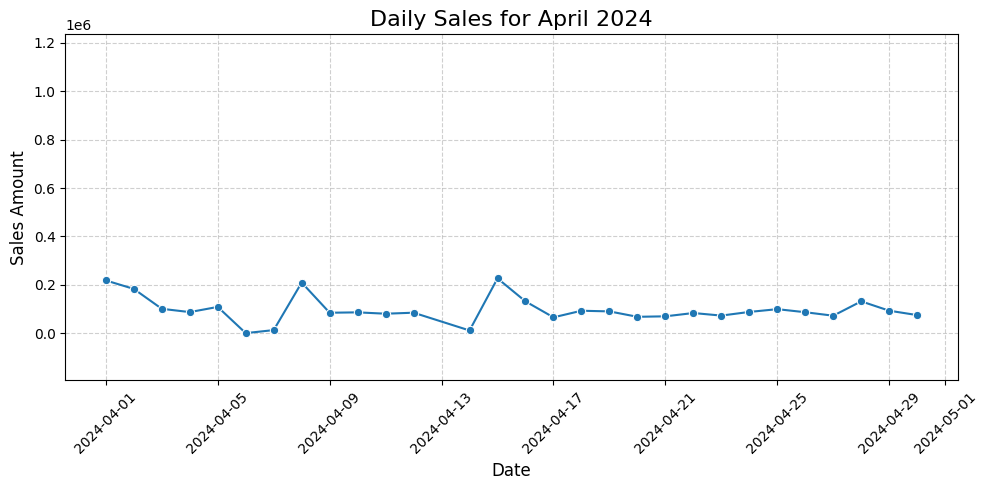

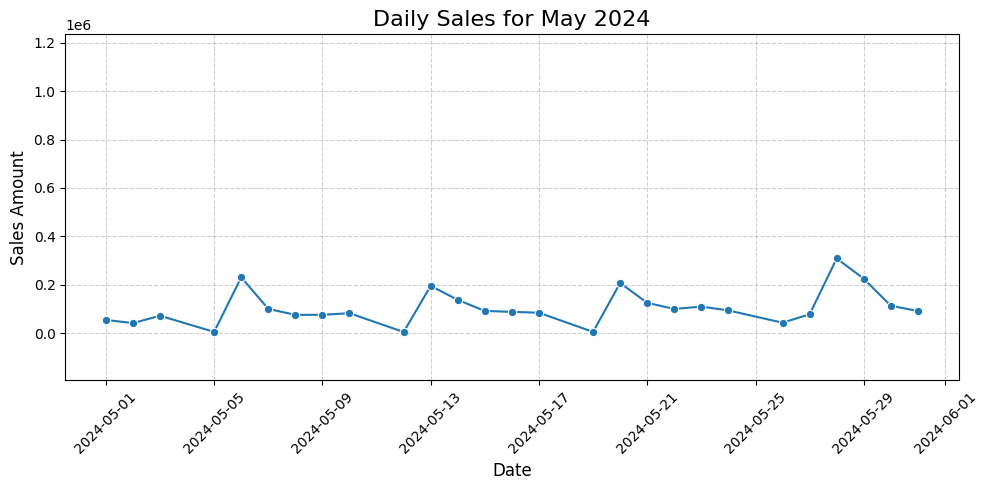

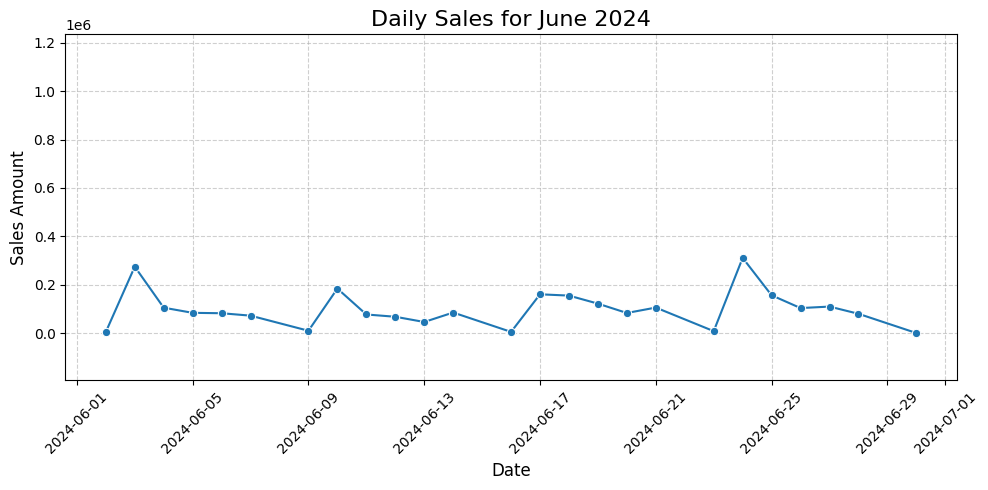

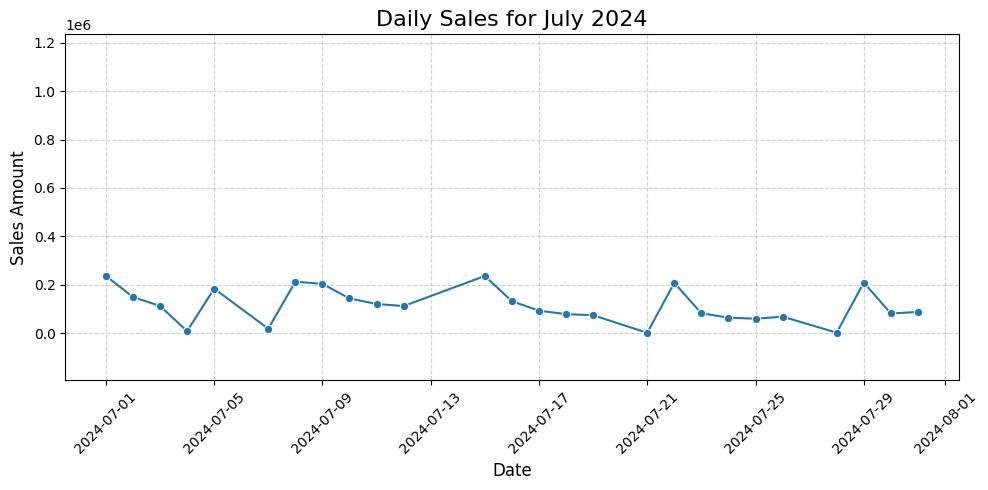

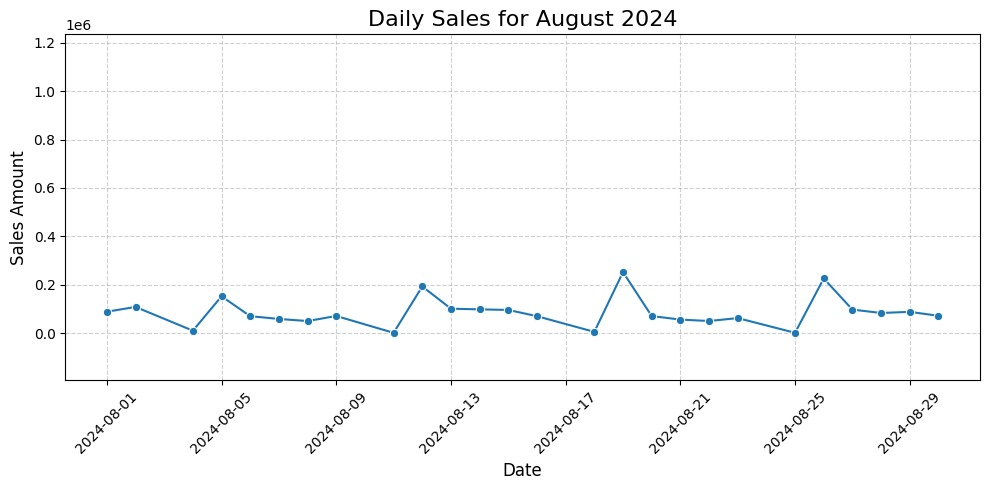

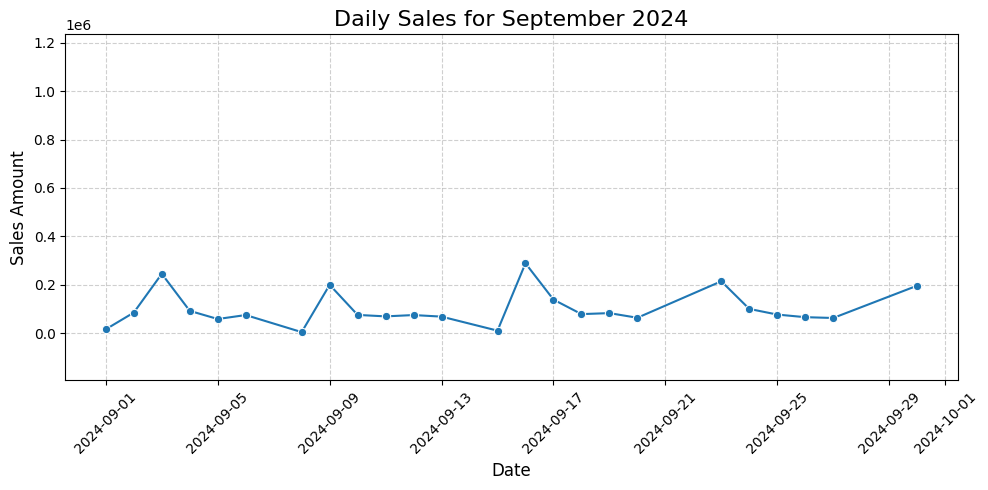

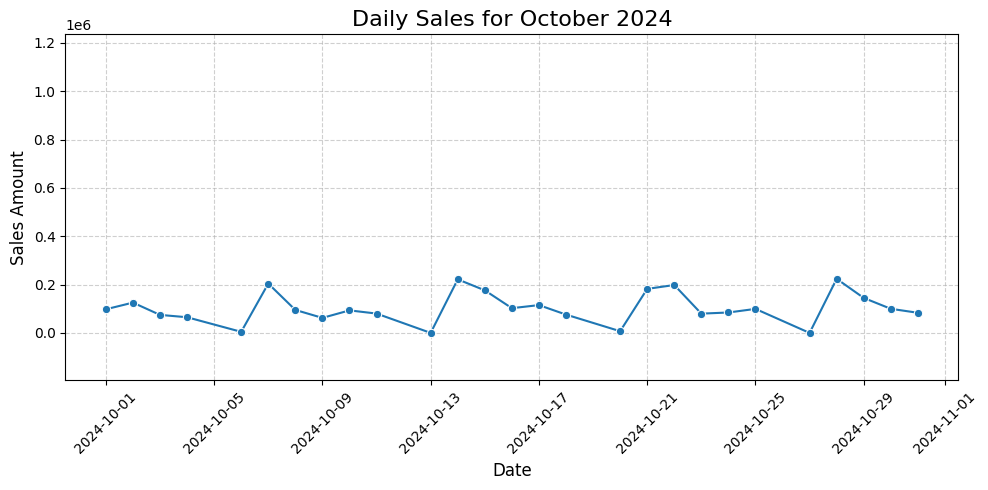

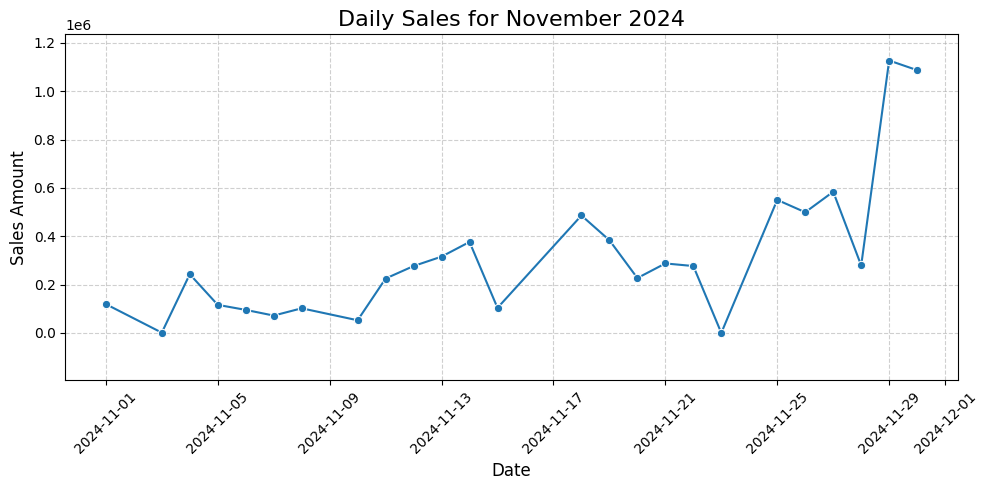

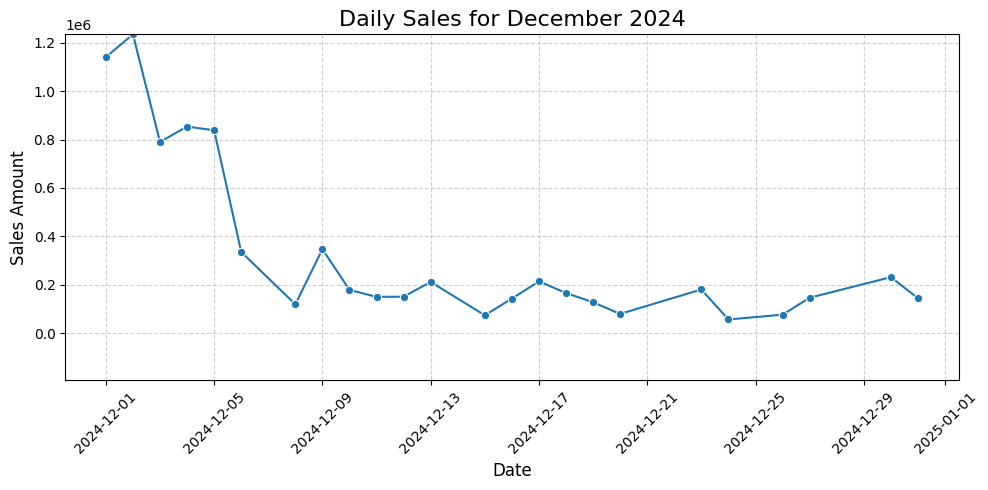

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'TRANSACTION_DATE' is in datetime format
daily_sales['TRANSACTION_DATE'] = pd.to_datetime(daily_sales['TRANSACTION_DATE'])

# Extract year and month for grouping
daily_sales['YearMonth'] = daily_sales['TRANSACTION_DATE'].dt.to_period('M')

# Calculate the global min and max for consistent y-axis
y_min = daily_sales['AMOUNT'].min()
y_max = daily_sales['AMOUNT'].max()

# Group data by Year-Month
months = daily_sales['YearMonth'].unique()

# Plot for each month with consistent y-axis
for month in months:
    monthly_sales = daily_sales[daily_sales['YearMonth'] == month]

    # Plot daily sales for the current month
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=monthly_sales, x='TRANSACTION_DATE', y='AMOUNT', marker='o')
    plt.title(f'Daily Sales for {month.strftime("%B %Y")}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales Amount', fontsize=12)
    plt.xticks(rotation=45)
    plt.ylim(y_min, y_max)  # Set consistent y-axis scale
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



# plotting  Thanksgiving | Black Friday | Saturday | Sunday | Cyber Monday  for each years

| Year | Thanksgiving | Black Friday | Saturday | Sunday | Cyber Monday |
|------|--------------|--------------|----------|--------|--------------|
| 2020 | Nov 26       | Nov 27       | Nov 28   | Nov 29 | Nov 30       |
| 2021 | Nov 25       | Nov 26       | Nov 27   | Nov 28 | Nov 29       |
| 2022 | Nov 24       | Nov 25       | Nov 26   | Nov 27 | Nov 28       |
| 2023 | Nov 23       | Nov 24       | Nov 25   | Nov 26 | Nov 27       |
| 2024 | Nov 28       | Nov 29       | Nov 30   | Dec 1  | Dec 2        |


<ipython-input-95-6e13751062aa>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales['TRANSACTION_DATE'] = pd.to_datetime(daily_sales['TRANSACTION_DATE'])
<ipython-input-95-6e13751062aa>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales['Year'] = daily_sales['TRANSACTION_DATE'].dt.year


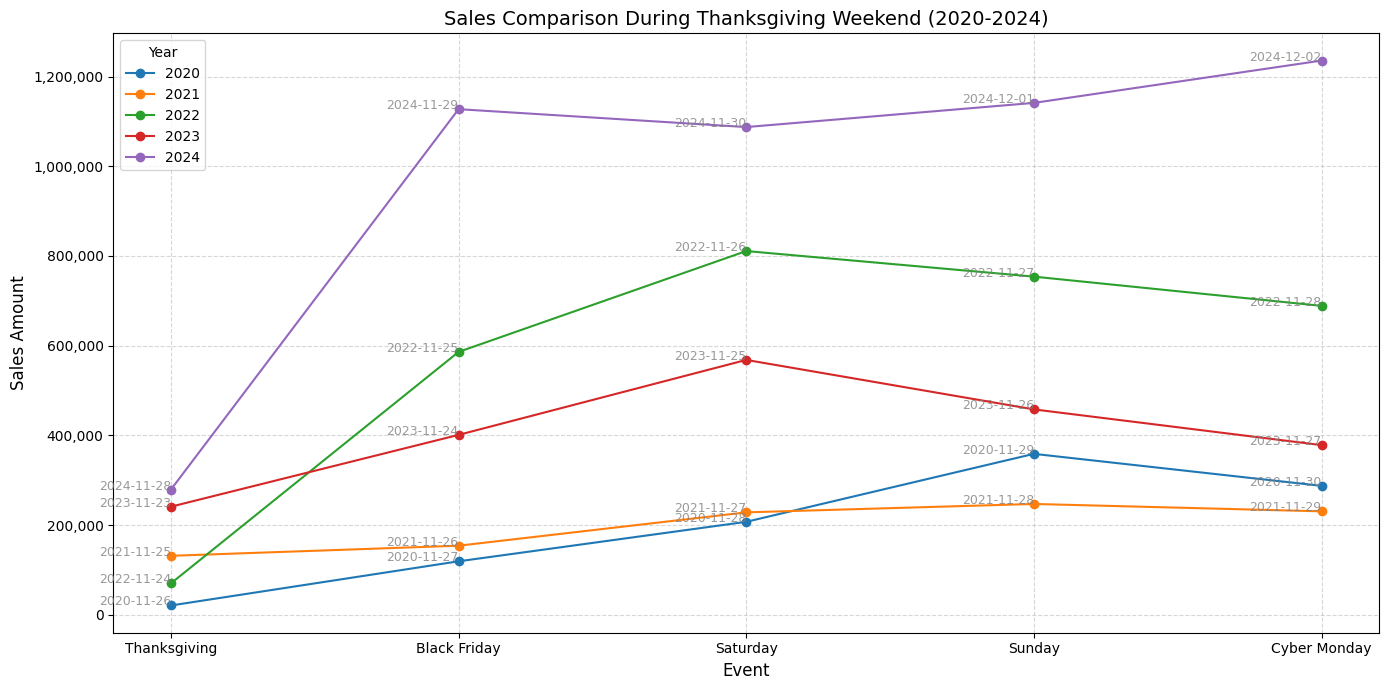

In [95]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define the event dates for each year
event_dates = {
    2020: ['2020-11-26', '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-30'],
    2021: ['2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29'],
    2022: ['2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28'],
    2023: ['2023-11-23', '2023-11-24', '2023-11-25', '2023-11-26', '2023-11-27'],
    2024: ['2024-11-28', '2024-11-29', '2024-11-30', '2024-12-01', '2024-12-02']
}

# Define the events
events = ['Thanksgiving', 'Black Friday', 'Saturday', 'Sunday', 'Cyber Monday']

# Convert TRANSACTION_DATE to datetime
daily_sales['TRANSACTION_DATE'] = pd.to_datetime(daily_sales['TRANSACTION_DATE'])

# Add a Year column
daily_sales['Year'] = daily_sales['TRANSACTION_DATE'].dt.year

# Pivot data for easier access
pivot_data = daily_sales.pivot(index='TRANSACTION_DATE', columns='Year', values='AMOUNT')

plt.figure(figsize=(14, 7))

# Plot for each year
for year, dates in event_dates.items():
    event_sales = [pivot_data.loc[date, year] for date in dates]  # Get sales for the event dates
    plt.plot(events, event_sales, label=f'{year}', marker='o')

    # Annotate exact dates near the points
    for i, sale in enumerate(event_sales):
        plt.text(i, sale, f'{dates[i]}', fontsize=9, ha='right', color='gray', alpha=0.8)

# Add titles and labels
plt.title("Sales Comparison During Thanksgiving Weekend (2020-2024)", fontsize=14)
plt.xlabel("Event", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Format y-axis

# Customize the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Year", fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()
